# HI profile classification using Convolutional Neural Networks, IAA-14 </center>
###                 *JAE Intro ICU at IAA, Granada Spain | By Gabriel Jaimes Illanes*

***
# PRE-PROCESING
# Step 1: Initial Data Download | ALFALFA - VIZIER

***

Data access link: https://vizier.unistra.fr/viz-bin/VizieR?-source=J/ApJ/861/49&-to=3

The 2019 ALFALFA catalog provides precise celestial coordinates, radial velocities, and noise measurements, unveiling the wonders of the extragalactic universe. With raw data in AGC format, astronomers can explore distant galaxies, while references like Simbad and NED provide additional context. This resource is a window into the vastness of the cosmos, ready to be explored for new cosmic discoveries.


    ALFALFA Raw data format: 
    **AGC    Name     ("h:m:s")  ("d:m:s") ("h:m:s")  ("d:m:s") km/s) /s) /s) /s) .km/s) km/s) SNR   (mJy) (Mpc) Mpc) sun]) sun]) I sp fits Simbad NED LEDA**



1. Installing all necesarry packages

In [260]:
!pip install astroquery
!pip install pandas
!pip install matplotlib
!pip install astropy
!pip install requests astropy
!pip install requests
!pip install beautifulsoup4


^C


2. Following necesary libraries are loaded

In [264]:
from astroquery.vizier import Vizier
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin


3. Using Vizier Python library, route to ALFALFA data is defined, loaded into pandas and first 5 row displayeds* and first 5 row displayed

In [278]:
from astroquery.vizier import Vizier
import pandas as pd

route = "J/ApJ/861/49"               
vizier = Vizier(columns=['*'])       #Access from Vizier Portal
data = vizier.get_catalogs(route)
data = data[0].to_pandas()           #Format to Panda

display(data.head())                 #First 5 Rows are shown

AGC      Name     RAJ2000    DEJ2000         RAO        DEO   Vhel  W50  \
0  105367            00 00 00.4  +05 26 36  00 00 00.8  +05 26 33  11983  274   
1  333313            00 00 00.9  +24 54 32  23 59 59.4  +24 54 27  11181  313   
2  331060  478-009b  00 00 02.5  +23 05 05  00 00 03.4  +23 05 15   4463  160   
3  331061   456-013  00 00 02.5  +15 52 20  00 00 02.1  +15 52 54   6007  260   
4  104570            00 00 01.6  +32 42 30  00 00 01.2  +32 42 37  10614  245   

   e_W50  W20  ...        Dist  e_Dist  logMHI  e_logMHI  HI  sp  fits  \
0     39  281  ...  166.000000     2.3    9.87      0.05   1  sp  fits   
1     20  333  ...  154.800003     2.3   10.01      0.05   1  sp  fits   
2      4  184  ...   50.599998    10.4    9.07      0.18   1  sp  fits   
3     45  268  ...   85.199997     2.4    9.29      0.06   1  sp  fits   
4      6  250  ...  147.000000     2.3    9.64      0.06   1  sp  fits   

   Simbad  NED  LEDA  
0  Simbad  NED  LEDA  
1  Simbad  NED  LEDA  
2  Simbad  NED  LEDA  
3  Simbad  NED  LEDA  
4  Simbad  NED  LEDA  

[5 rows x 24 columns]

In [280]:
route = "VIII/65/nvss"  # VLA
vizier = Vizier(columns=['*'])
data = vizier.get_catalogs(route)
data = data[0].to_pandas()

display(data.head())  

route = "J/ApJS/257/35/table3"  #  MERKAAT
vizier = Vizier(columns=['*'])
data = vizier.get_catalogs(route)
data = data[0].to_pandas()

display(data.head()) 

NVSS      RAJ2000      DEJ2000  e_RAJ2000  e_DEJ2000   S1.4  \
0  000000-340709  00 00 00.09  -34 07 09.5       0.48        6.7    2.7   
1  000000-382628  00 00 00.13  -38 26 28.5       0.65       11.5    3.1   
2  000000-040242  00 00 00.16  -04 02 42.3       0.03        0.6  106.8   
3  000000+321233  00 00 00.18  +32 12 33.3       0.31        3.9    3.7   
4  000000+491812  00 00 00.19  +49 18 12.6       0.92        9.0    2.4   

   e_S1.4 l_MajAxis     MajAxis l_MinAxis    MinAxis f_resFlux  
0     0.5         <   59.799999         <  52.400002            
1     0.6         <  117.000000         <  51.700001            
2     3.2         <   18.500000         <  16.400000            
3     0.4         <   43.799999         <  41.000000            
4     0.5         <   93.800003         <  58.400002

Seq              Name   Stot         Sp         Si l_Dmaj  Dmaj l_Dmin  \
0  001          NGC 0034   98.0  58.500000  61.599998          1.9          
1  002          NGC 0055  587.0   7.740000  16.299999          8.3          
2  003  MCG -02-01-051/2   45.2        NaN        NaN          NaN          
3  003    MCG -02-01-051    NaN  30.700001  40.000000          4.8          
4  003    MCG -02-01-052    NaN   2.800000        NaN          NaN          

   Dmin    PA      RAJ2000      DEJ2000  Bmaj  Bmin  BPA Run      _RA  \
0   1.7     4  00 11 06.57  -12 06 27.2  7.68  7.67   -1   H  2.77737   
1   7.4   -79  00 14 57.54  -39 12 25.8  7.48  7.22   89   K  3.73975   
2   NaN  <NA>                            7.68  7.67   -1   H  4.71417   
3   3.6   -54  00 18 50.88  -10 22 36.6  7.68  7.67   -1   H  4.71200   
4   NaN  <NA>  00 18 49.99  -10 21 29.9  7.68  7.67   -1   H  4.70829   

        _DE  
0 -12.10756  
1 -39.20717  
2 -10.37583  
3 -10.37683  
4 -10.35831

Next, a coordinates cross matching is develop from ALFALFA, VLA and MerKAAT catalogs:

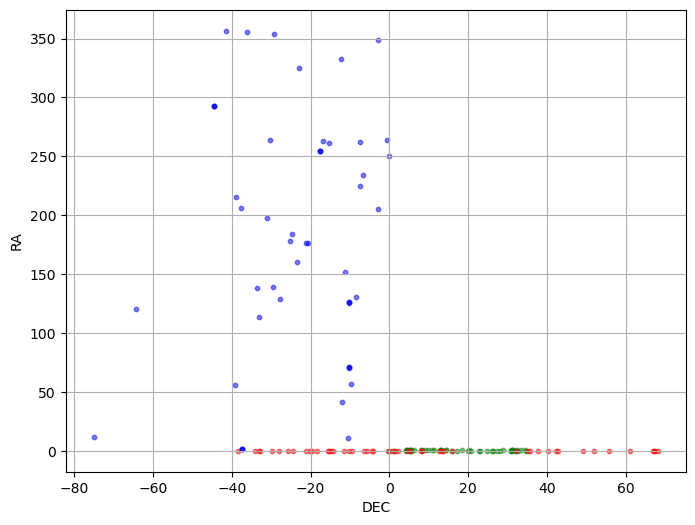

AGC   Name     RAJ2000    DEJ2000         RAO        DEO  Vhel  W50  \
0  331074  I5374  00 01 03.2  +04 30 54  00 01 04.5  +04 30 01  8956  188   

   e_W50  W20  ...      DEJ2000  e_RAJ2000  e_DEJ2000  S1.4  e_S1.4  \
0      5  224  ...  +32 12 33.3       0.31        3.9   3.7     0.4   

   l_MajAxis    MajAxis  l_MinAxis  MinAxis f_resFlux  
0          <  43.799999          <     41.0            

[1 rows x 36 columns]

Empty DataFrame
Columns: [AGC, Name, RAJ2000, DEJ2000, RAO, DEO, Vhel, W50, e_W50, W20, HIflux, e_HIflux, SNR, rms, Dist, e_Dist, logMHI, e_logMHI, HI, sp, fits, Simbad, NED, LEDA, Seq, Name, Stot, Sp, Si, l_Dmaj, Dmaj, l_Dmin, Dmin, PA, RAJ2000, DEJ2000, Bmaj, Bmin, BPA, Run, _RA, _DE]
Index: []

[0 rows x 42 columns]

In [284]:
from astroquery.vizier import Vizier
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u

route_alfalfa = "J/ApJ/861/49"  # Route of the ALFALFA catalog
route_vla = "VIII/65/nvss"      # Route of the VLA catalog
route_merkaat = "J/ApJS/257/35/table3"  # Route of the Merkaat catalog

vizier = Vizier(columns=['*'])

data_alfalfa = vizier.get_catalogs(route_alfalfa) # ALFALFA Catalog
data_alfalfa = data_alfalfa[0].to_pandas()
data_vla = vizier.get_catalogs(route_vla)      # VLA Catalog
data_vla = data_vla[0].to_pandas()
data_merkaat = vizier.get_catalogs(route_merkaat) # Merkaat Catalog
data_merkaat = data_merkaat[0].to_pandas()

alfa_coords = SkyCoord(ra=data_alfalfa['RAJ2000'], dec=data_alfalfa['DEJ2000'], unit=(u.hourangle, u.deg))
#print(alfa_coords)
vla_coords = SkyCoord(ra=data_vla['RAJ2000'], dec=data_vla['DEJ2000'], unit=(u.hourangle, u.deg))
#print(vla_coords)
merkaat_coords = SkyCoord(ra=data_merkaat['_RA'], dec=data_merkaat['_DE'], unit=(u.hourangle, u.deg))
merkaat_coords = merkaat_coords.transform_to('fk5') # Convertion of icrs to J2000

idx_alfa, idx_vla, _, _ = alfa_coords.search_around_sky(vla_coords, 60*1000*u.mas) # Cross matching between ALFALFA and VLA
alfa_matched_vla = data_alfalfa.iloc[idx_alfa].reset_index(drop=True)
vla_matched = data_vla.iloc[idx_vla].reset_index(drop=True)
alfalfa_plus_vla=pd.concat([alfa_matched_vla, vla_matched], axis=1)

idx_alfa, idx_merkaat, _, _ = alfa_coords.search_around_sky(merkaat_coords, 60*1000*u.mas) # Cross matching between ALFALFA and Merkaat
alfa_matched_merkaat = data_alfalfa.iloc[idx_alfa].reset_index(drop=True)
merkaat_matched = data_merkaat.iloc[idx_merkaat].reset_index(drop=True)
alfalfa_plus_merkaat=pd.concat([alfa_matched_merkaat, merkaat_matched], axis=1)

#------------

plt.figure(figsize=(8, 6))
plt.scatter(alfa_coords.dec, alfa_coords.ra, s=10, alpha=0.5, color="green")
plt.scatter(vla_coords.dec, vla_coords.ra, s=10, alpha=0.5, color="red")
plt.scatter(merkaat_coords.dec, merkaat_coords.ra, s=10, alpha=0.5, color="blue")
plt.xlabel('DEC')
plt.ylabel('RA')
plt.grid(True)
plt.show()

display(alfalfa_plus_vla.head()) 
display(alfalfa_plus_merkaat.head()) 


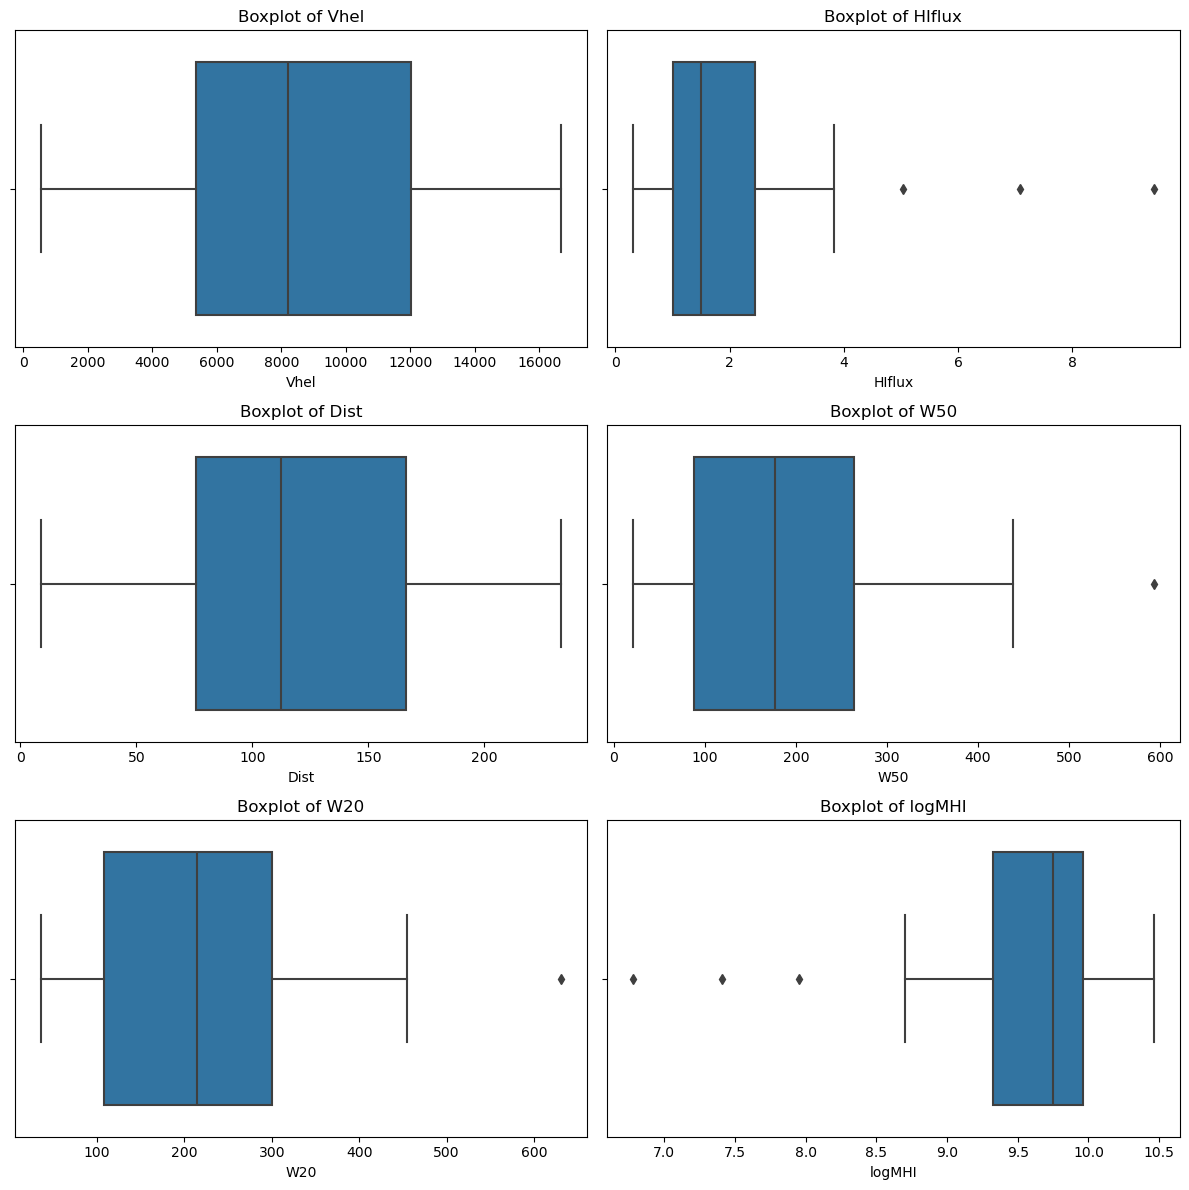

In [286]:
data_alfalfa = vizier.get_catalogs(route_alfalfa)
data_alfalfa = data_alfalfa[0].to_pandas()

statistics = data_alfalfa.describe()

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

columns_to_plot = ['Vhel', 'HIflux', 'Dist', 'W50', 'W20', 'logMHI']

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x=column, data=data_alfalfa, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

PCA Analysis for ALFALFA data on: **'Vhel', 'HIflux', 'Dist', 'W50', 'W20', 'logMHI'**

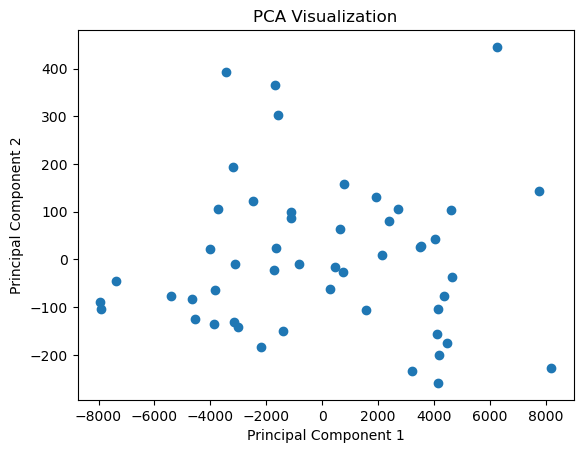

In [297]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_pca(X, n_components):

    pca = PCA(n_components=n_components)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    # Plot PCA visualization
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Visualization')
    plt.show()

statistics = data_alfalfa.describe()

columns_to_plot = ['Vhel', 'HIflux', 'Dist', 'W50', 'W20', 'logMHI']
X_selected_columns = data_alfalfa[columns_to_plot]
plot_pca(X_selected_columns, n_components=4)


# Step 2: HI Emission Spectrum Download | ALFALFA - VIZIER
***
**Access link: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/**


1. Installing all necesarry packages

In [18]:
import re
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

2. Next, Spectrum data is downloaded on *.fits* format from *"ALFALFA extragalactic HI source catalog; corrected version: (August 2019)[spectrum/fits]spectrum"*.
Also located at Vizier directory *J/ApJ/861/49/sp*

In [1]:
!pip install requests

In [ ]:
# multiprocessing - Python
# http://pycurl.io/docs/latest/index.html
# request

In [17]:
import os; os.system("wget -O sp.tar.gz http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/")



1

In [ ]:
#Mejorar descarga
#0. Visualizar datos (llamando a otros catalogos para un crossmatching), con imagenes y espectros (SUBPLOT)
#1. Tomar por la inspección inicial (Naive) un ajuste poly, todo el espectro
#- Obtener: Max peak amplitude (Naive), Center(Naive), Width(Naive).
#2. Definir si es Emision u Absorción (Emision (90%), Absorción (80%), Indefinido  )
# Añadirlo a la tabla (repositorio).
#3. Depurar: Filtrar y centrar 
# - A partir de acá los datos filtrados
#TOMAR EN CUENTA EL APARTADO DE H1 reliability
#3.5 Hacer un ajuste Poly inicial
#3.6 Hacer el Ajuste Lorentz (Max)
#- Obtener: Max peak amplitude, Center, Width (100%), Width (50), Width (20), Emision y SNR
#Añadirlo a la tabla (repositorio).
#4. Identificar y hacer un Ajuste de Lorentzianas a los dos picos maximos
#5. A partir de estos dos, obtener:
#- Obtener: Max peak amplitude, Center, Width (100%), Width (50), Width (20), Emision y SNR
#Añadirlo a la tabla (repositorio).
#6. Comparativo con datos de tablas
#7. Incorporar estudio exploratorio de: Variables correlacionadas, estadística, . FLUX, VHelio, Dist, outliers, pca (documentacion)

#--------
#Tomar en cuenta: La Mayoría de los specs son de emision.
# lUEGO DEL CENTRADO (VENTANA DE ESPECTRO): Hacer otro ajuste para tomar en cuenta los dos picos
# Decargar el Espectro Visual del objeto. (Crossmatching) Enlazar con etiquetas el identificador del Espectro (de los dos catálogos); y tambien el Aspecto Visual.
# (Como inferir eso en base al espectro visual/aspecto - Con tecnicas ML/CNN)
# Ver curvas de Rotacion, utilizarlas para inferir clasificación.Motivo?
# Estadística General: Dispersion de los datos, Outliers/ tomar los datos del espectro y añadir una fila
#Incluir estudio exploratorio de: Variables correlacionadas, estadística, . FLUX, VHelio, Dist, outliers, pca (documentacion)
# Pintar cada objeto con su posicion (Imagen) y datos.
# Definir funciones y exportarlos en un Paquete "HI-Profile" (para tenerlas listos y usar)

For thw .fits download, following we will import the library "lib_preproxx.py" in order to use the function "download_fits_files" to get the data



In [321]:
from lib_prepross import download_fits_files

download_fits_files("http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/", "spv2")


Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000001.fits
Downloaded.
Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000003.fits
Downloaded.
Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000004.fits
Downloaded.
Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000006.fits
Downloaded.
Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000007.fits
Downloaded.
Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000008.fits
Downloaded.
Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000010.fits
Downloaded.
Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000011.fits
Downloaded.
Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000012.fits
Downloaded.
Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000013.fits
Downloaded.
Downloading: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/A000014.fits


ChunkedEncodingError: ("Connection broken: ConnectionAbortedError(10053, 'Se ha anulado una conexión establecida por el software en su equipo host', None, 10053, None)", ConnectionAbortedError(10053, 'Se ha anulado una conexión establecida por el software en su equipo host', None, 10053, None))

3. A sample spectrum is visualized. Here Flux vs Heliocentric Velocity is ploted: 


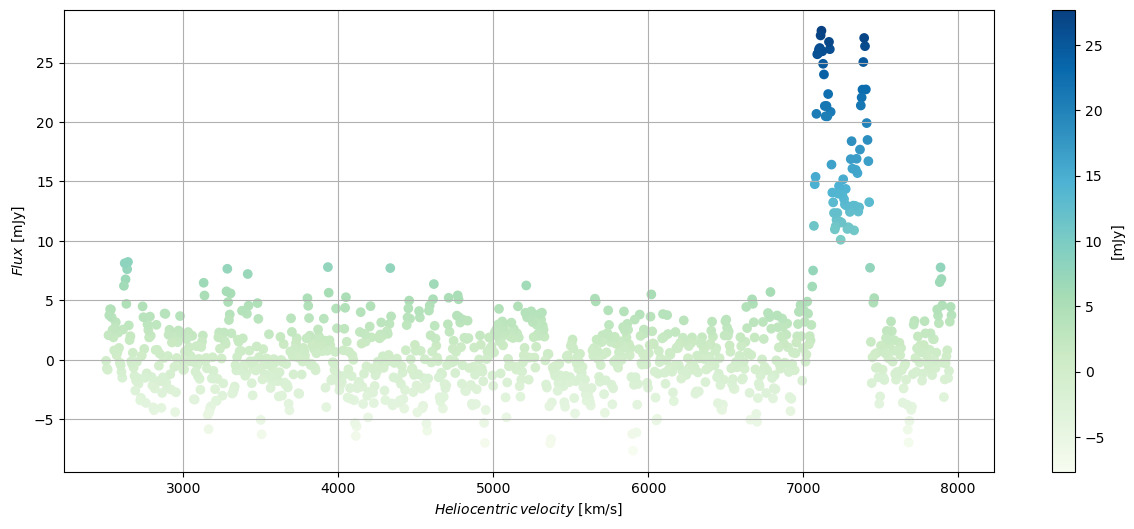

In [31]:
folder_path = "sp"                                       #New location of /sp directory
ns=10

fifth_spectrum_file = sorted([f for f in os.listdir(folder_path) if f.endswith('.fits')])[ns]    #10th Spectrum as Example
file_path = os.path.join(folder_path, fifth_spectrum_file)
data = fits.getdata(file_path)

v_helio = data['VHELIO']                 # Heliocentric Velocity
flux = data['FLUX']                      # Flux

plt.figure(figsize=(15, 6))              #Plot of Spectrum
plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o')
plt.colorbar(label='[mJy]')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.grid(True)
plt.show()


# Step 3: Statistics for an Individual spectrum | PYTHON 3.0
***
**Access link: http://cdsarc.cds.unistra.fr/ftp/cats/J/ApJ/861/49/sp/**


1. We generate a preliminary statistic of the curve of a spectrum

In [32]:
mean_flux = np.mean(flux)
rms_flux = np.std(flux)
snr = mean_flux / rms_flux

stats_df = pd.DataFrame({
    'Statistic': ['Media del flujo', 'Desviación estándar del flujo (RMS)', 'SNR en valores de sigma'],
    'Value': [mean_flux, rms_flux, snr]
})

print(stats_df)


                             Statistic     Value
0                      Media del flujo  1.331998
1  Desviación estándar del flujo (RMS)  5.191074
2              SNR en valores de sigma  0.256594


2. An initial Polinomial fitting is made to the spectrum to locate HI lines.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2936\1947854634.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(v_helio, flux, degree)


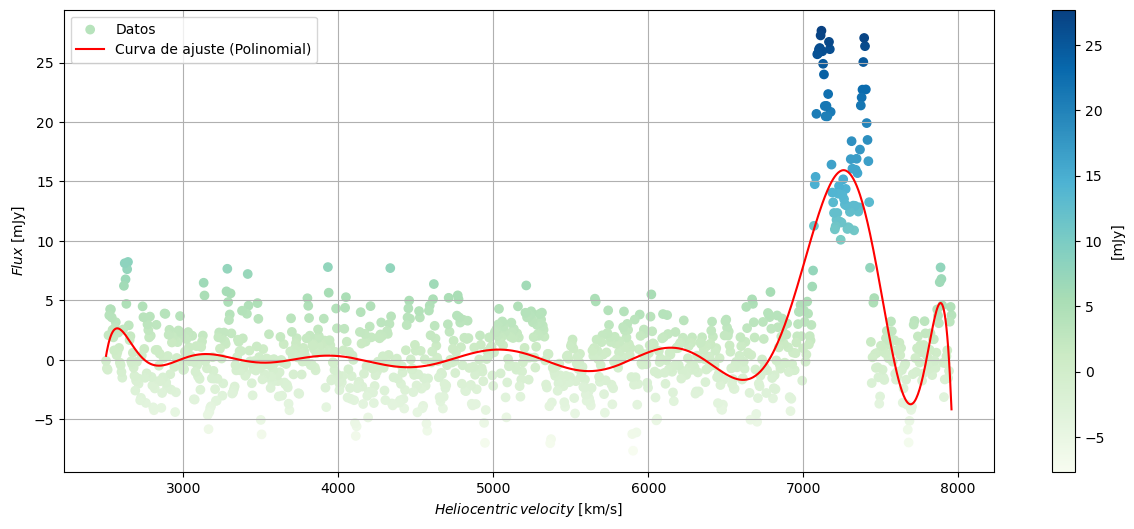

In [33]:
degree = 15  # Degree of Fiting
coefficients = np.polyfit(v_helio, flux, degree)  
polynomial_function = np.poly1d(coefficients)


flux_fit = polynomial_function(v_helio)


plt.figure(figsize=(15, 6))
plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o', label='Datos')
plt.plot(v_helio, flux_fit, color='red', label='Curva de ajuste (Polinomial)')
plt.colorbar(label='[mJy]')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.legend()
plt.grid(True)
plt.show()


2. Filtering the data is necesary, so a binning is applied to the sample:

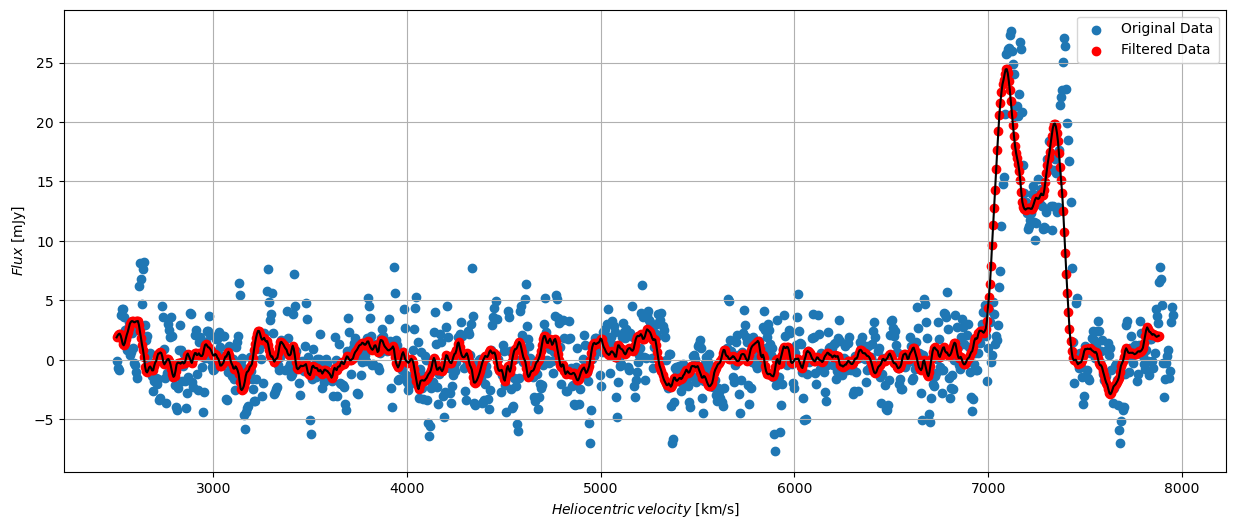

In [35]:
window_size = 15             #Binning window

flux_filtered = np.convolve(flux, np.ones(window_size)/window_size, mode='valid')  #Filtering is applied

plt.figure(figsize=(15, 6))
plt.scatter(v_helio, flux, label='Original Data')
plt.scatter(v_helio[window_size - 1:], flux_filtered, color='red', label='Filtered Data')
plt.plot(v_helio[window_size - 1:], flux_filtered, color='black')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.legend()
plt.grid(True)
plt.show()

#Manu: AJUSTE POLYDINAMICO - Al flujo (filtrado)
        # Depurar: Centrado de la Línea HI
        # Mas adelante:Guarda en un fichero de los espectros depurados.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2936\3305931640.py:14: RankWarning: Polyfit may be poorly conditioned
  coefficients_cropped = np.polyfit(v_helio_cropped, flux_cropped, degree)


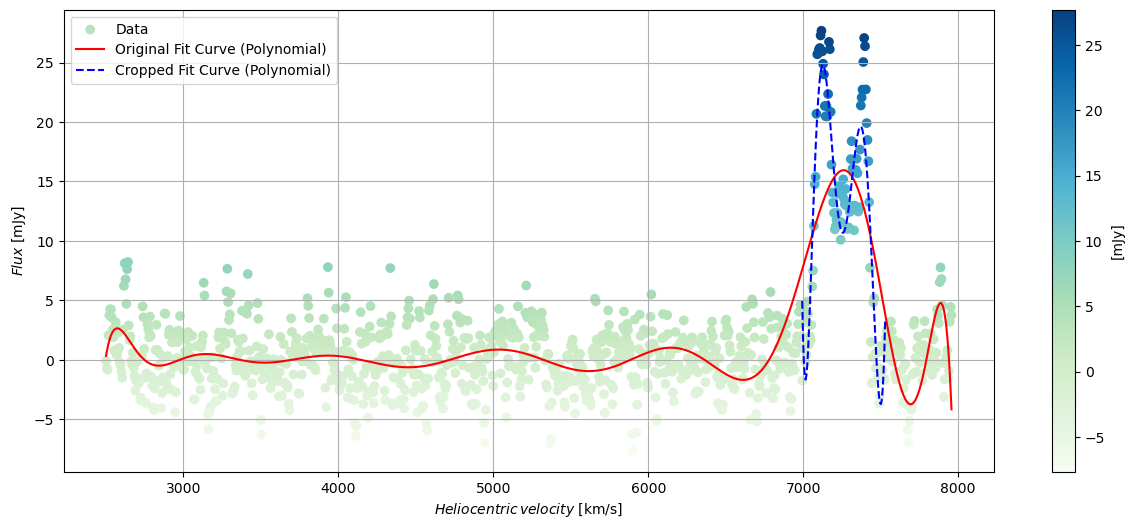

In [311]:
peak_max_index = np.argmax(flux_fit) # Find Peak

tolerance= 50
peak_base = np.arange(peak_max_index - tolerance, peak_max_index + tolerance)

v_helio_cropped = v_helio[peak_base]  # Crop for the defined peak
flux_cropped = flux[peak_base]

degree = 15  # Degree of the polynomial fit
coefficients_cropped = np.polyfit(v_helio_cropped, flux_cropped, degree)
polynomial_function_cropped = np.poly1d(coefficients_cropped)
flux_fit_cropped = polynomial_function_cropped(v_helio_cropped)

plt.figure(figsize=(15, 6))
plt.scatter(v_helio, flux, c=flux, cmap='GnBu', marker='o', label='Data')
plt.plot(v_helio, flux_fit, color='red', label='Original Fit Curve (Polynomial)')
plt.plot(v_helio_cropped, flux_fit_cropped, color='blue', linestyle='--', label='Cropped Fit Curve (Polynomial)')
plt.colorbar(label='[mJy]')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.legend()
plt.grid(True)
plt.show()


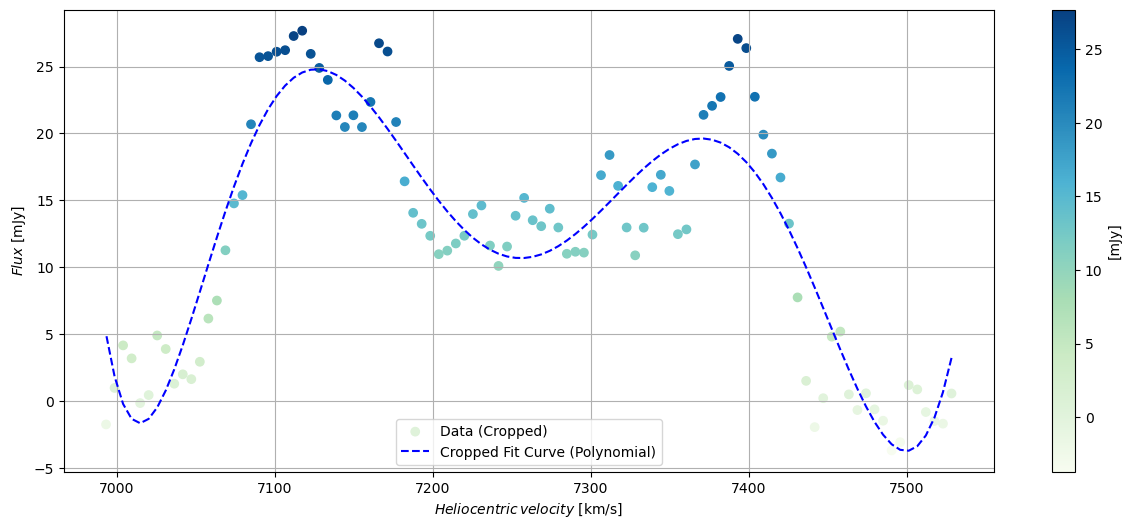

In [312]:
plt.figure(figsize=(15, 6))
plt.scatter(v_helio_cropped, flux_cropped, c=flux_cropped, cmap='GnBu', marker='o', label='Data (Cropped)')
plt.plot(v_helio_cropped, flux_fit_cropped, color='blue', linestyle='--', label='Cropped Fit Curve (Polynomial)')
plt.colorbar(label='[mJy]')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.legend()
plt.grid(True)
plt.show()


3. Statistics for the new curve are generated:

In [314]:
import pandas as pd

mean_flux_cropped = np.mean(flux_cropped)
rms_flux_cropped = np.std(flux_cropped)
snr_cropped = mean_flux_cropped / rms_flux_cropped

stats_df_cropped = pd.DataFrame({
    'Statistic (Cropped Data)': ['Mean Flux', 'RMS (Root Mean Square) Flux', 'SNR (Signal-to-Noise Ratio)'],
    'Value': [mean_flux_cropped, rms_flux_cropped, snr_cropped]
})

print(stats_df_cropped)



      Statistic (Cropped Data)      Value
0                    Mean Flux  12.287854
1  RMS (Root Mean Square) Flux   9.043125
2  SNR (Signal-to-Noise Ratio)   1.358806


4. Now we will use the filtered data to generate a Lorentz curve fitting.
The curve is also differenciated from an Emision (possitive) or Absorption (negative)

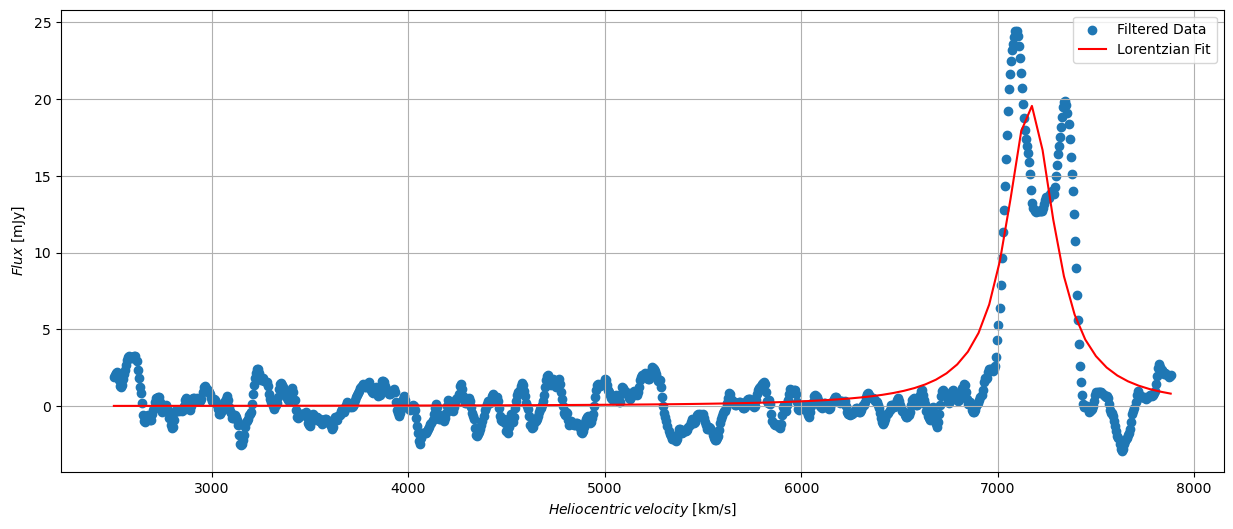

Fitted parameters:

Max peak amplitude (filtered data): 24.457687113457435 mJy
Max peak amplitude (Lorentzian fit): 19.560232909845176 mJy
Center: 7165.880520931621 km/s
Width: 298.5174065643825 km/s
Curve type: Emission (naive1)
SNR (Filtered Data): 4.972798635083839
SNR (Lorentzian Fit): 5.205386529369377


In [316]:
from scipy.signal import find_peaks
from scipy.optimize import curve_fit


def lorentzian(x, amplitude, center, width): # A lorentz ploting curve function is defined
    return amplitude / ((x - center)**2 + (0.5 * width)**2)


peaks, _ = find_peaks(flux_filtered, prominence=1)   # Main HI line will correspond to a SNR increase
initial_center_guess = v_helio[window_size - 1:][peaks[np.argmax(flux_filtered[peaks])]]  # Initial Guess with Find Peaks
initial_guess = [max(flux_filtered), initial_center_guess, 1]  # Amplitude, Center, Width
bounds = ([0, -np.inf, 0], [np.inf, np.inf, np.inf])  # Bounds for parameters

popt, _ = curve_fit(lorentzian, v_helio[window_size - 1:], flux_filtered, p0=initial_guess, bounds=bounds)  # Perform least squares curve fitting with initial guess and bounds

amplitude_fit, center_fit, width_fit = popt  # Resultant Parameters

x_fit = np.linspace(min(v_helio[window_size - 1:]), max(v_helio[window_size - 1:]), 100)
y_fit = lorentzian(x_fit, amplitude_fit, center_fit, width_fit)

snr_filtered = np.mean(np.sort(flux_filtered[peaks])[-2:]) / np.std(flux_filtered) # SNR is calculated for the mean of two Max peaks
snr_fit = max(y_fit) / np.std(y_fit)   # SNR is calculated for the Lorentzian fitting

plt.figure(figsize=(15, 6))   #  Plot of Result
plt.scatter(v_helio[window_size - 1:], flux_filtered, label='Filtered Data')
plt.plot(x_fit, y_fit, label='Lorentzian Fit', color='red')
plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
plt.ylabel(r'$\mathit{Flux}$ [mJy]')
plt.legend()
plt.grid(True)
plt.show()


print("Fitted parameters:\n")   #Print of Results
print("Max peak amplitude (filtered data):", max(flux_filtered[peaks]), "mJy")
print("Max peak amplitude (Lorentzian fit):", max(y_fit), "mJy")
print("Center:", center_fit, "km/s")
print("Width:", width_fit, "km/s")

if amplitude_fit > 0:         # EMISION and ABSORPTION analysis
    curve_type = 'Emission (Naive1)'
else:
    curve_type = 'Absorption'

print("Curve type:", curve_type.capitalize())
print("SNR (Filtered Data):", snr_filtered)
print("SNR (Lorentzian Fit):", snr_fit)


# Step 3: Statistics from spectrum data base | PYTHON 3.0
***
In Step 3, titled "Statistics from Spectrum Database | PYTHON 3.0", we harness the insights gained from our data processing and analysis. Here, we're focusing on generating histograms based on the statistical analyses performed in the preceding code. This step involves utilizing the fitted parameters obtained from Lorentzian fitting and the Signal-to-Noise Ratio (SNR) calculations to construct informative visualizations. By crafting histograms, we aim to provide a comprehensive overview of the distribution and characteristics of the spectral data, enhancing our understanding of the underlying physical phenomena captured within the dataset. Through these histograms, we can glean valuable insights into the emission or absorption features present in the spectra, further enriching our exploration of the spectral database.


1. An initial inspection from the raw data is generated. Max value of the spectrum (positive or negative) is considered for the emission/absorption discrimination. It should be noted that this is the max value, therefore the selected point could correspond to the "radial  blue-shifted" component of the HI emision by the rotation of the celestial object.

In [ ]:
folder_path = "sp"

emission_count = 0
absorption_count = 0

for fits_file in os.listdir(folder_path):  # We iterate for each .fits spectrum
    if fits_file.endswith('.fits'):
        file_path = os.path.join(folder_path, fits_file)
        data = fits.getdata(file_path)
        max_flux = np.max(data['FLUX'])
        
        if max_flux > 0:
            emission_count += 1
        else:
            absorption_count += 1

print("Number of emission spectra (Naive):", emission_count)
print("Number of absorption spectra (Naive):", absorption_count)

# Manu: Basandose en esto, añadir una etiqueta en la tabla csv (naive(max))


2. Now we will apply same filtering, but for the whole archive.

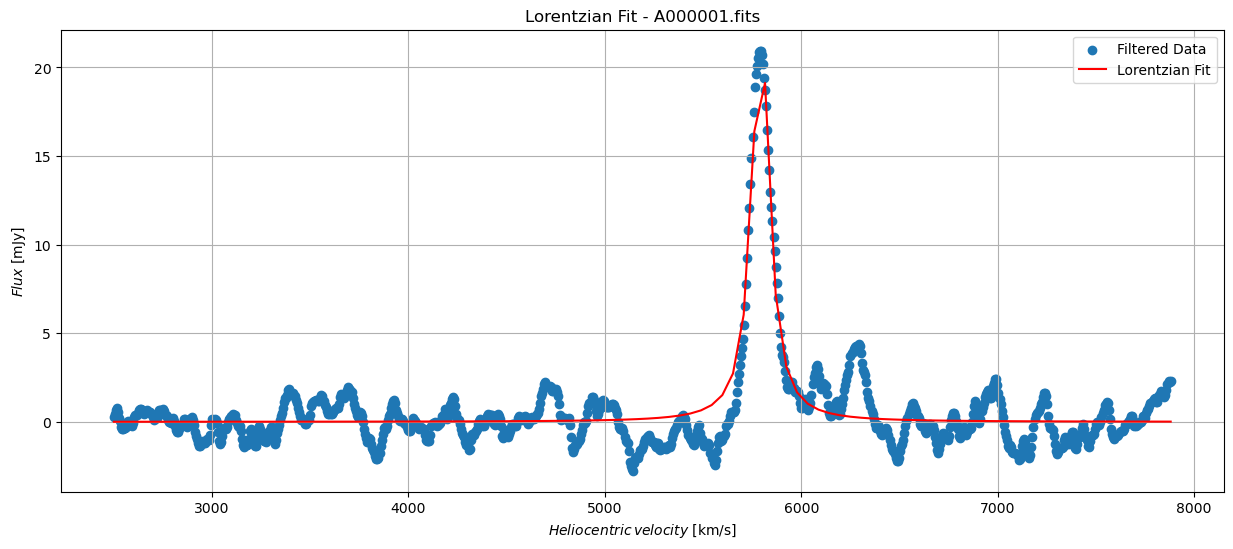

Fitted parameters:
Max peak amplitude (filtered data): 20.940880521957745 mJy
Max peak amplitude (Lorentzian fit): 19.122895642137703 mJy
Center: 5793.2879585572655 km/s
Width: 104.46100036666705 km/s
Curve type: Emission
SNR (Filtered Data): 4.272742881801086
SNR (Lorentzian Fit): 8.364295142635589



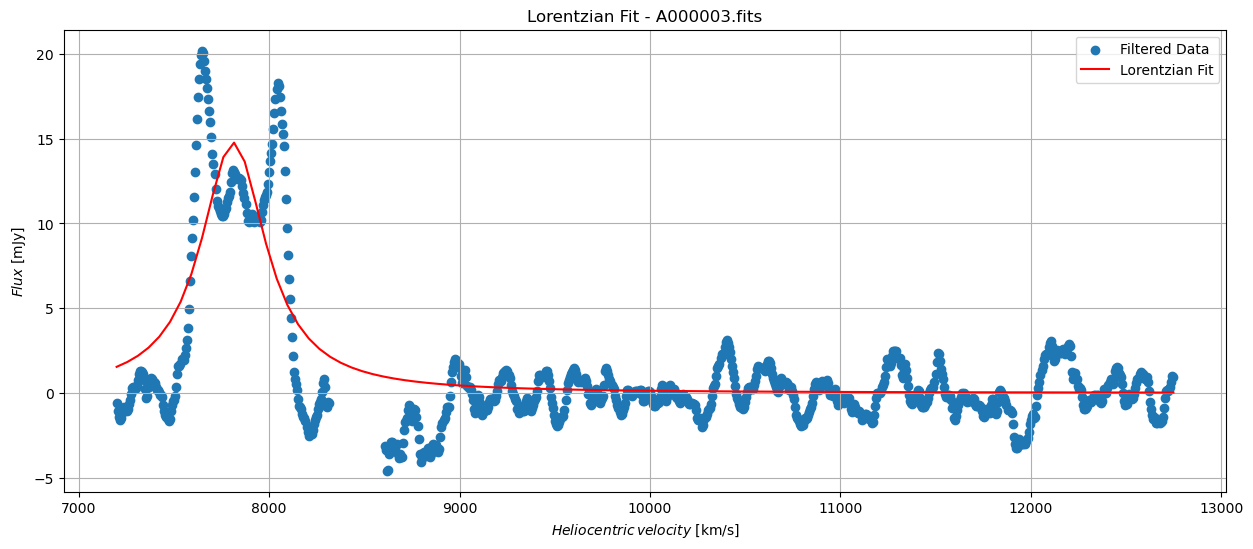

Fitted parameters:
Max peak amplitude (filtered data): 20.184743246534623 mJy
Max peak amplitude (Lorentzian fit): 14.766018105561184 mJy
Center: 7811.066628522141 km/s
Width: 418.35553463061825 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 4.428116928017355



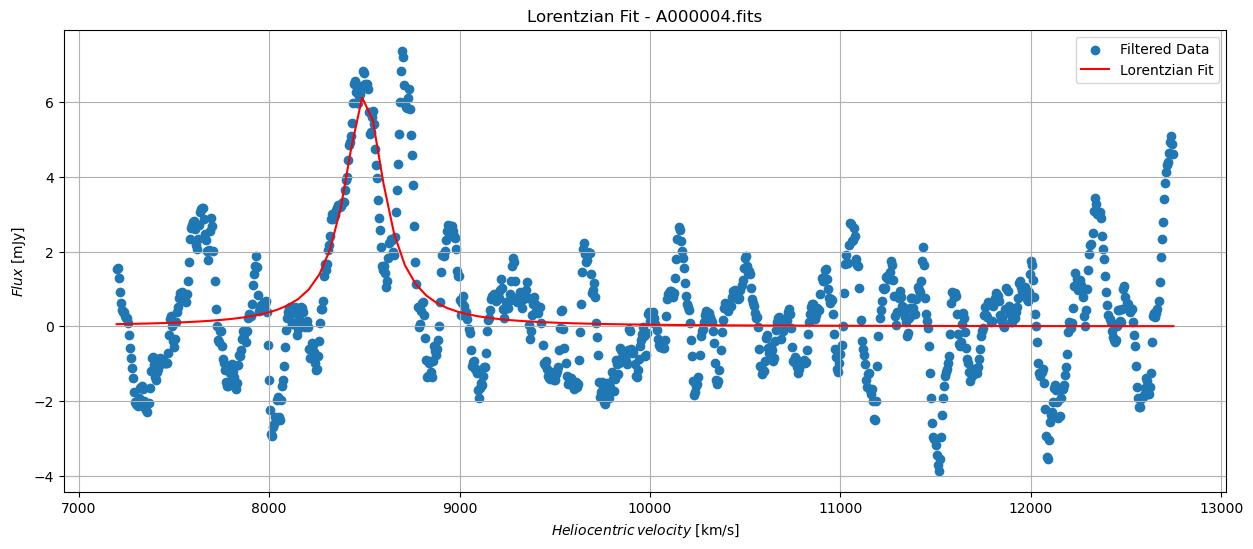

Fitted parameters:
Max peak amplitude (filtered data): 7.371950283113576 mJy
Max peak amplitude (Lorentzian fit): 6.118003421689742 mJy
Center: 8500.003422541777 km/s
Width: 255.06536072355598 km/s
Curve type: Emission
SNR (Filtered Data): 3.8940059730226477
SNR (Lorentzian Fit): 5.632730357729962



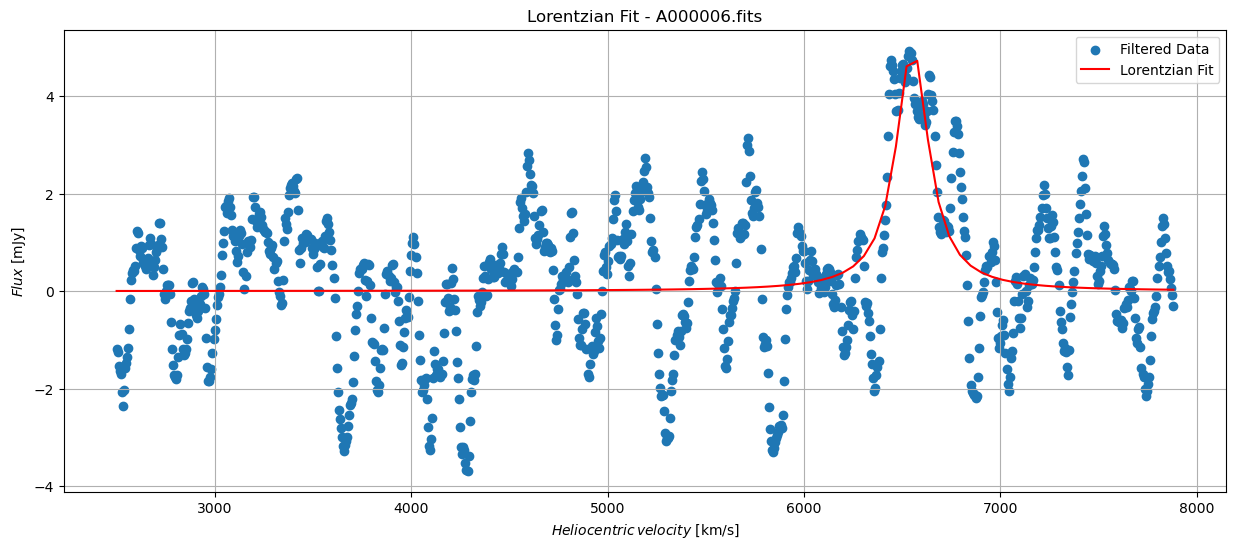

Fitted parameters:
Max peak amplitude (filtered data): 4.926344000220834 mJy
Max peak amplitude (Lorentzian fit): 4.718728189144208 mJy
Center: 6551.674704676206 km/s
Width: 202.33813668225682 km/s
Curve type: Emission
SNR (Filtered Data): 3.1100019430862167
SNR (Lorentzian Fit): 6.197654381261933



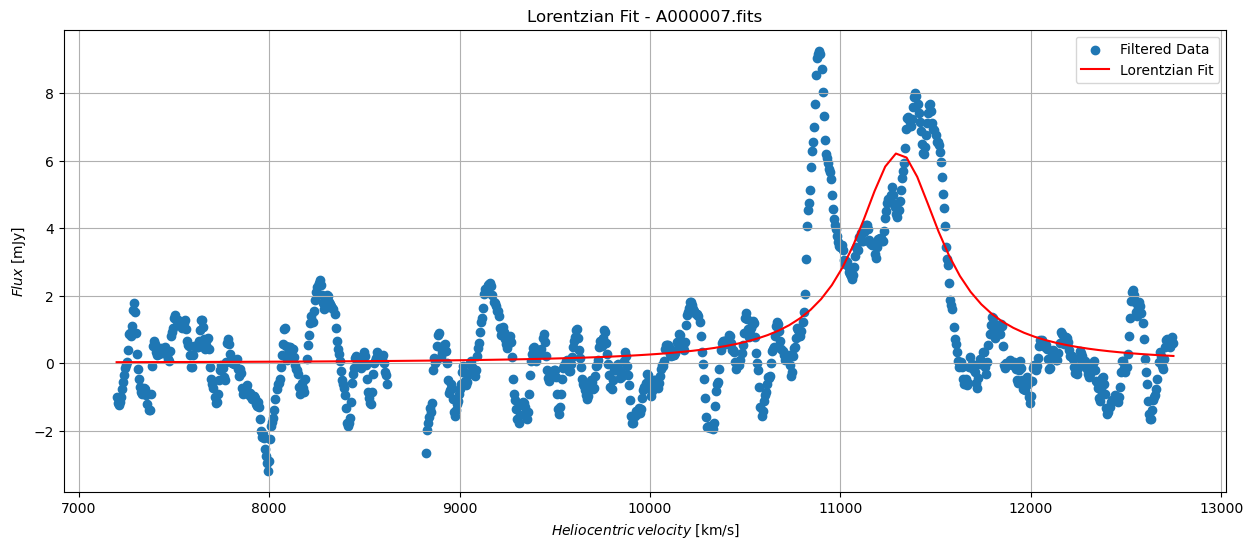

Fitted parameters:
Max peak amplitude (filtered data): 9.255050424965411 mJy
Max peak amplitude (Lorentzian fit): 6.20866139645744 mJy
Center: 11306.471892079482 km/s
Width: 539.9417689065235 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 4.167205716854877



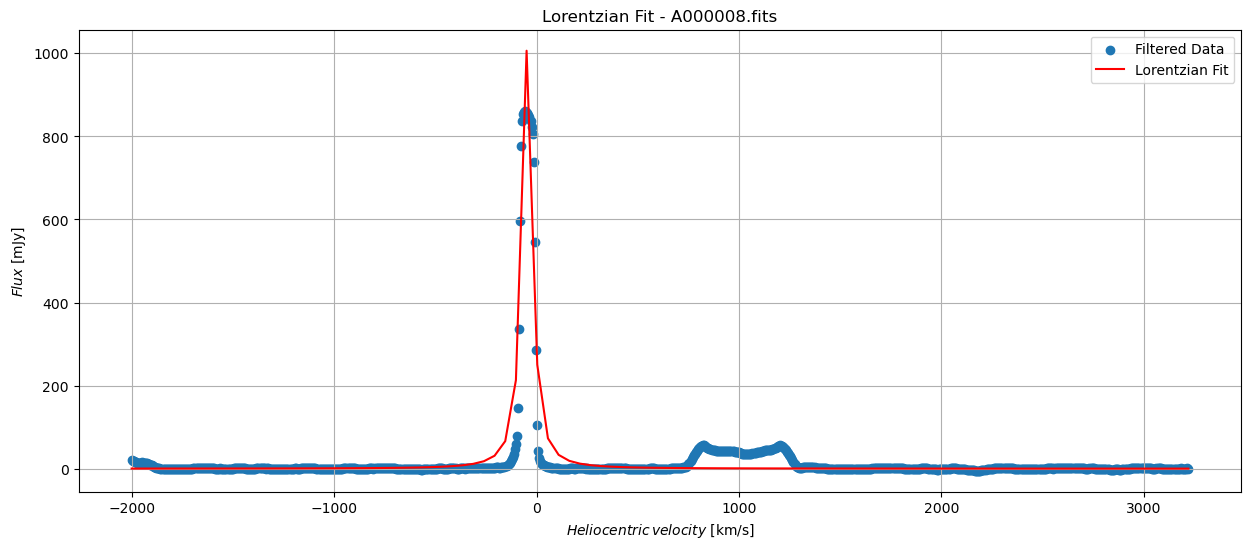

Fitted parameters:
Max peak amplitude (filtered data): 860.9248816666291 mJy
Max peak amplitude (Lorentzian fit): 1006.3885778939776 mJy
Center: -46.549787301353234 km/s
Width: 57.17209224683811 km/s
Curve type: Emission
SNR (Filtered Data): 4.661929949952864
SNR (Lorentzian Fit): 10.928879577237153



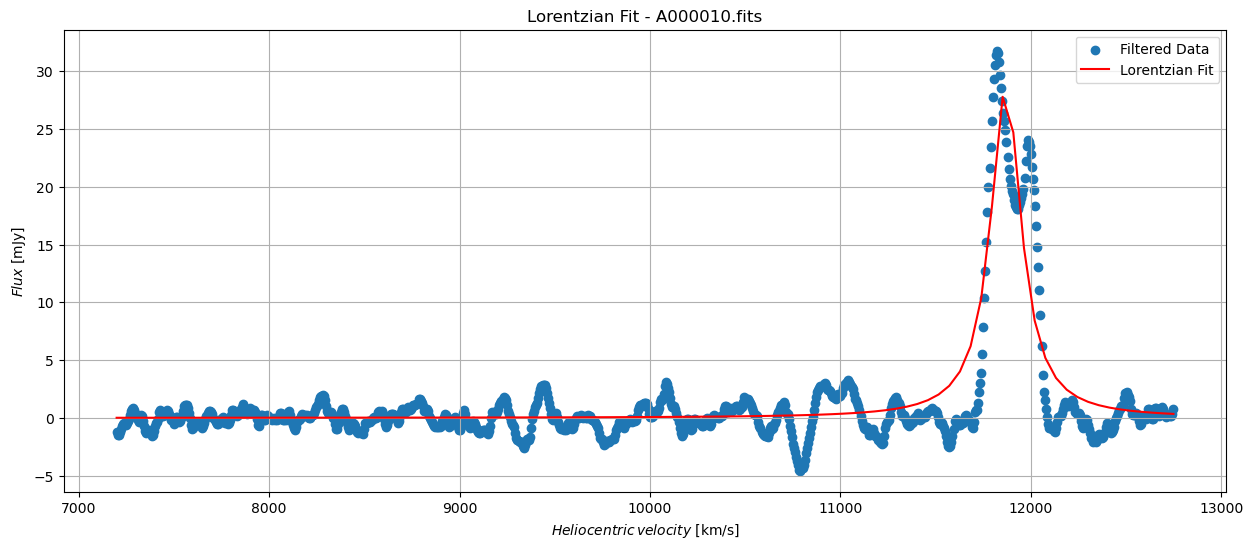

Fitted parameters:
Max peak amplitude (filtered data): 31.762586516537915 mJy
Max peak amplitude (Lorentzian fit): 27.77821414176593 mJy
Center: 11869.014457731082 km/s
Width: 194.93898487972558 km/s
Curve type: Emission
SNR (Filtered Data): 5.438399405886787
SNR (Lorentzian Fit): 6.386128407401997



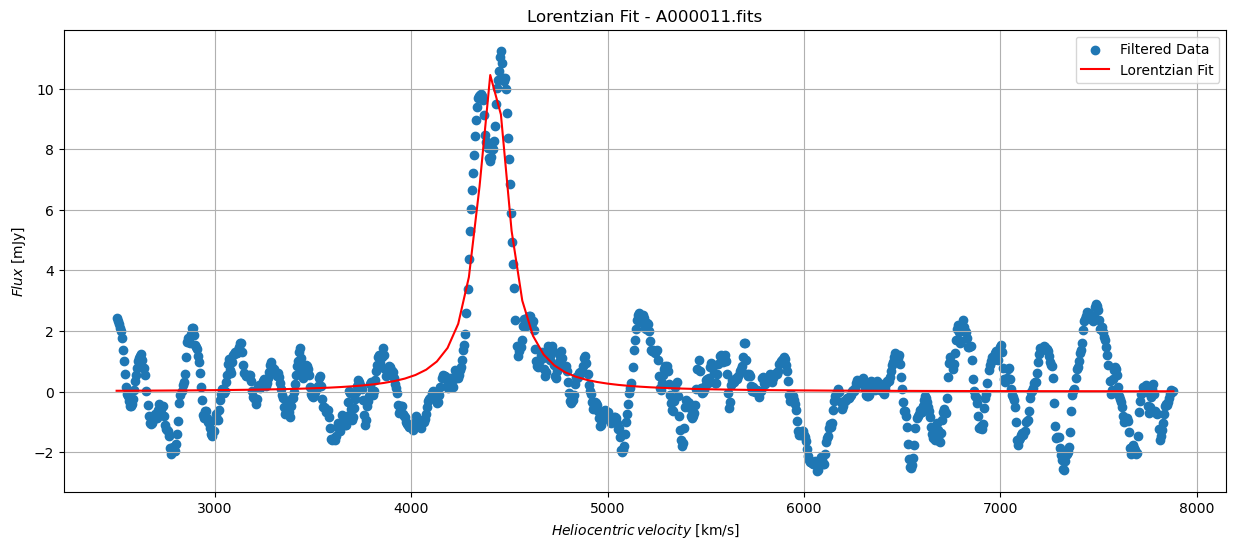

Fitted parameters:
Max peak amplitude (filtered data): 11.252114393158745 mJy
Max peak amplitude (Lorentzian fit): 10.450360001658787 mJy
Center: 4418.328685285718 km/s
Width: 183.13992290663953 km/s
Curve type: Emission
SNR (Filtered Data): 5.088782740394343
SNR (Lorentzian Fit): 6.441404711600341



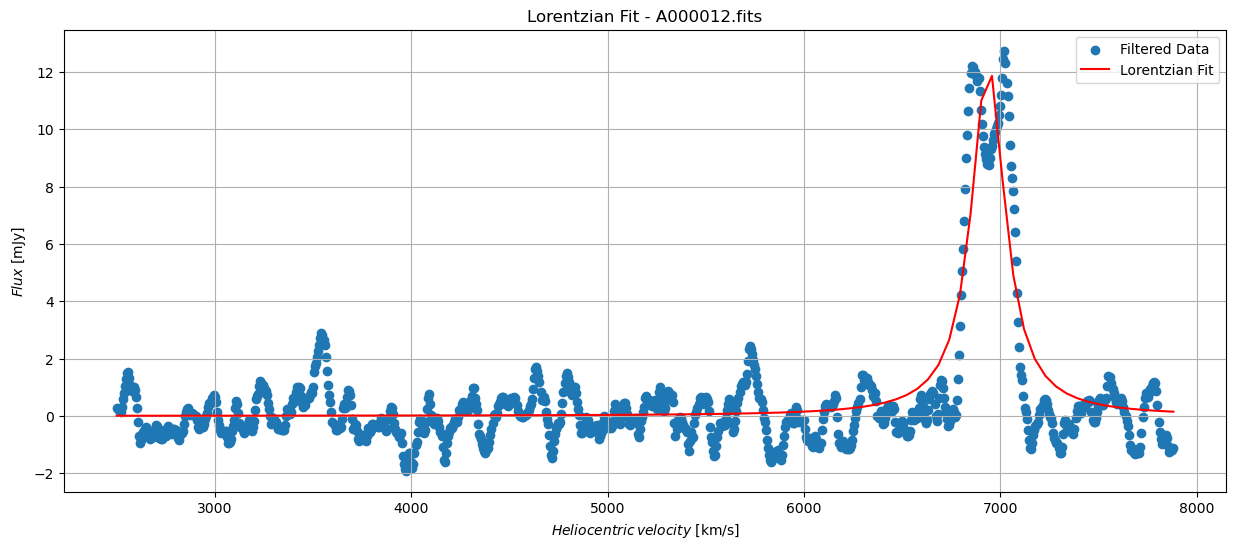

Fitted parameters:
Max peak amplitude (filtered data): 12.7413000781242 mJy
Max peak amplitude (Lorentzian fit): 11.863359981314954 mJy
Center: 6937.753998501551 km/s
Width: 208.8357711057559 km/s
Curve type: Emission
SNR (Filtered Data): 5.274998071103231
SNR (Lorentzian Fit): 6.110434713302928



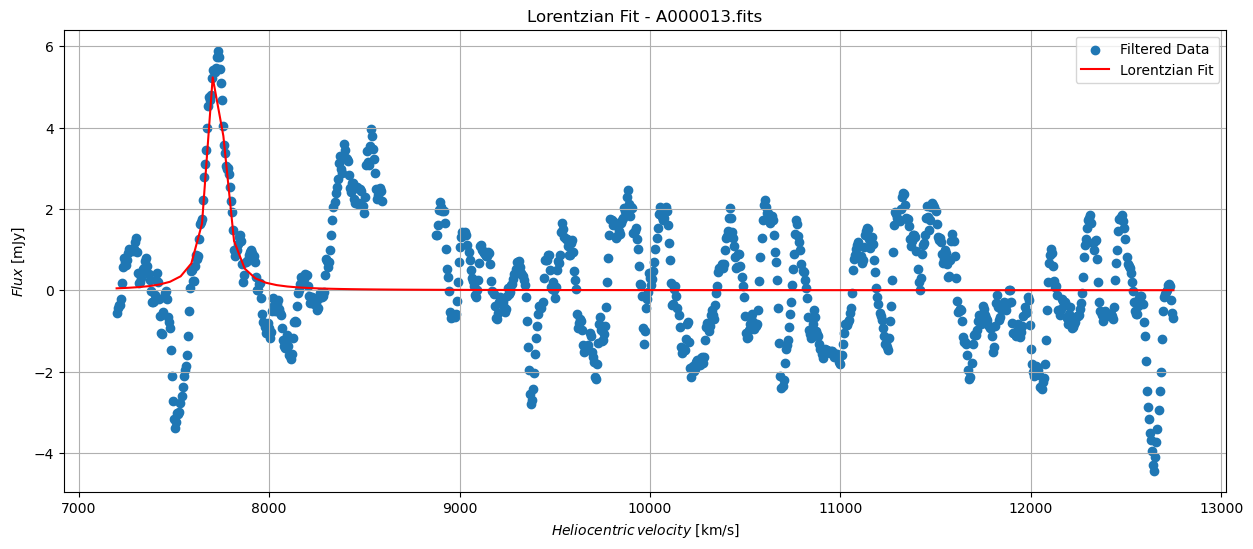

Fitted parameters:
Max peak amplitude (filtered data): 5.888911873316253 mJy
Max peak amplitude (Lorentzian fit): 5.23314950332498 mJy
Center: 7722.778445696898 km/s
Width: 90.57785185636436 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 8.774859576576176



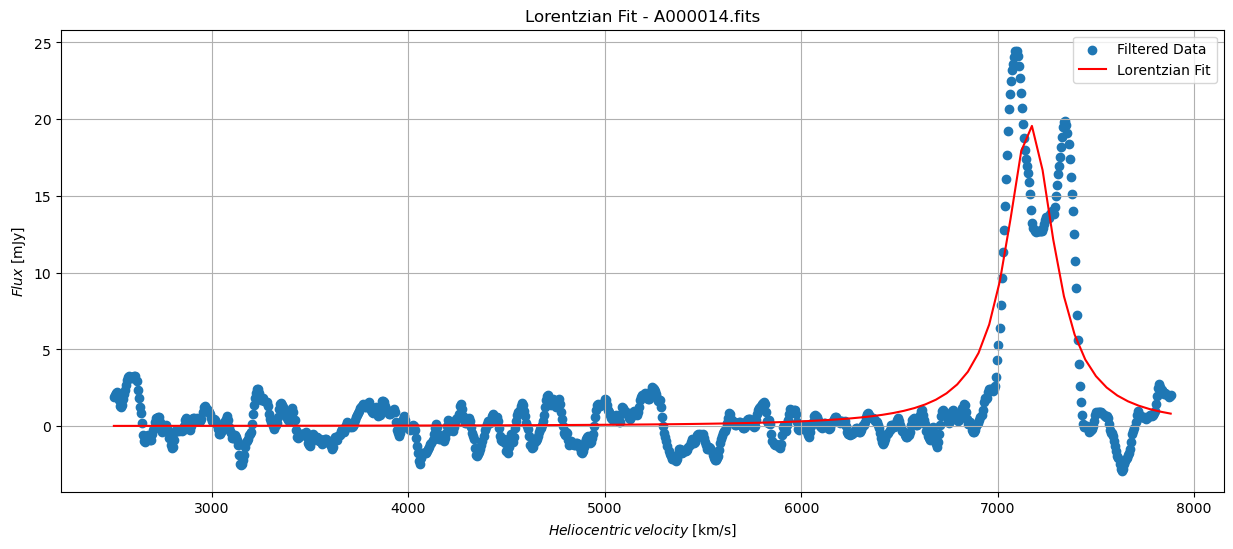

Fitted parameters:
Max peak amplitude (filtered data): 24.457687113457435 mJy
Max peak amplitude (Lorentzian fit): 19.560232909845176 mJy
Center: 7165.880520931621 km/s
Width: 298.5174065643825 km/s
Curve type: Emission
SNR (Filtered Data): 4.972798635083839
SNR (Lorentzian Fit): 5.229106788081845



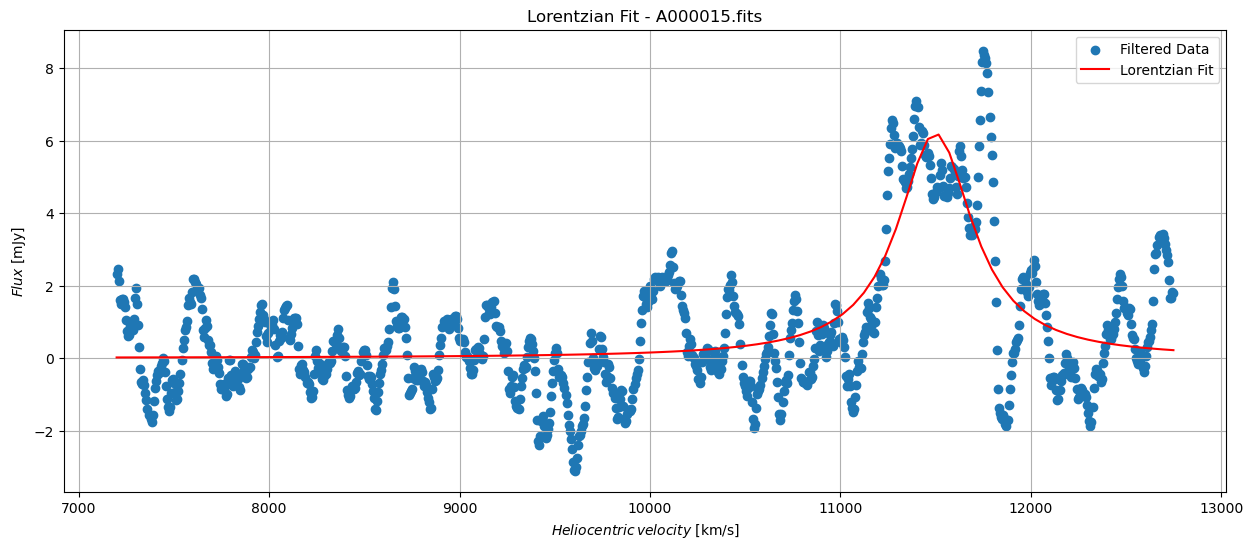

Fitted parameters:
Max peak amplitude (filtered data): 8.481032920043035 mJy
Max peak amplitude (Lorentzian fit): 6.168554613970063 mJy
Center: 11497.97790890331 km/s
Width: 480.25635262498287 km/s
Curve type: Emission
SNR (Filtered Data): 3.969884771884083
SNR (Lorentzian Fit): 4.39622879406928



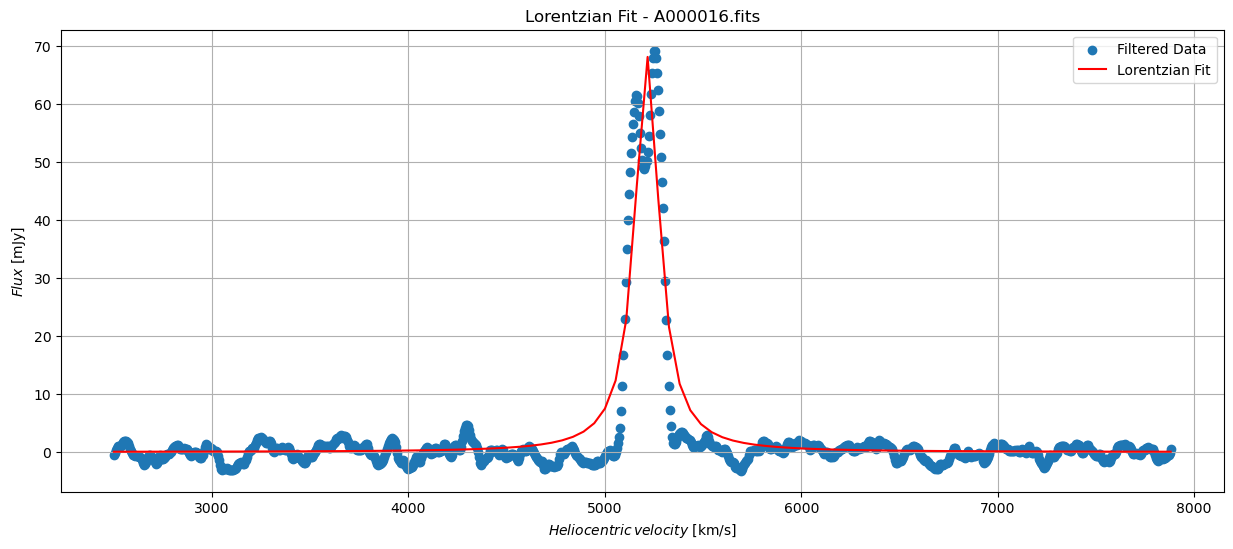

Fitted parameters:
Max peak amplitude (filtered data): 69.2062673717334 mJy
Max peak amplitude (Lorentzian fit): 68.13823422562282 mJy
Center: 5215.406447207228 km/s
Width: 150.99100307755995 km/s
Curve type: Emission
SNR (Filtered Data): 6.131796242926553
SNR (Lorentzian Fit): 7.040521735687864



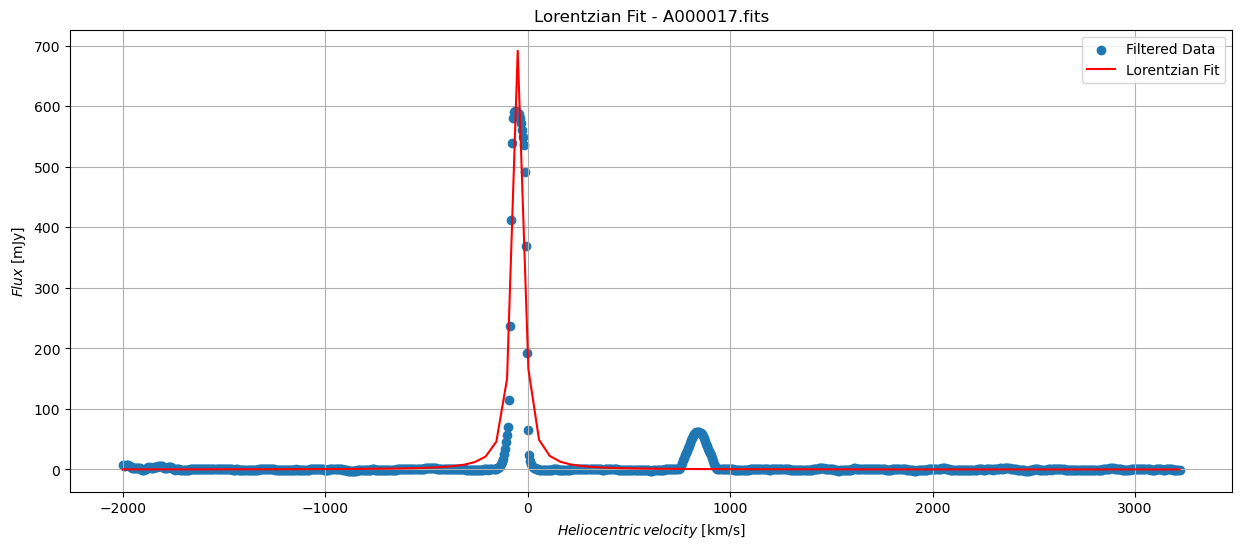

Fitted parameters:
Max peak amplitude (filtered data): 592.935219151225 mJy
Max peak amplitude (Lorentzian fit): 691.9024516941716 mJy
Center: -47.524517790283475 km/s
Width: 57.093457197281836 km/s
Curve type: Emission
SNR (Filtered Data): 4.875416673574746
SNR (Lorentzian Fit): 10.889186493724218



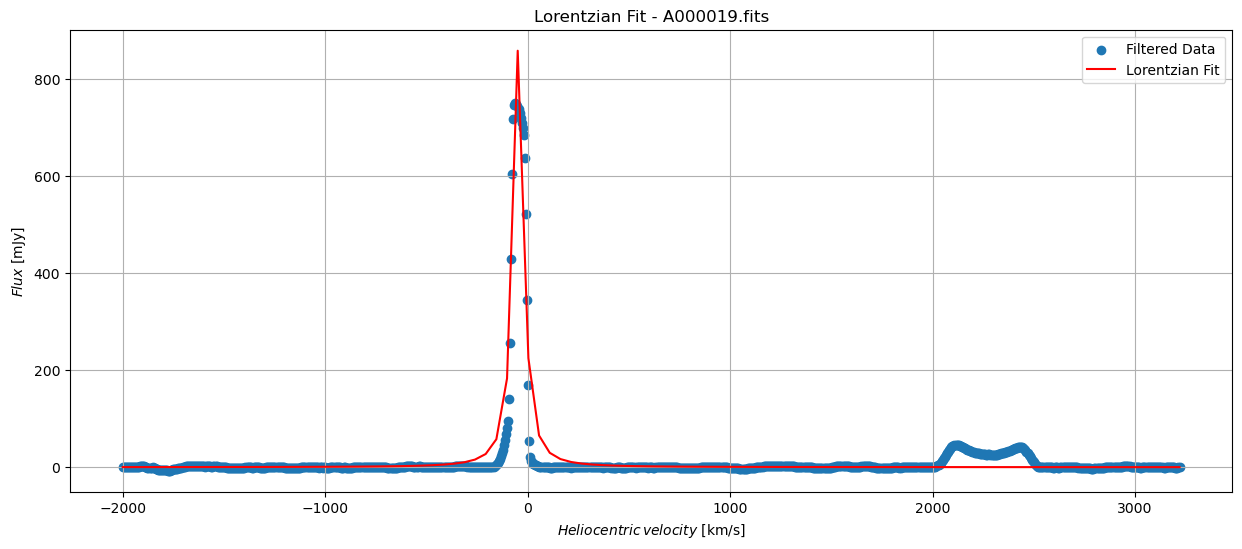

Fitted parameters:
Max peak amplitude (filtered data): 750.8968217258349 mJy
Max peak amplitude (Lorentzian fit): 858.71623951033 mJy
Center: -45.75639328088307 km/s
Width: 58.01772766095121 km/s
Curve type: Emission
SNR (Filtered Data): 4.721674948517289
SNR (Lorentzian Fit): 10.871205658163307



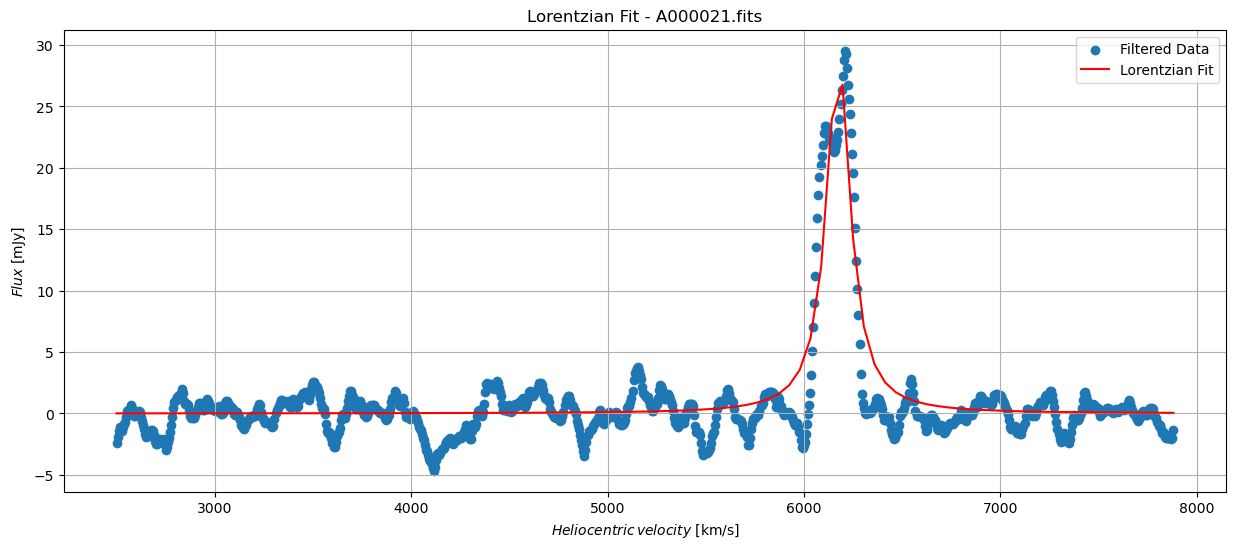

Fitted parameters:
Max peak amplitude (filtered data): 29.53932280457195 mJy
Max peak amplitude (Lorentzian fit): 26.780999970133195 mJy
Center: 6175.1009180563415 km/s
Width: 147.31404963046933 km/s
Curve type: Emission
SNR (Filtered Data): 5.744952514944803
SNR (Lorentzian Fit): 7.144196936594285



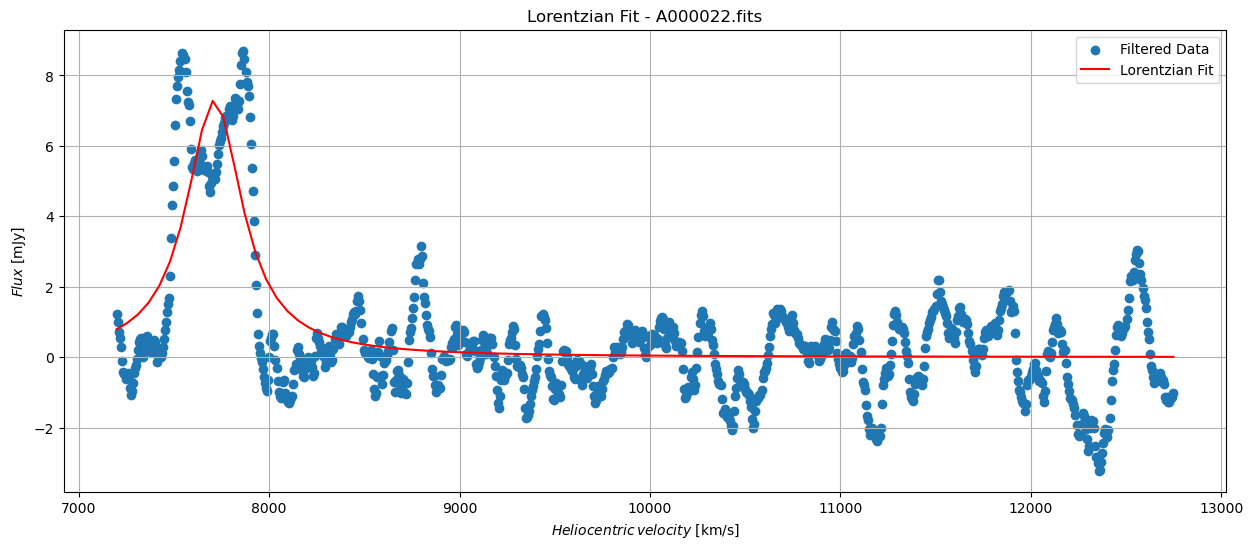

Fitted parameters:
Max peak amplitude (filtered data): 8.701709313384725 mJy
Max peak amplitude (Lorentzian fit): 7.276284577572446 mJy
Center: 7711.748907580536 km/s
Width: 358.5689399149048 km/s
Curve type: Emission
SNR (Filtered Data): 4.25835379952701
SNR (Lorentzian Fit): 4.833018027403503



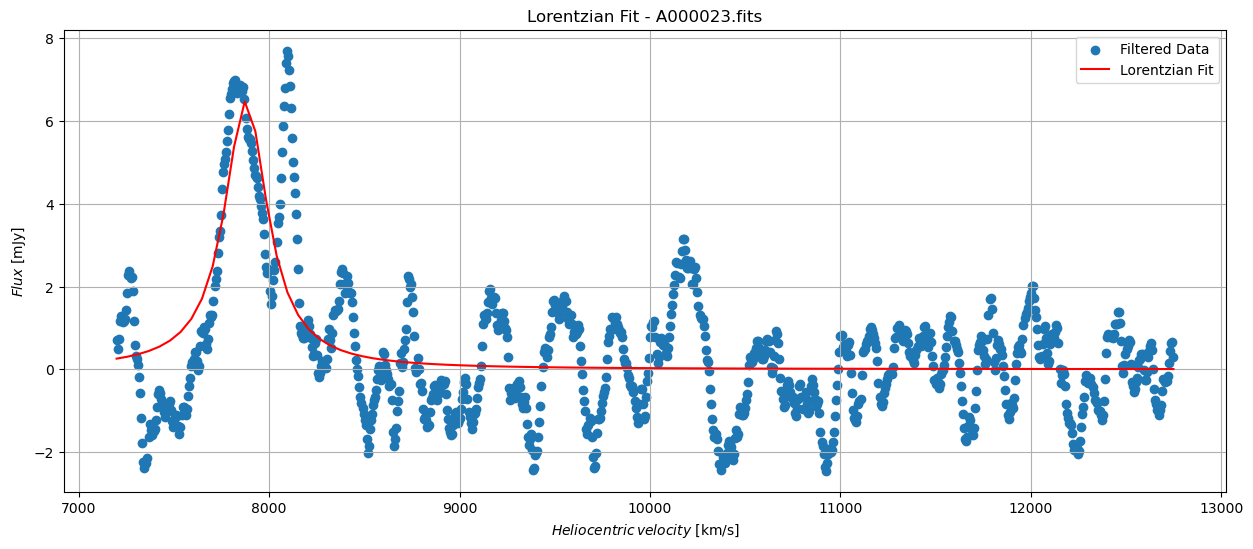

Fitted parameters:
Max peak amplitude (filtered data): 7.698621709574592 mJy
Max peak amplitude (Lorentzian fit): 6.471985278186352 mJy
Center: 7877.801942842081 km/s
Width: 275.9387886505648 km/s
Curve type: Emission
SNR (Filtered Data): 4.182029480645429
SNR (Lorentzian Fit): 5.413713746540959



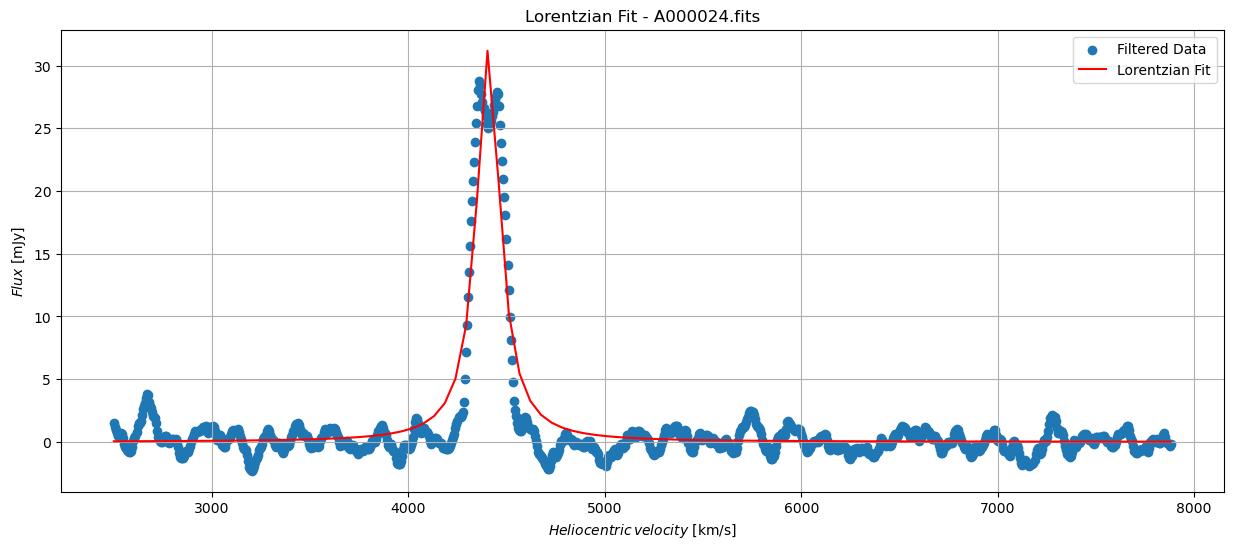

Fitted parameters:
Max peak amplitude (filtered data): 28.796894368340446 mJy
Max peak amplitude (Lorentzian fit): 31.186761523685842 mJy
Center: 4406.282711907909 km/s
Width: 146.24480739615396 km/s
Curve type: Emission
SNR (Filtered Data): 5.976673512575802
SNR (Lorentzian Fit): 7.121756530985868



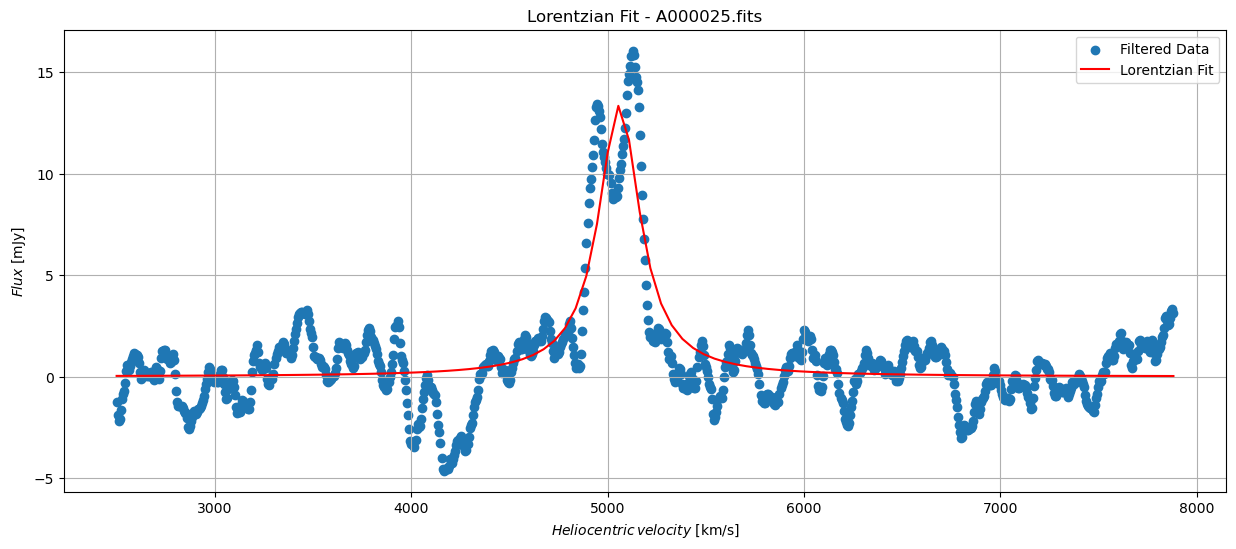

Fitted parameters:
Max peak amplitude (filtered data): 16.065044291218538 mJy
Max peak amplitude (Lorentzian fit): 13.347364144666871 mJy
Center: 5059.660266009444 km/s
Width: 258.07139535456895 km/s
Curve type: Emission
SNR (Filtered Data): 4.949188679891733
SNR (Lorentzian Fit): 5.560133965210478



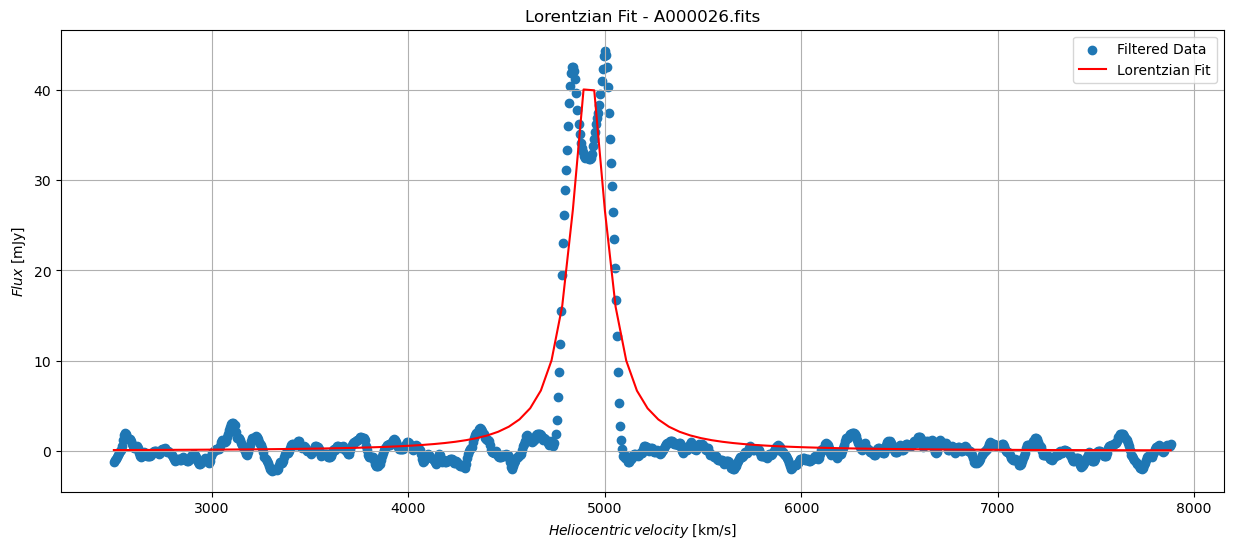

Fitted parameters:
Max peak amplitude (filtered data): 44.35871785783588 mJy
Max peak amplitude (Lorentzian fit): 40.063454356317024 mJy
Center: 4918.549669088748 km/s
Width: 210.56226750767064 km/s
Curve type: Emission
SNR (Filtered Data): 5.457663249720264
SNR (Lorentzian Fit): 6.0675328833519835



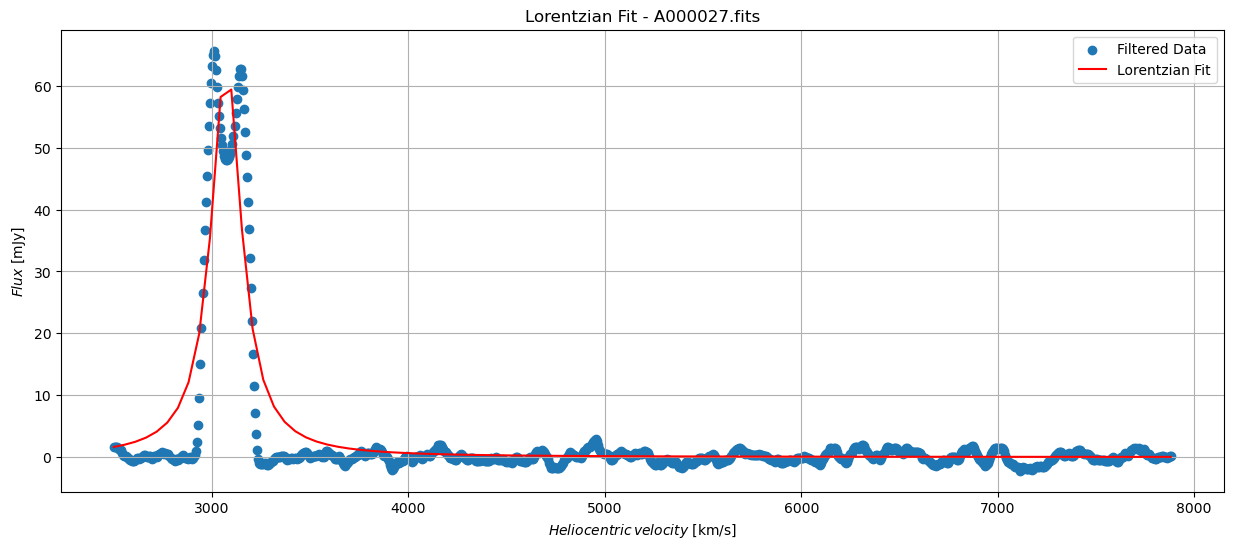

Fitted parameters:
Max peak amplitude (filtered data): 65.66164273587304 mJy
Max peak amplitude (Lorentzian fit): 59.3865829635307 mJy
Center: 3072.7457220794063 km/s
Width: 185.74144134952235 km/s
Curve type: Emission
SNR (Filtered Data): 5.72480470269134
SNR (Lorentzian Fit): 6.355028760262982



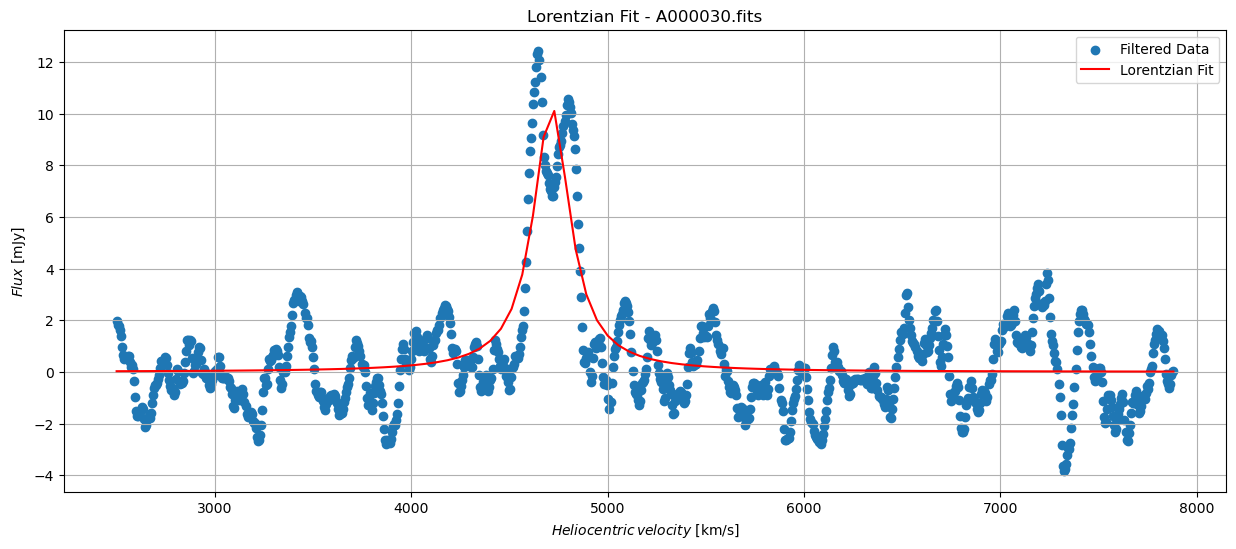

Fitted parameters:
Max peak amplitude (filtered data): 12.430966665146503 mJy
Max peak amplitude (Lorentzian fit): 10.099188610032492 mJy
Center: 4714.77646762448 km/s
Width: 227.57118811915186 km/s
Curve type: Emission
SNR (Filtered Data): 4.858587613610088
SNR (Lorentzian Fit): 5.86027430166452



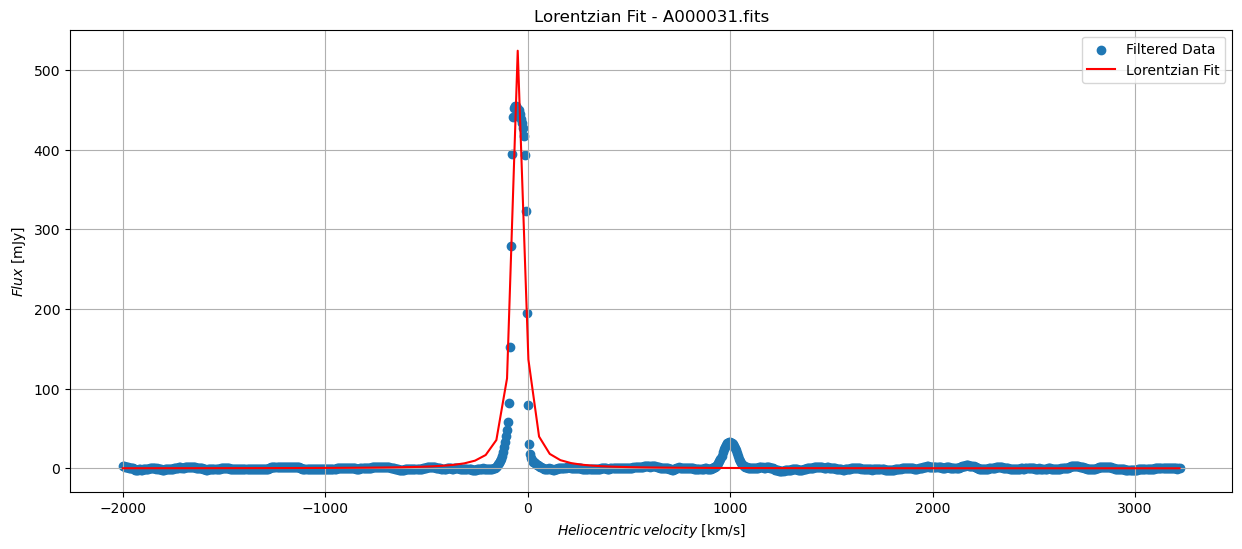

Fitted parameters:
Max peak amplitude (filtered data): 454.79217048896885 mJy
Max peak amplitude (Lorentzian fit): 524.0420974481397 mJy
Center: -46.01558242491621 km/s
Width: 58.218977620978016 km/s
Curve type: Emission
SNR (Filtered Data): 4.726643670048864
SNR (Lorentzian Fit): 10.848755131324882



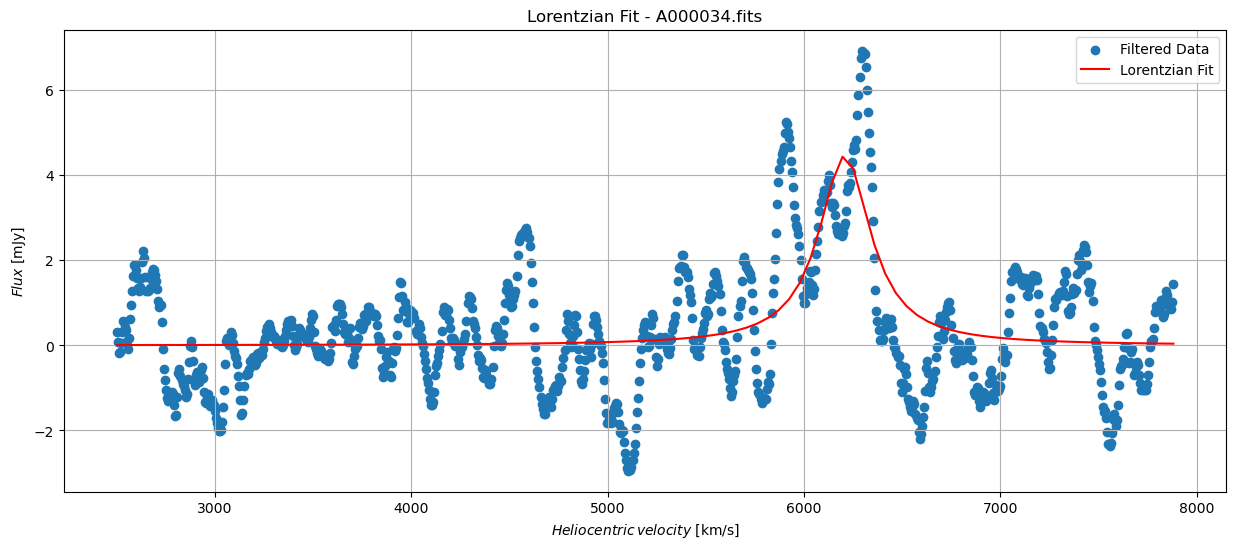

Fitted parameters:
Max peak amplitude (filtered data): 6.93001405734389 mJy
Max peak amplitude (Lorentzian fit): 4.436800520183015 mJy
Center: 6207.26579875982 km/s
Width: 321.5960668285747 km/s
Curve type: Emission
SNR (Filtered Data): 4.036516916684778
SNR (Lorentzian Fit): 5.087202317316884



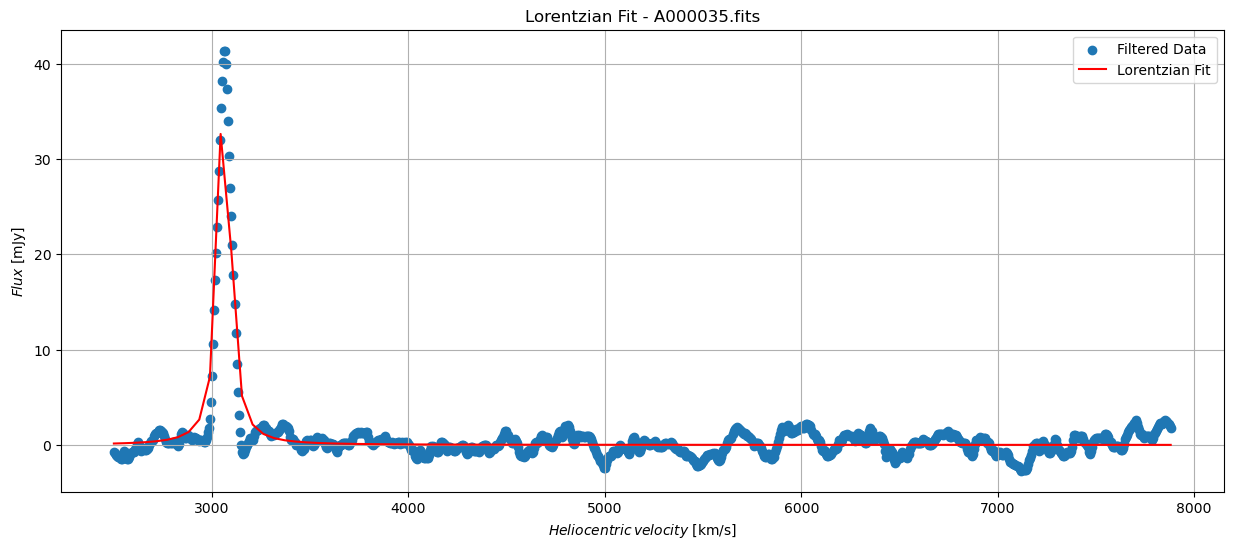

Fitted parameters:
Max peak amplitude (filtered data): 41.350420388793445 mJy
Max peak amplitude (Lorentzian fit): 32.61918353461925 mJy
Center: 3063.168452016151 km/s
Width: 64.66903290973951 km/s
Curve type: Emission
SNR (Filtered Data): 4.956326446168106
SNR (Lorentzian Fit): 10.405018822309554



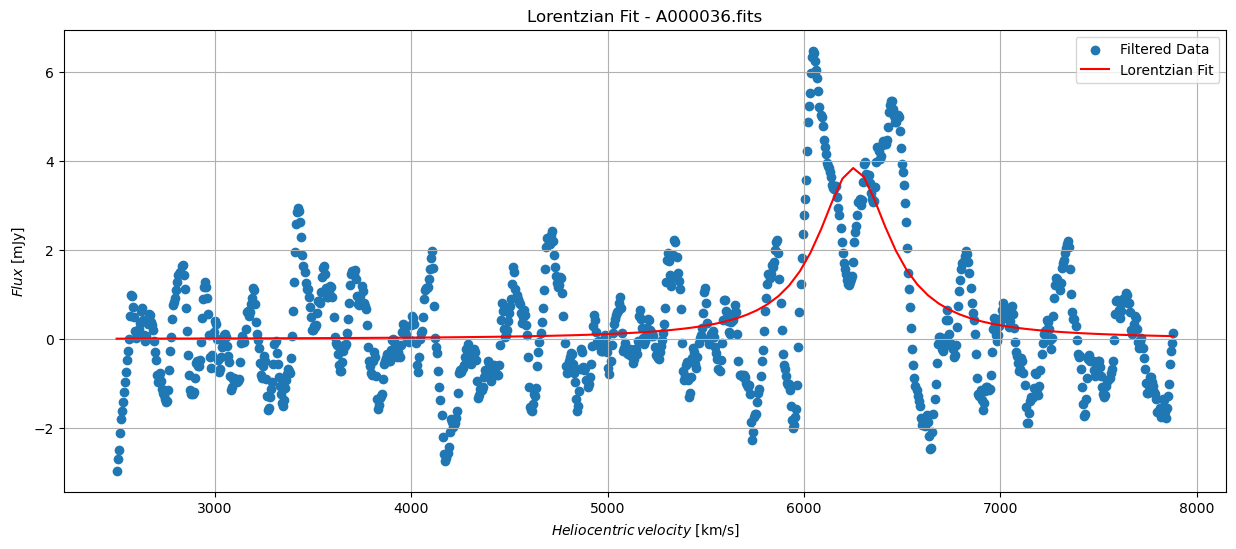

Fitted parameters:
Max peak amplitude (filtered data): 6.482700452829956 mJy
Max peak amplitude (Lorentzian fit): 3.8465241927755334 mJy
Center: 6252.803077792182 km/s
Width: 444.70190675199854 km/s
Curve type: Emission
SNR (Filtered Data): 3.7774077247482105
SNR (Lorentzian Fit): 4.482730522274737



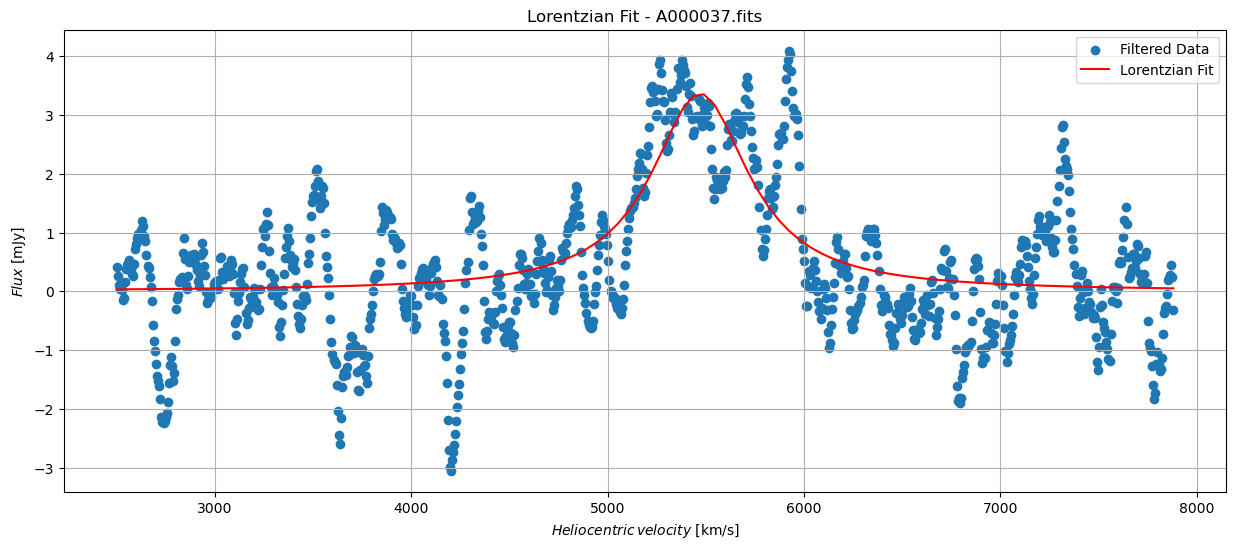

Fitted parameters:
Max peak amplitude (filtered data): 4.09131637045239 mJy
Max peak amplitude (Lorentzian fit): 3.3509039221228742 mJy
Center: 5470.103553208383 km/s
Width: 602.4221959787745 km/s
Curve type: Emission
SNR (Filtered Data): 3.1285327352903907
SNR (Lorentzian Fit): 4.0448480890573135



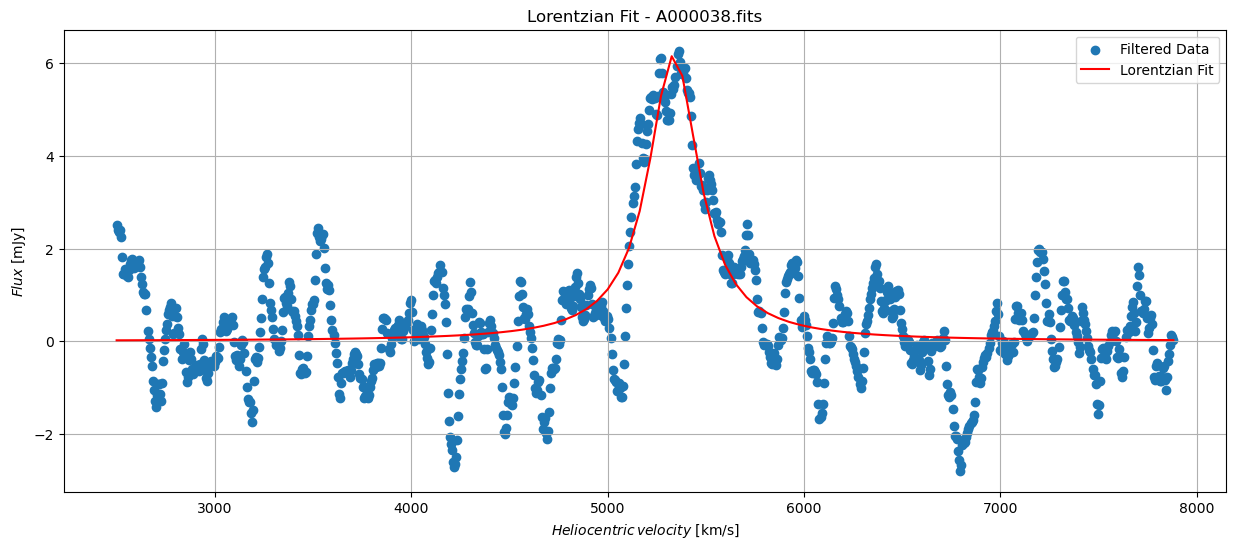

Fitted parameters:
Max peak amplitude (filtered data): 6.272894132640604 mJy
Max peak amplitude (Lorentzian fit): 6.154014315097117 mJy
Center: 5336.383838382599 km/s
Width: 316.0529519497116 km/s
Curve type: Emission
SNR (Filtered Data): 4.003885101797852
SNR (Lorentzian Fit): 5.117265160318154



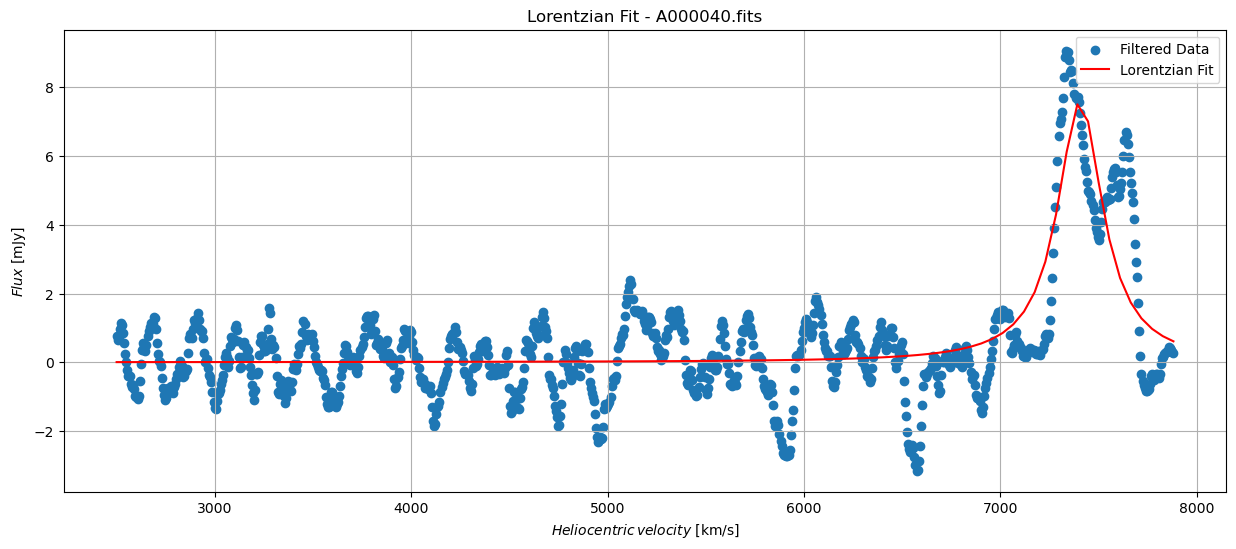

Fitted parameters:
Max peak amplitude (filtered data): 9.064927328423876 mJy
Max peak amplitude (Lorentzian fit): 7.5055604399567954 mJy
Center: 7405.81538096782 km/s
Width: 281.1284853091946 km/s
Curve type: Emission
SNR (Filtered Data): 4.293610255353445
SNR (Lorentzian Fit): 5.350900179935259



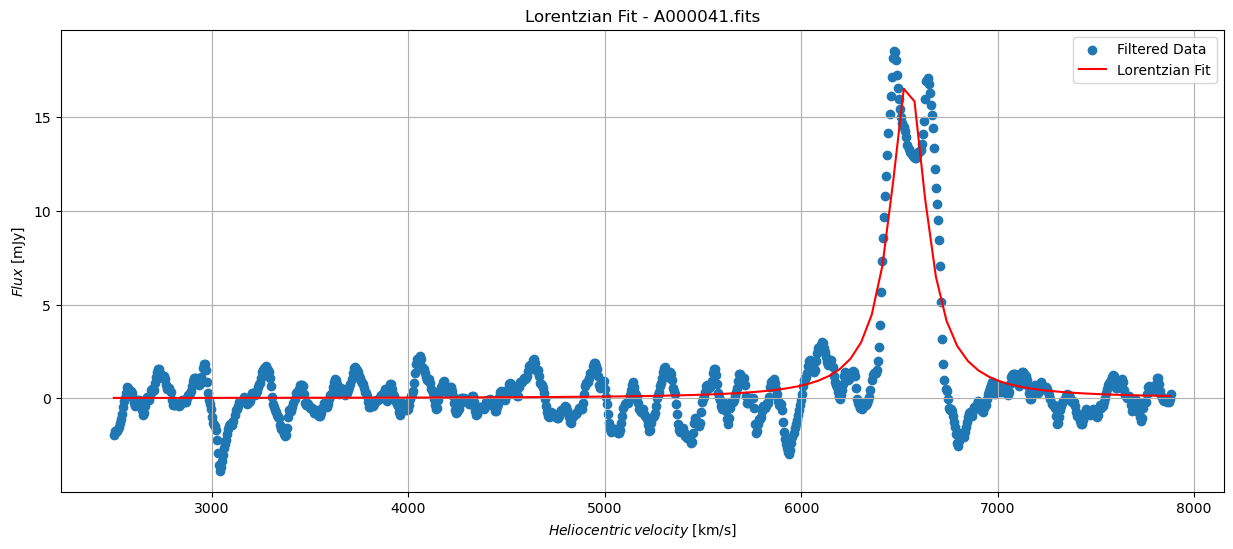

Fitted parameters:
Max peak amplitude (filtered data): 18.556704725404476 mJy
Max peak amplitude (Lorentzian fit): 16.524331618418916 mJy
Center: 6544.364000104981 km/s
Width: 219.40323004644148 km/s
Curve type: Emission
SNR (Filtered Data): 5.255006963006499
SNR (Lorentzian Fit): 5.979422277062972



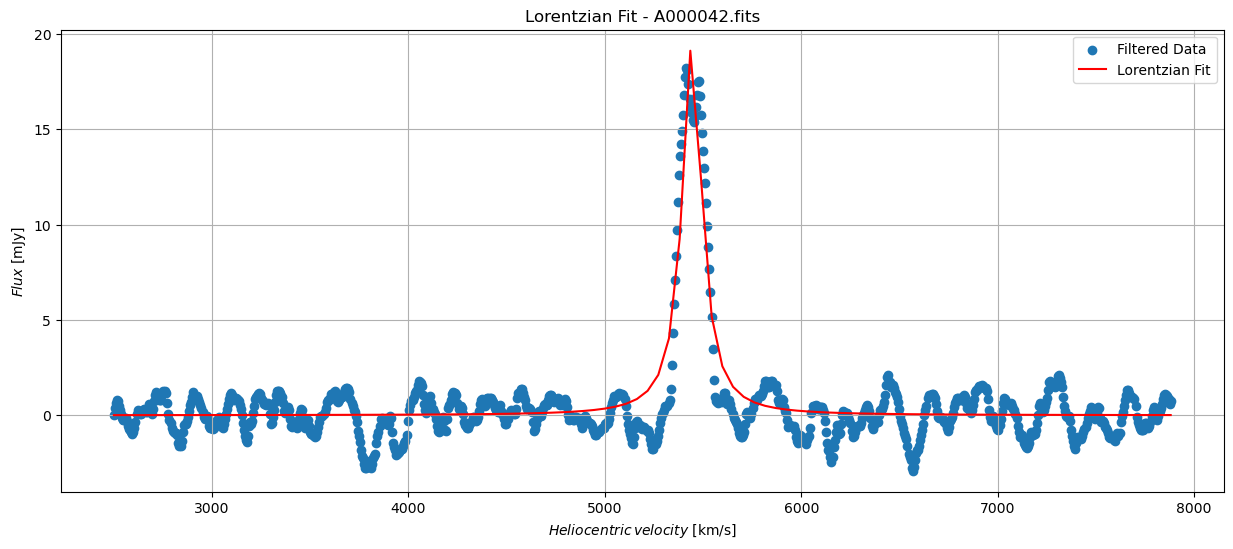

Fitted parameters:
Max peak amplitude (filtered data): 18.233540728787183 mJy
Max peak amplitude (Lorentzian fit): 19.116549757799852 mJy
Center: 5444.065189733924 km/s
Width: 119.9459040297882 km/s
Curve type: Emission
SNR (Filtered Data): 6.39059310743477
SNR (Lorentzian Fit): 7.825798031953393



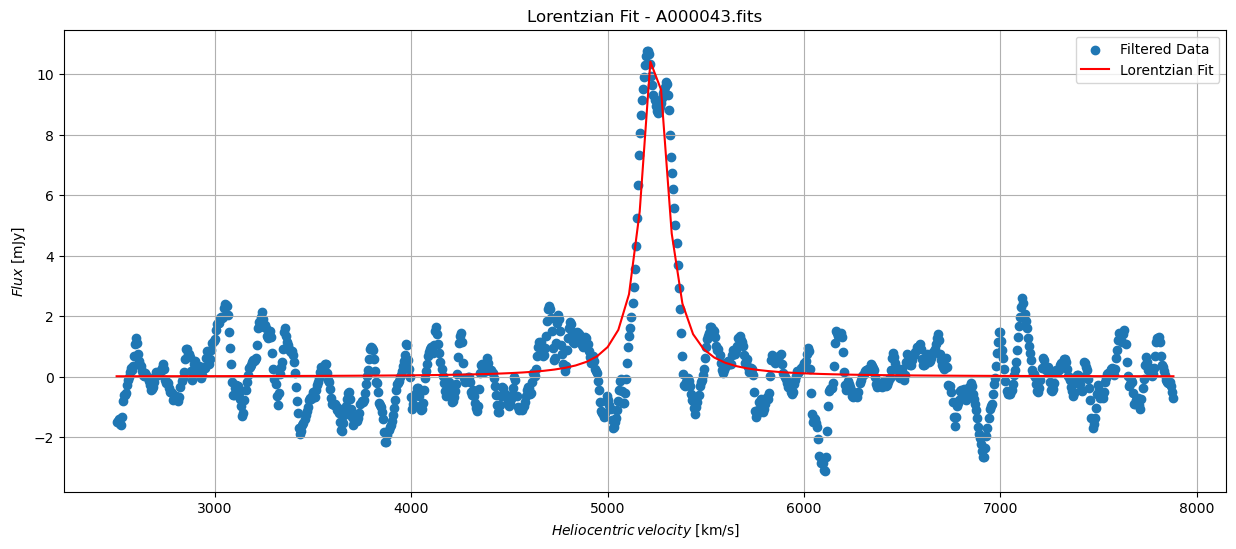

Fitted parameters:
Max peak amplitude (filtered data): 10.77211858190666 mJy
Max peak amplitude (Lorentzian fit): 10.410215923356699 mJy
Center: 5239.633043237402 km/s
Width: 146.79380140964267 km/s
Curve type: Emission
SNR (Filtered Data): 5.296633818187208
SNR (Lorentzian Fit): 7.136603210407847



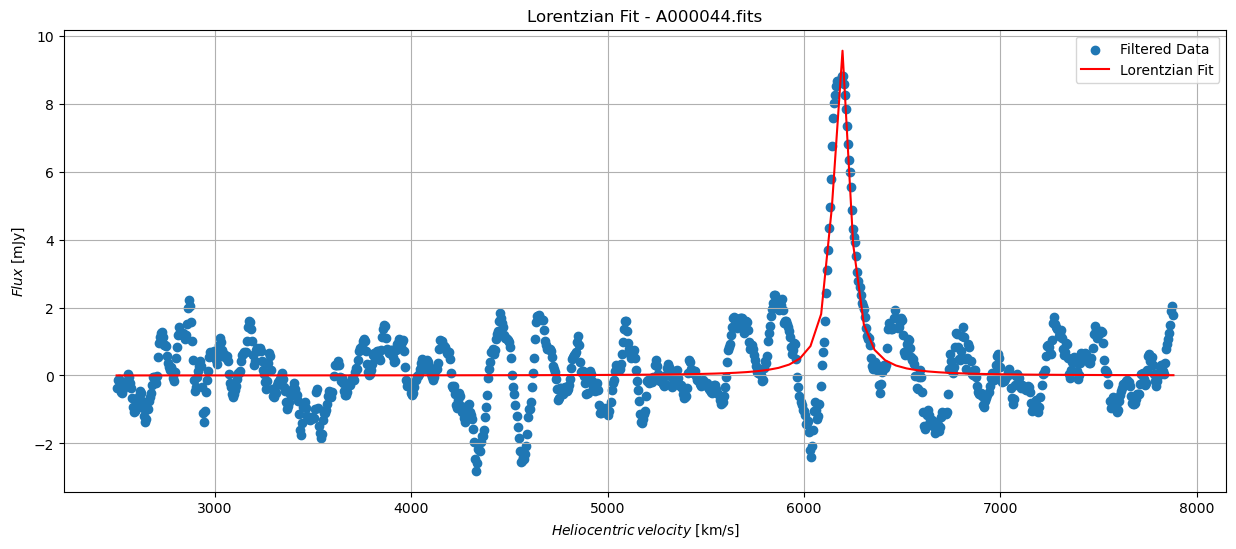

Fitted parameters:
Max peak amplitude (filtered data): 8.808901491634604 mJy
Max peak amplitude (Lorentzian fit): 9.557577590978944 mJy
Center: 6189.852943434495 km/s
Width: 98.17634178708516 km/s
Curve type: Emission
SNR (Filtered Data): 3.8576042534955772
SNR (Lorentzian Fit): 8.619718266855765



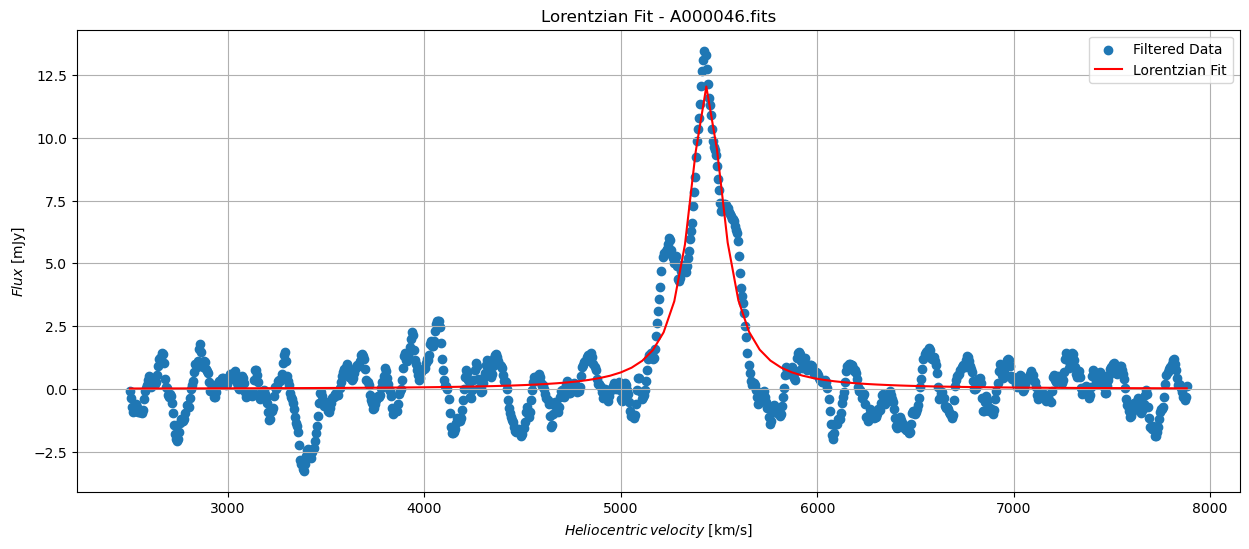

Fitted parameters:
Max peak amplitude (filtered data): 13.466192455232745 mJy
Max peak amplitude (Lorentzian fit): 12.040062197577825 mJy
Center: 5435.79454452281 km/s
Width: 209.1732472944611 km/s
Curve type: Emission
SNR (Filtered Data): 4.2832660170243715
SNR (Lorentzian Fit): 6.094202297704576



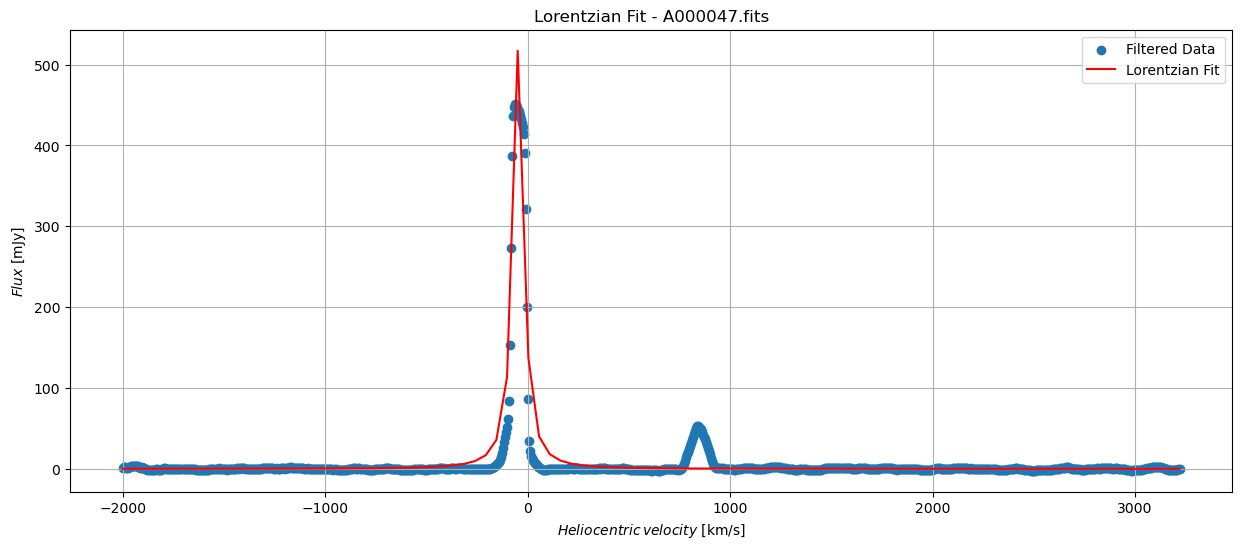

Fitted parameters:
Max peak amplitude (filtered data): 451.0405730261915 mJy
Max peak amplitude (Lorentzian fit): 517.0648094475397 mJy
Center: -46.009987754583115 km/s
Width: 58.94004043892445 km/s
Curve type: Emission
SNR (Filtered Data): 4.922183563765625
SNR (Lorentzian Fit): 10.784845358139409



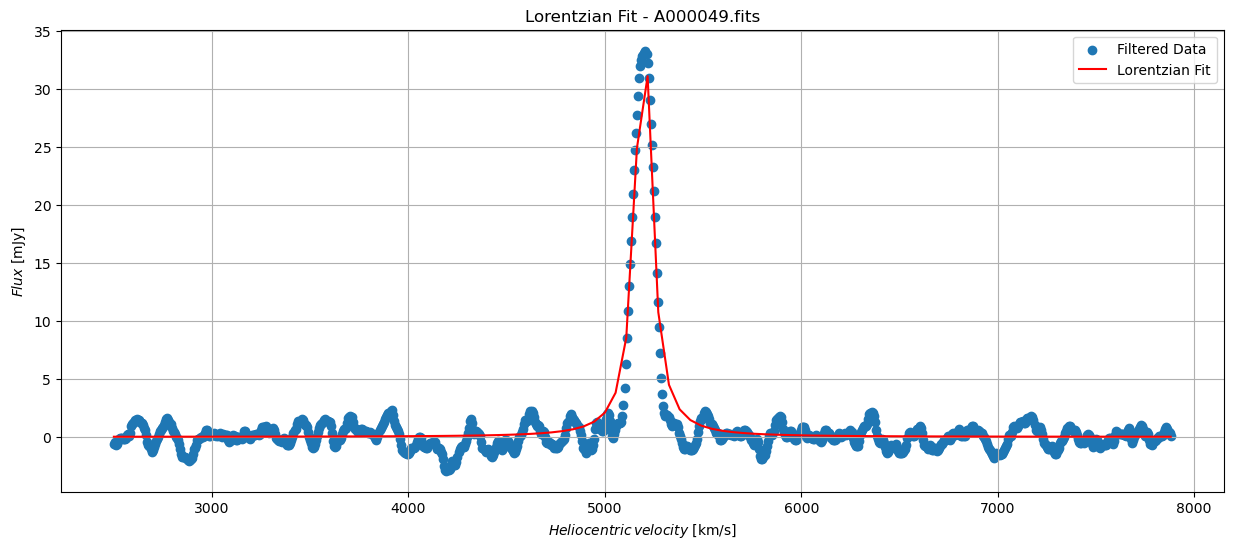

Fitted parameters:
Max peak amplitude (filtered data): 33.314639856943536 mJy
Max peak amplitude (Lorentzian fit): 31.116192910545156 mJy
Center: 5196.857874154238 km/s
Width: 96.37386857461738 km/s
Curve type: Emission
SNR (Filtered Data): 3.980505021230638
SNR (Lorentzian Fit): 8.675602350517272



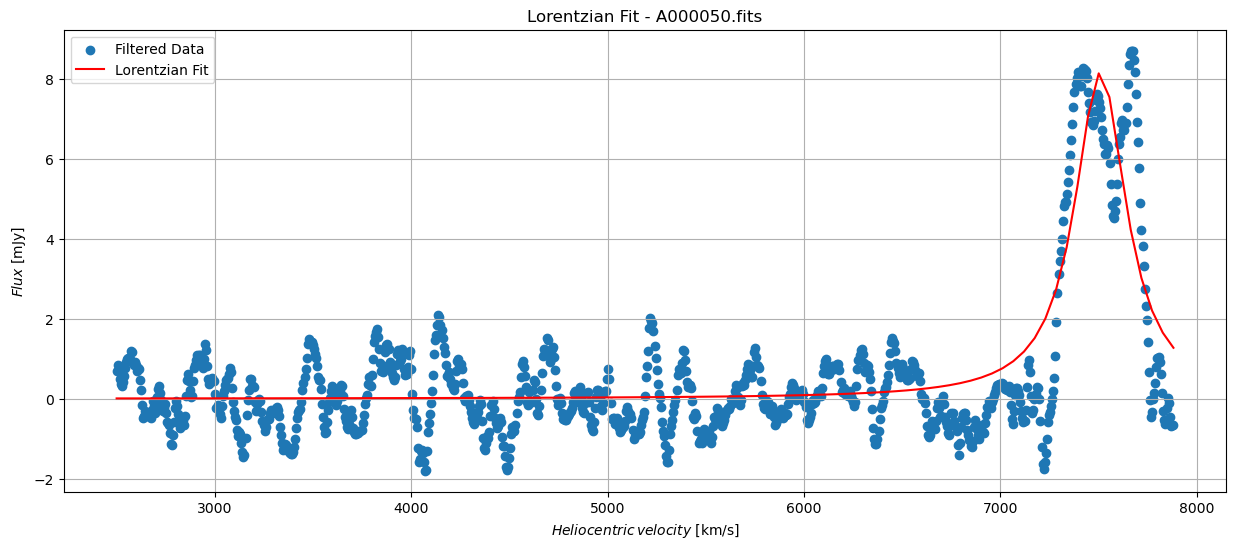

Fitted parameters:
Max peak amplitude (filtered data): 8.710314433737432 mJy
Max peak amplitude (Lorentzian fit): 8.143552919411846 mJy
Center: 7509.010948839172 km/s
Width: 319.8474609667913 km/s
Curve type: Emission
SNR (Filtered Data): 4.330024070774347
SNR (Lorentzian Fit): 5.059764796712232



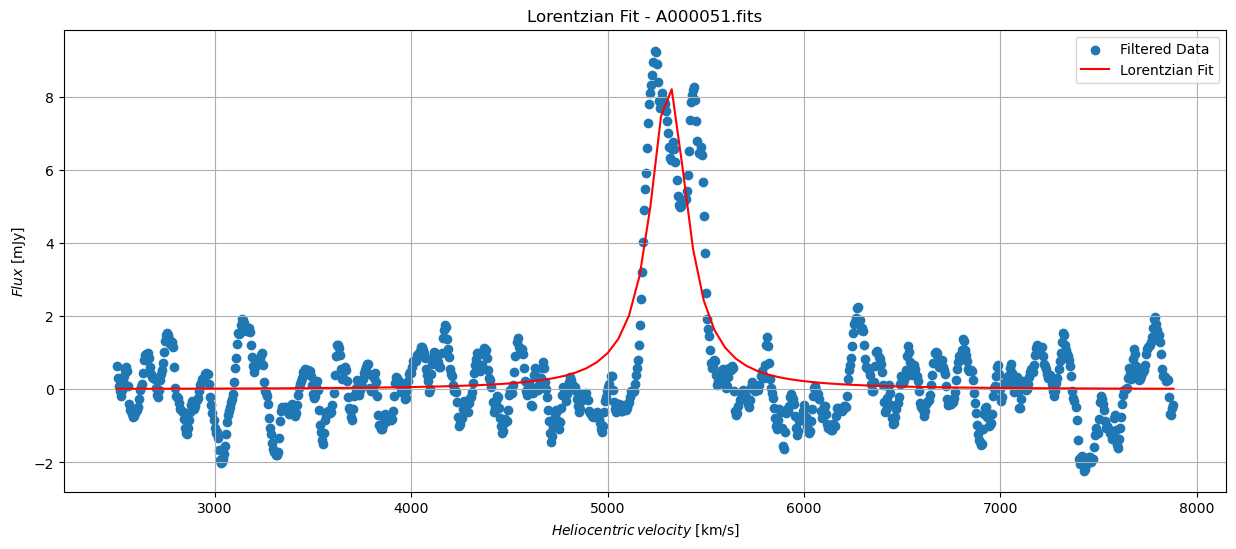

Fitted parameters:
Max peak amplitude (filtered data): 9.266572507130007 mJy
Max peak amplitude (Lorentzian fit): 8.212498123183183 mJy
Center: 5311.294331738535 km/s
Width: 228.28952008508568 km/s
Curve type: Emission
SNR (Filtered Data): 4.830705655571003
SNR (Lorentzian Fit): 5.862758075826558



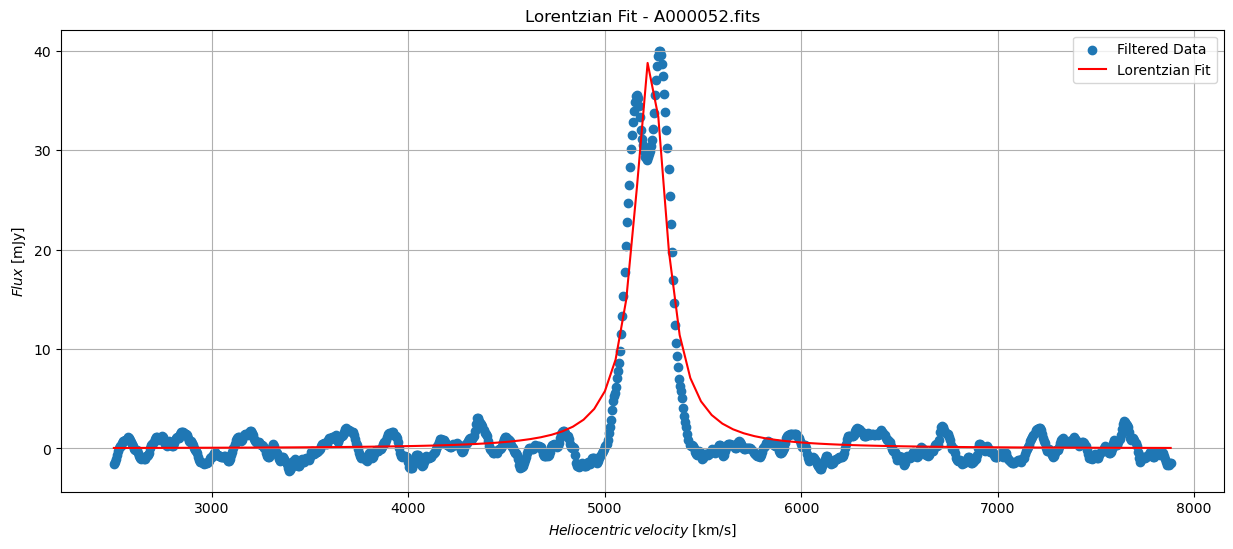

Fitted parameters:
Max peak amplitude (filtered data): 39.9967059318478 mJy
Max peak amplitude (Lorentzian fit): 38.76704230942374 mJy
Center: 5231.090001094534 km/s
Width: 190.69369025942467 km/s
Curve type: Emission
SNR (Filtered Data): 5.5204920899723735
SNR (Lorentzian Fit): 6.3402446796961085



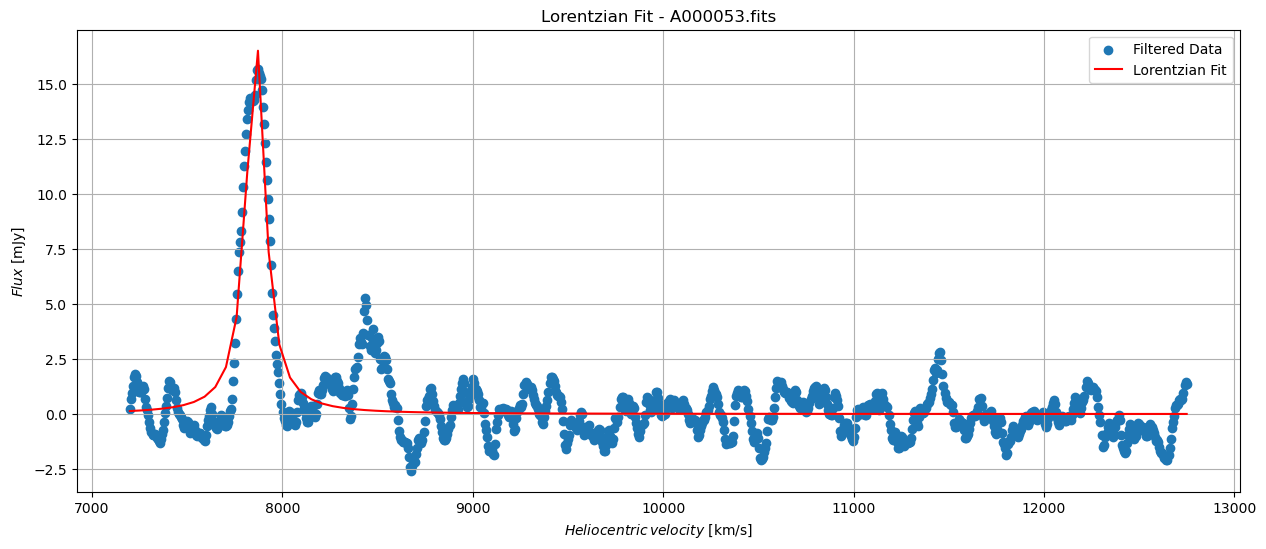

Fitted parameters:
Max peak amplitude (filtered data): 15.663716118826 mJy
Max peak amplitude (Lorentzian fit): 16.49573058189326 mJy
Center: 7859.326720601238 km/s
Width: 117.69476977973035 km/s
Curve type: Emission
SNR (Filtered Data): 4.256697556401203
SNR (Lorentzian Fit): 7.956048957118907



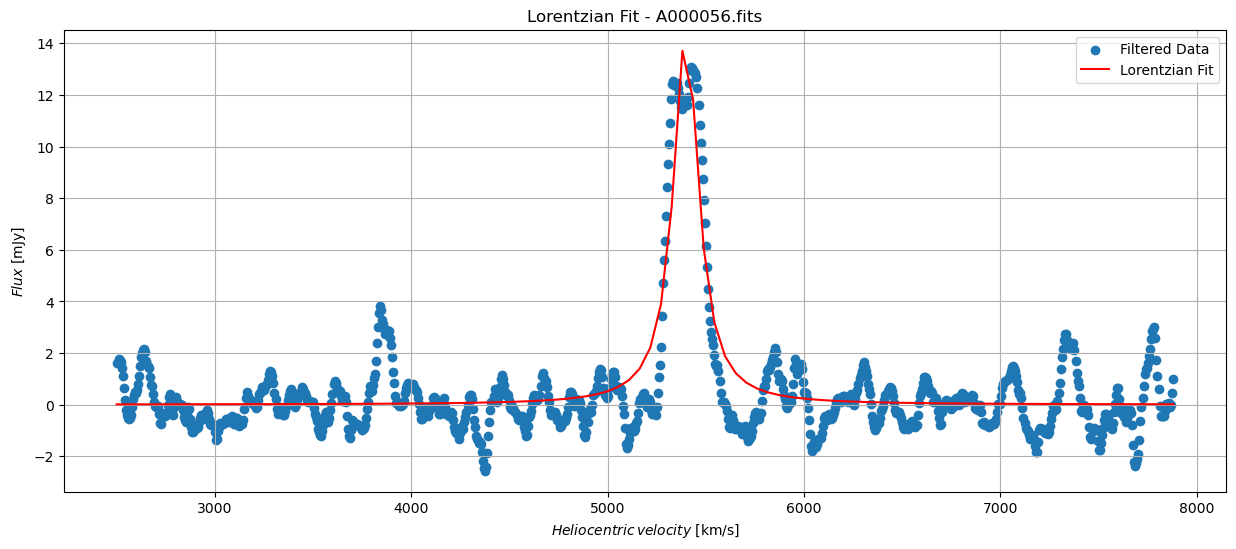

Fitted parameters:
Max peak amplitude (filtered data): 13.075107992317271 mJy
Max peak amplitude (Lorentzian fit): 13.714508007522596 mJy
Center: 5398.75538627368 km/s
Width: 153.84901611831327 km/s
Curve type: Emission
SNR (Filtered Data): 5.340979656864326
SNR (Lorentzian Fit): 6.9897034703701015



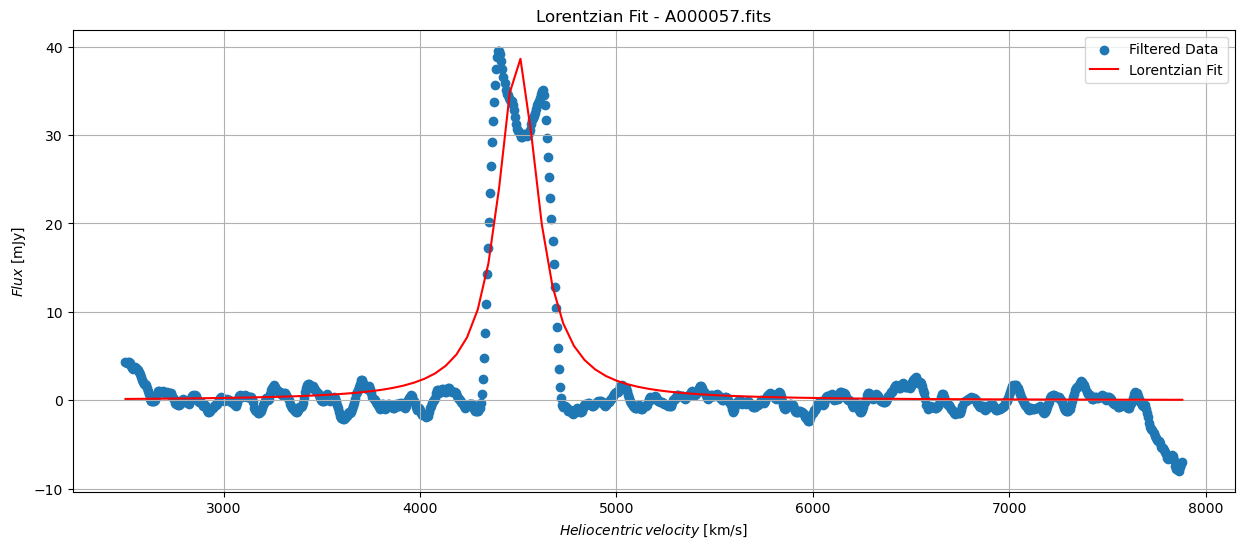

Fitted parameters:
Max peak amplitude (filtered data): 39.54909660820909 mJy
Max peak amplitude (Lorentzian fit): 38.63871831016828 mJy
Center: 4499.411384845073 km/s
Width: 245.79739400101272 km/s
Curve type: Emission
SNR (Filtered Data): 4.6828797197461824
SNR (Lorentzian Fit): 5.6671959325595695



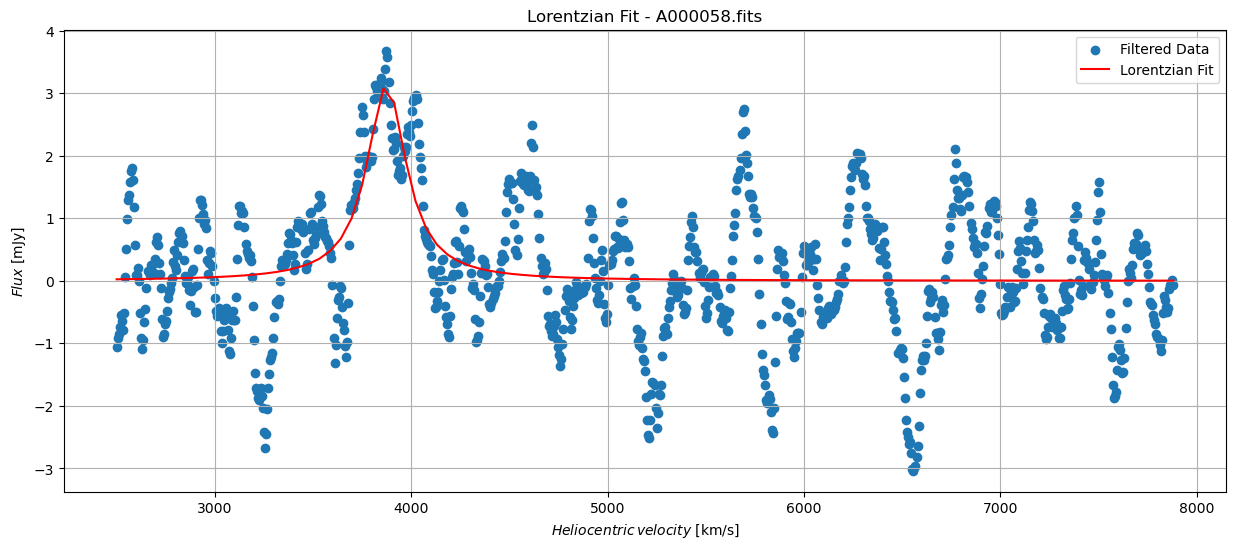

Fitted parameters:
Max peak amplitude (filtered data): 3.6803093437226604 mJy
Max peak amplitude (Lorentzian fit): 3.07758098660941 mJy
Center: 3874.838652341532 km/s
Width: 244.2569143747317 km/s
Curve type: Emission
SNR (Filtered Data): 3.0319053300626346
SNR (Lorentzian Fit): 5.666187690129898



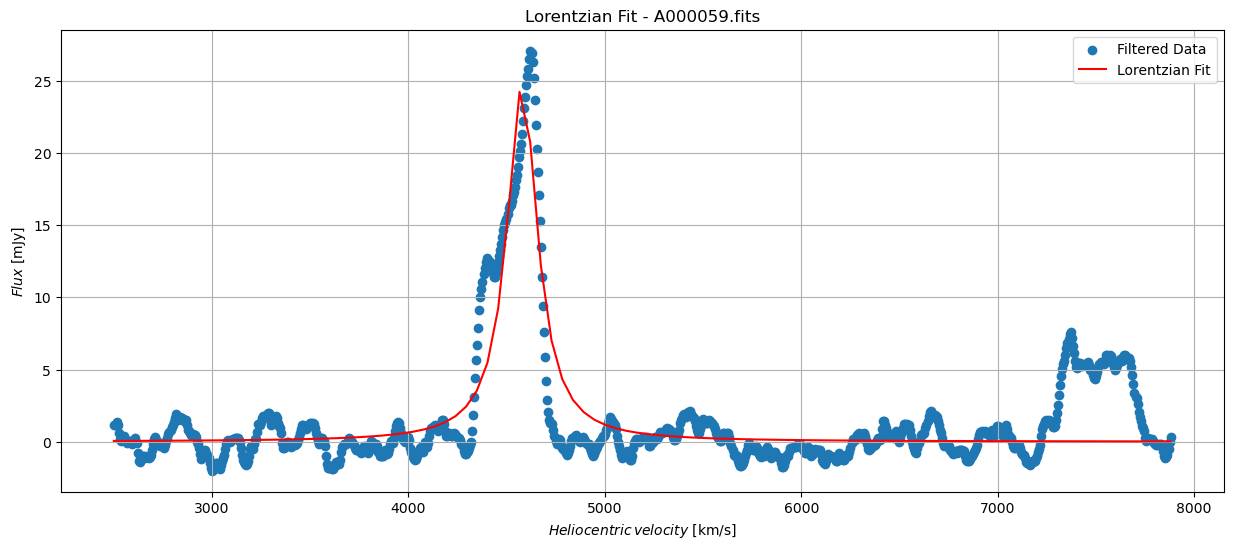

Fitted parameters:
Max peak amplitude (filtered data): 27.088097592132364 mJy
Max peak amplitude (Lorentzian fit): 24.239463327191025 mJy
Center: 4578.907220180157 km/s
Width: 188.2511205013891 km/s
Curve type: Emission
SNR (Filtered Data): 4.48126487361438
SNR (Lorentzian Fit): 6.367596175646199



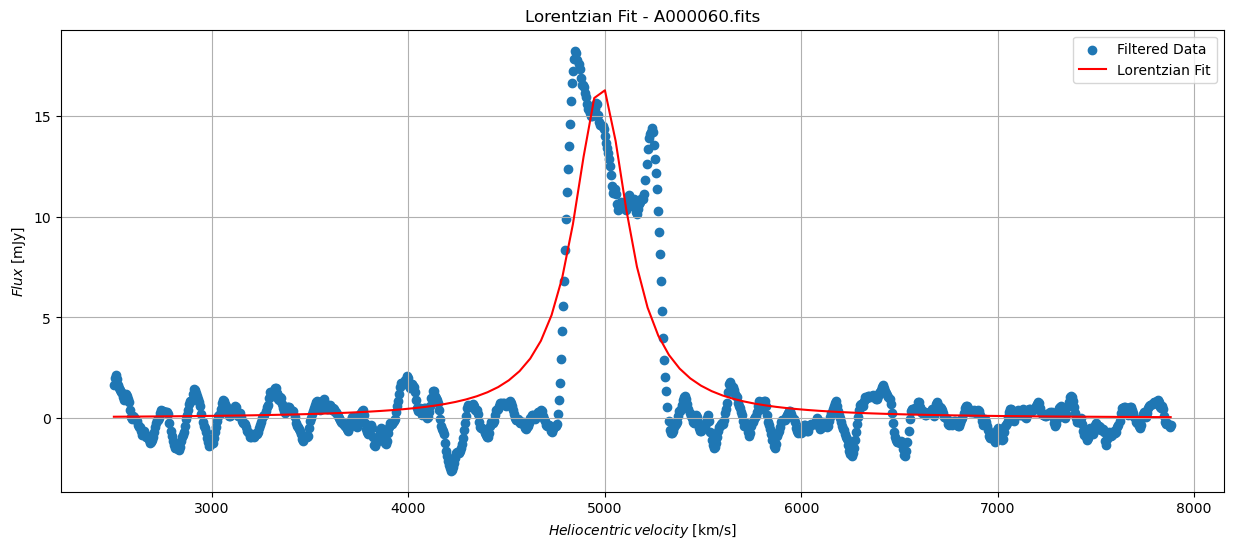

Fitted parameters:
Max peak amplitude (filtered data): 18.224130959020414 mJy
Max peak amplitude (Lorentzian fit): 16.261149689639407 mJy
Center: 4979.513214587979 km/s
Width: 335.95514510188434 km/s
Curve type: Emission
SNR (Filtered Data): 4.161528396066871
SNR (Lorentzian Fit): 4.988257584369849



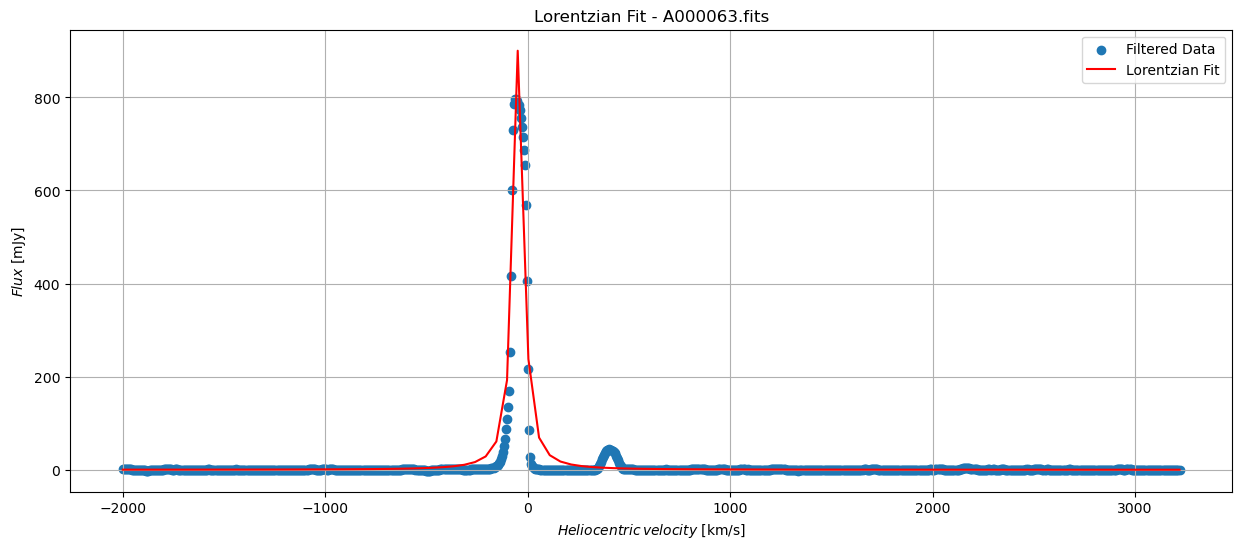

Fitted parameters:
Max peak amplitude (filtered data): 796.0049548219182 mJy
Max peak amplitude (Lorentzian fit): 900.2860692163467 mJy
Center: -45.65811777491148 km/s
Width: 58.232336110984285 km/s
Curve type: Emission
SNR (Filtered Data): 4.762379320273183
SNR (Lorentzian Fit): 10.853079653809768



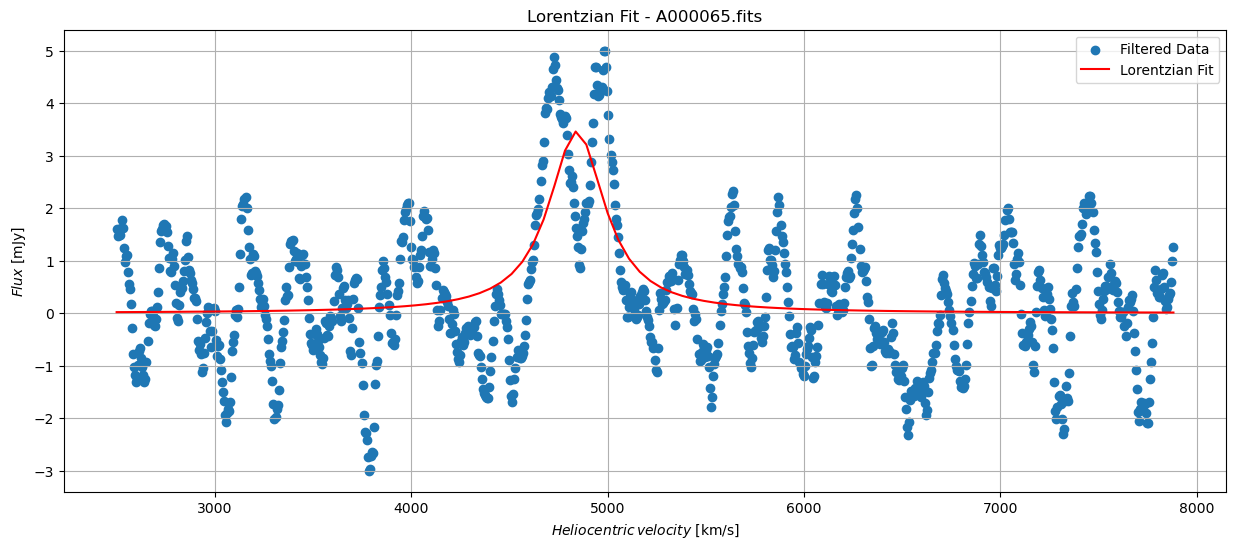

Fitted parameters:
Max peak amplitude (filtered data): 5.001102998634494 mJy
Max peak amplitude (Lorentzian fit): 3.4609155924391852 mJy
Center: 4842.97683172516 km/s
Width: 347.841070675558 km/s
Curve type: Emission
SNR (Filtered Data): 3.735529578269087
SNR (Lorentzian Fit): 4.9178830043740085



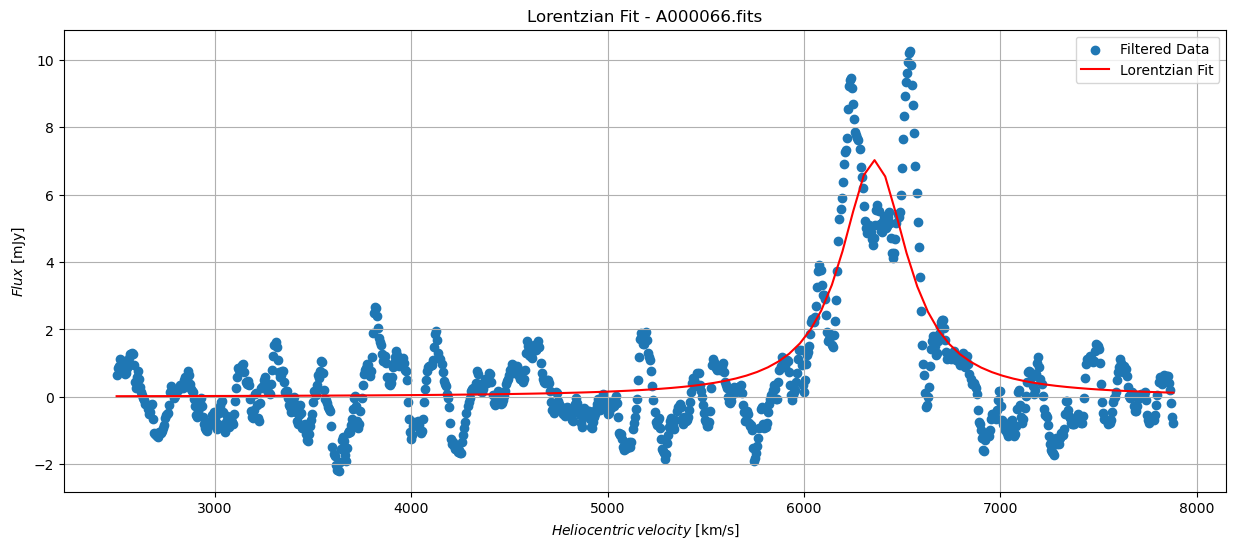

Fitted parameters:
Max peak amplitude (filtered data): 10.266697703258131 mJy
Max peak amplitude (Lorentzian fit): 7.021321316505553 mJy
Center: 6357.703094995514 km/s
Width: 408.9904425884955 km/s
Curve type: Emission
SNR (Filtered Data): 4.94288342479369
SNR (Lorentzian Fit): 4.625325640041304



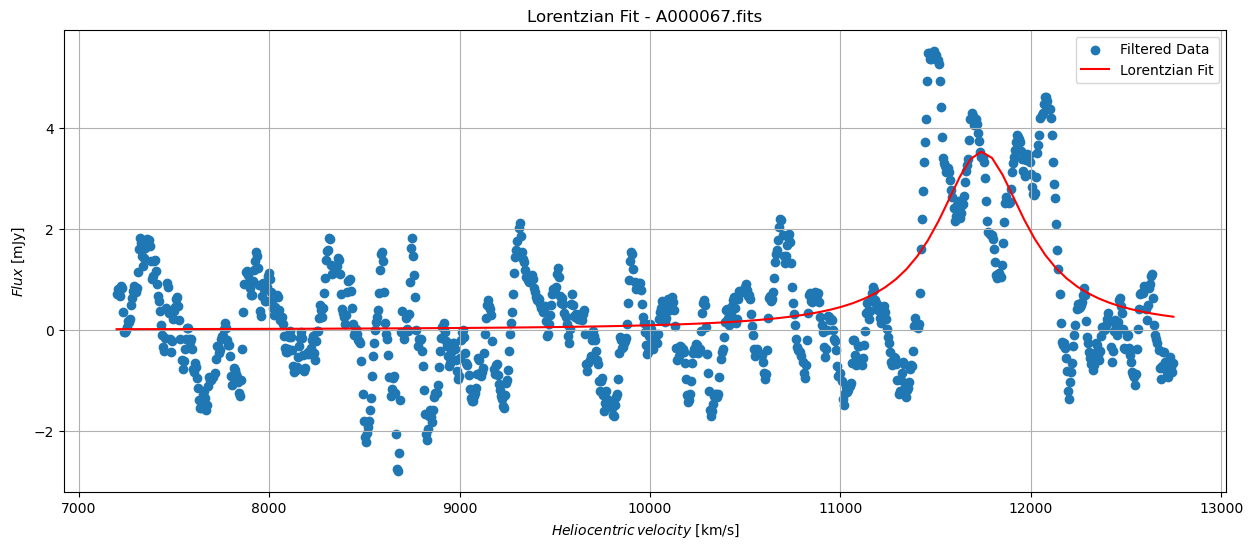

Fitted parameters:
Max peak amplitude (filtered data): 5.52414886908722 mJy
Max peak amplitude (Lorentzian fit): 3.5253610171755456 mJy
Center: 11742.055441907847 km/s
Width: 568.2959038457847 km/s
Curve type: Emission
SNR (Filtered Data): 3.5584217024276024
SNR (Lorentzian Fit): 4.119317459259141



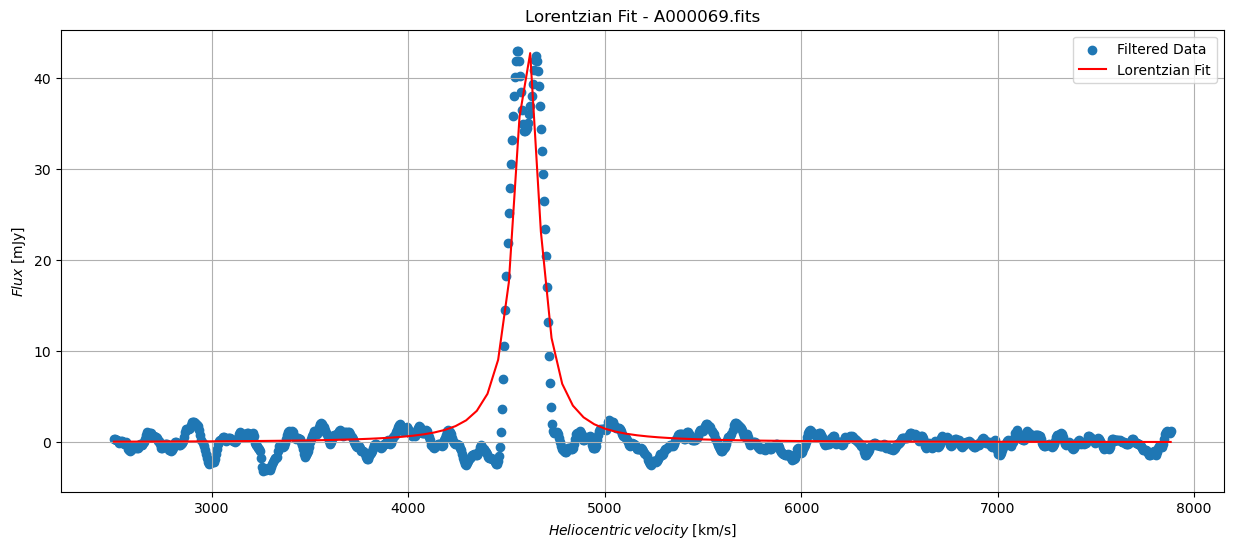

Fitted parameters:
Max peak amplitude (filtered data): 43.01122718927648 mJy
Max peak amplitude (Lorentzian fit): 42.74775180390682 mJy
Center: 4602.943017622198 km/s
Width: 146.6308274067138 km/s
Curve type: Emission
SNR (Filtered Data): 6.118040736241332
SNR (Lorentzian Fit): 7.119419386652303



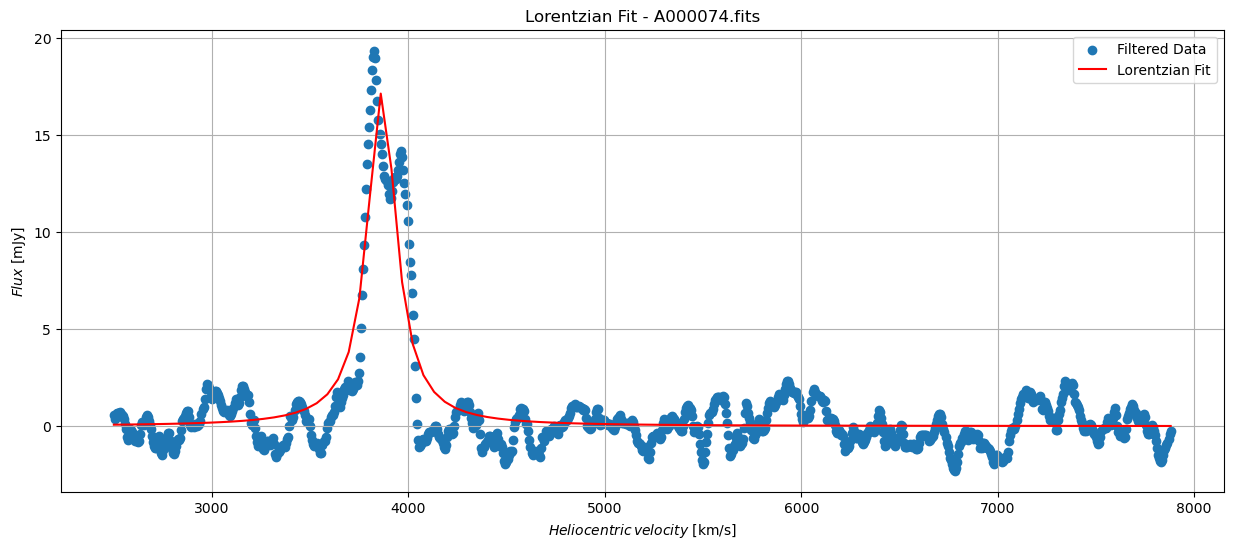

Fitted parameters:
Max peak amplitude (filtered data): 19.343816529158275 mJy
Max peak amplitude (Lorentzian fit): 17.134817122571043 mJy
Center: 3864.4029916888303 km/s
Width: 180.02602889430878 km/s
Curve type: Emission
SNR (Filtered Data): 5.49861207603997
SNR (Lorentzian Fit): 6.477094806042867



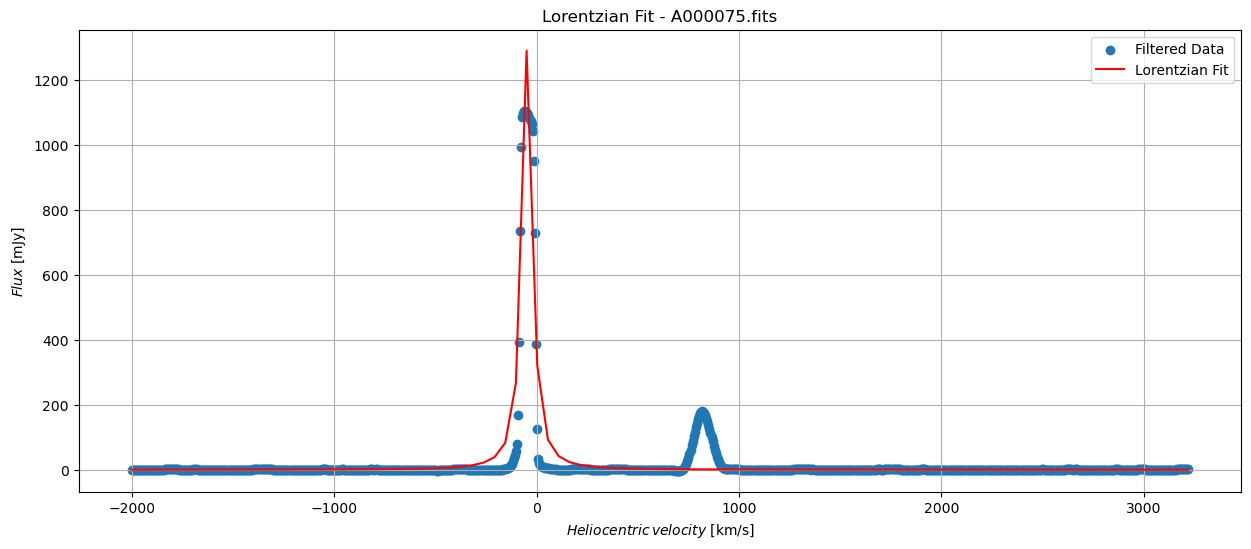

Fitted parameters:
Max peak amplitude (filtered data): 1105.0834717374855 mJy
Max peak amplitude (Lorentzian fit): 1290.9890980942218 mJy
Center: -46.18817254117631 km/s
Width: 56.61244766171868 km/s
Curve type: Emission
SNR (Filtered Data): 5.0459307233495
SNR (Lorentzian Fit): 10.991684870498117



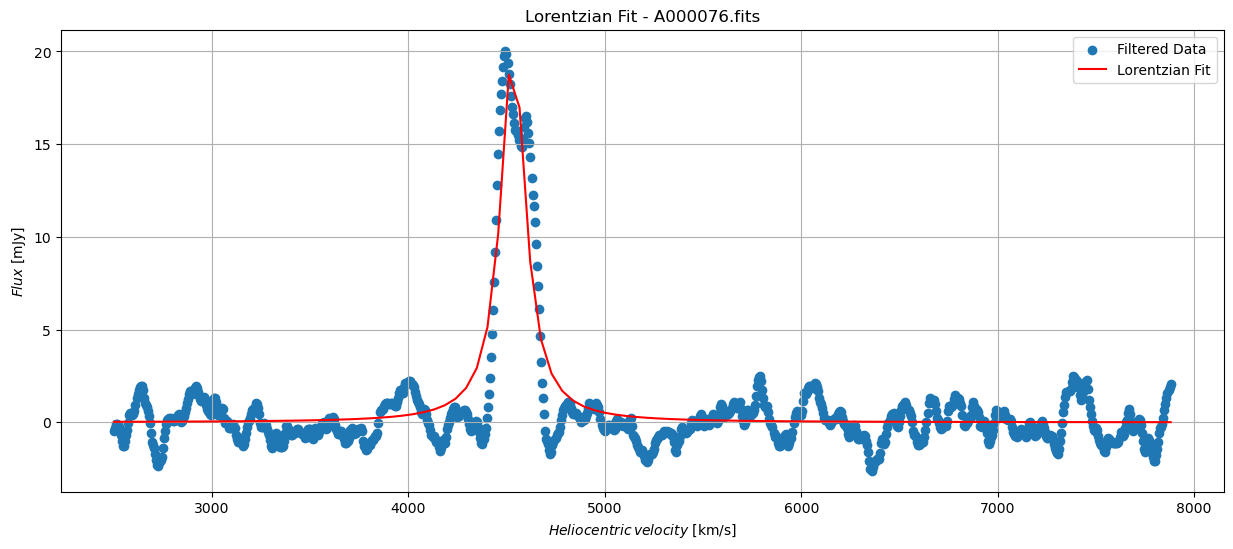

Fitted parameters:
Max peak amplitude (filtered data): 20.03816783485086 mJy
Max peak amplitude (Lorentzian fit): 18.744640340680363 mJy
Center: 4532.436778683556 km/s
Width: 151.7115076701626 km/s
Curve type: Emission
SNR (Filtered Data): 5.5887577653093
SNR (Lorentzian Fit): 7.012894056374432



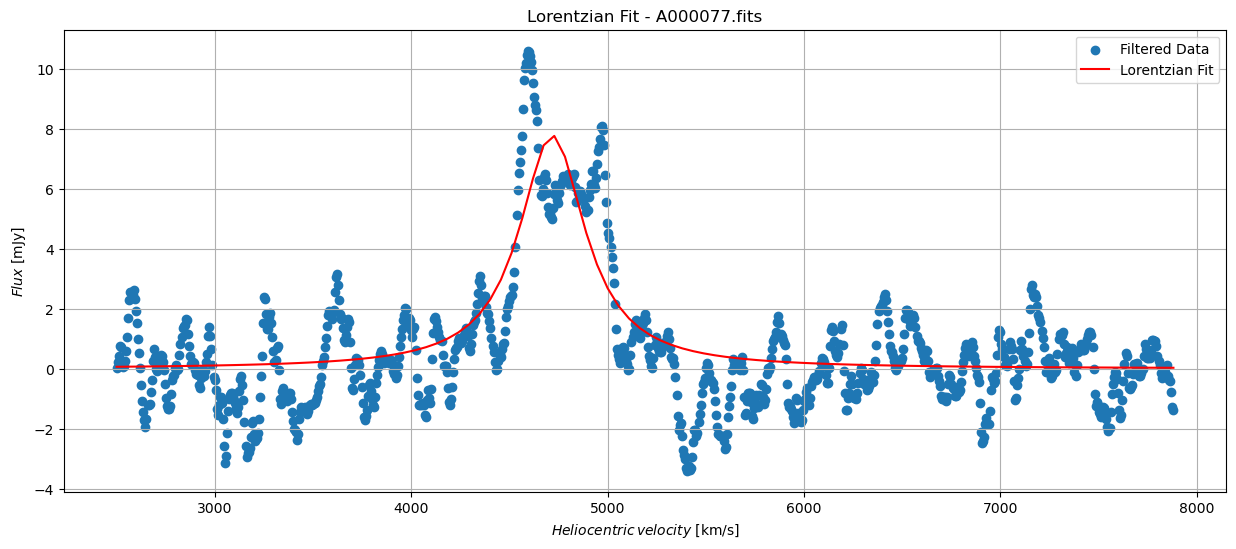

Fitted parameters:
Max peak amplitude (filtered data): 10.616854592787396 mJy
Max peak amplitude (Lorentzian fit): 7.773662035512547 mJy
Center: 4717.799108683156 km/s
Width: 409.82136187097854 km/s
Curve type: Emission
SNR (Filtered Data): 4.077371619611938
SNR (Lorentzian Fit): 4.614549221484276



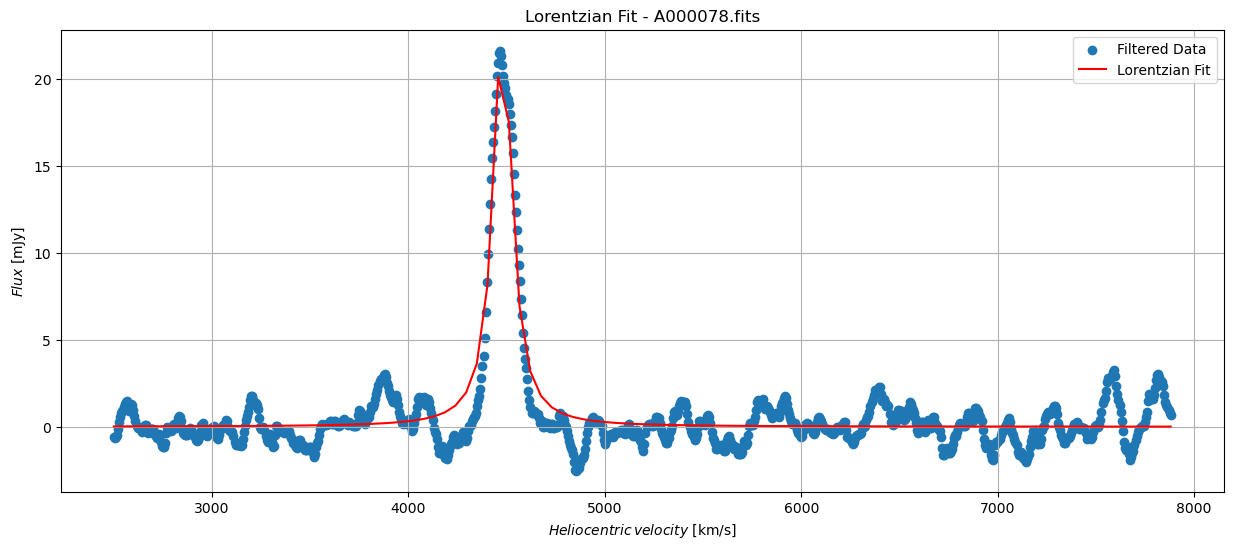

Fitted parameters:
Max peak amplitude (filtered data): 21.597713563692718 mJy
Max peak amplitude (Lorentzian fit): 20.0954487413968 mJy
Center: 4479.086002011605 km/s
Width: 112.5717408152633 km/s
Curve type: Emission
SNR (Filtered Data): 3.965508046322826
SNR (Lorentzian Fit): 8.045457191986664



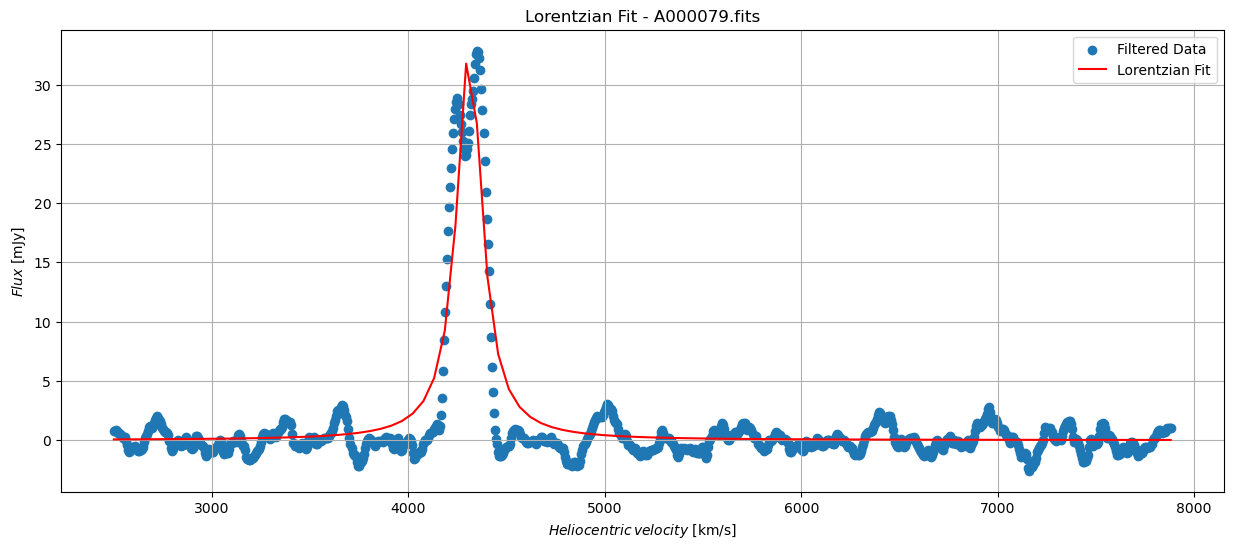

Fitted parameters:
Max peak amplitude (filtered data): 32.85199921676947 mJy
Max peak amplitude (Lorentzian fit): 31.767097580563647 mJy
Center: 4310.140880010184 km/s
Width: 155.26042303387214 km/s
Curve type: Emission
SNR (Filtered Data): 5.804237276827248
SNR (Lorentzian Fit): 6.932196327119295



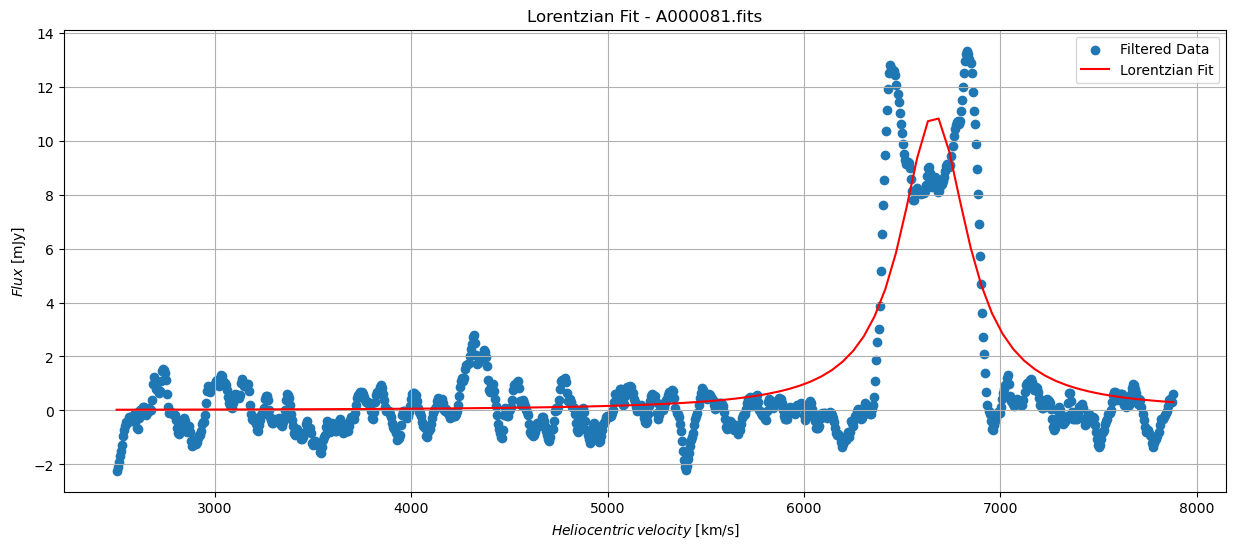

Fitted parameters:
Max peak amplitude (filtered data): 13.329783840257539 mJy
Max peak amplitude (Lorentzian fit): 10.816310633615164 mJy
Center: 6661.58173576784 km/s
Width: 413.29676622629603 km/s
Curve type: Emission
SNR (Filtered Data): 4.368653457507932
SNR (Lorentzian Fit): 4.598993967694528



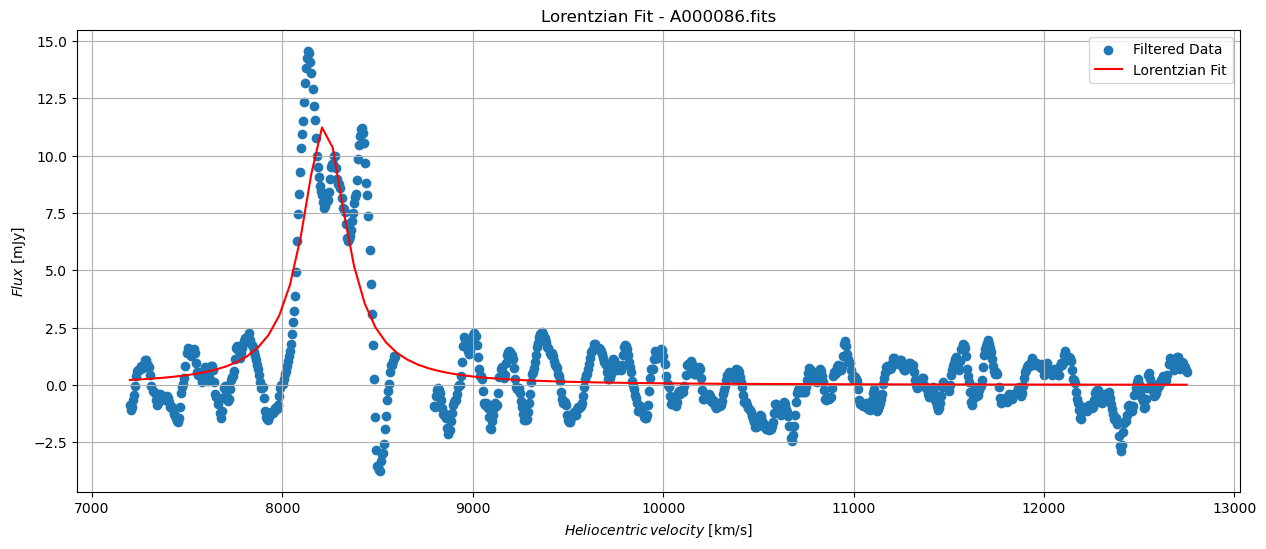

Fitted parameters:
Max peak amplitude (filtered data): 14.578054729997692 mJy
Max peak amplitude (Lorentzian fit): 11.230888868450238 mJy
Center: 8220.04504887806 km/s
Width: 286.54728416767824 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 5.253029777210358



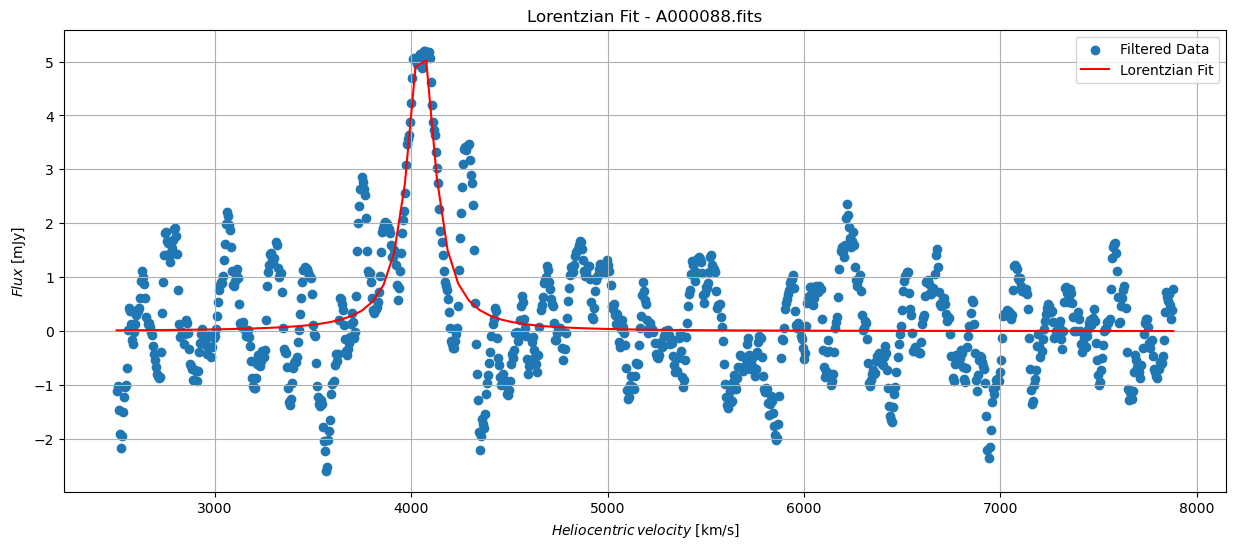

Fitted parameters:
Max peak amplitude (filtered data): 5.199935431455956 mJy
Max peak amplitude (Lorentzian fit): 5.01843458231617 mJy
Center: 4050.8620083440446 km/s
Width: 164.74180385741636 km/s
Curve type: Emission
SNR (Filtered Data): 3.5413966656488305
SNR (Lorentzian Fit): 6.74136840834161



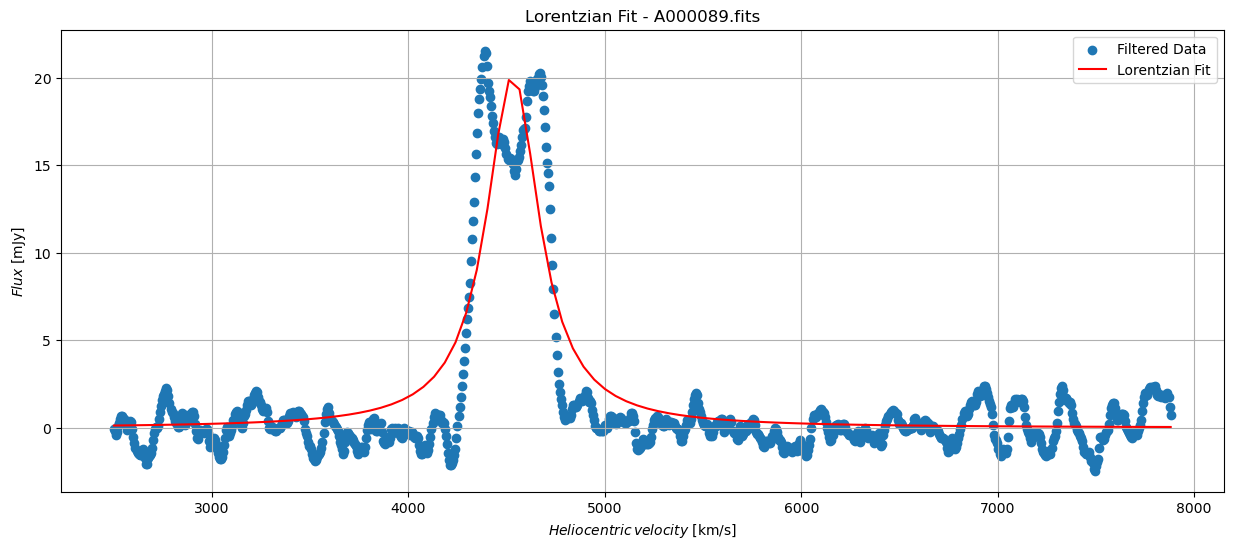

Fitted parameters:
Max peak amplitude (filtered data): 21.54771607570772 mJy
Max peak amplitude (Lorentzian fit): 19.87445680696965 mJy
Center: 4531.349689691036 km/s
Width: 329.76802790710065 km/s
Curve type: Emission
SNR (Filtered Data): 4.438025680846607
SNR (Lorentzian Fit): 5.017705993994725



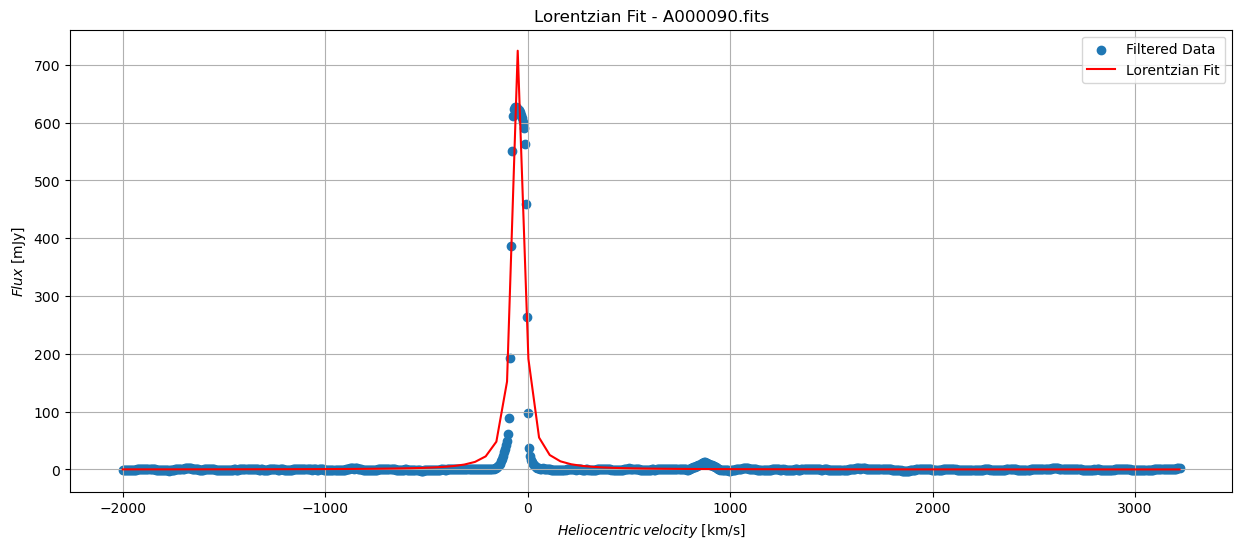

Fitted parameters:
Max peak amplitude (filtered data): 627.251906685161 mJy
Max peak amplitude (Lorentzian fit): 724.2908514289177 mJy
Center: -45.35736848654357 km/s
Width: 57.747468957916304 km/s
Curve type: Emission
SNR (Filtered Data): 4.462597525944547
SNR (Lorentzian Fit): 10.899064481905128



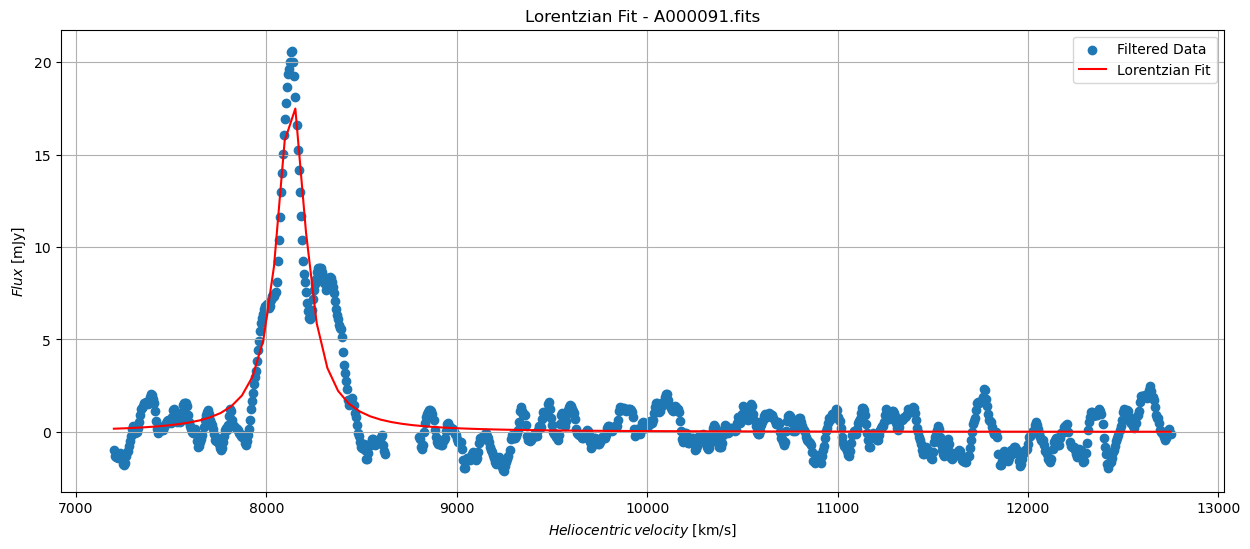

Fitted parameters:
Max peak amplitude (filtered data): 20.61958454270698 mJy
Max peak amplitude (Lorentzian fit): 17.491784528037474 mJy
Center: 8131.987153558774 km/s
Width: 181.13603182812076 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 6.43206666972309



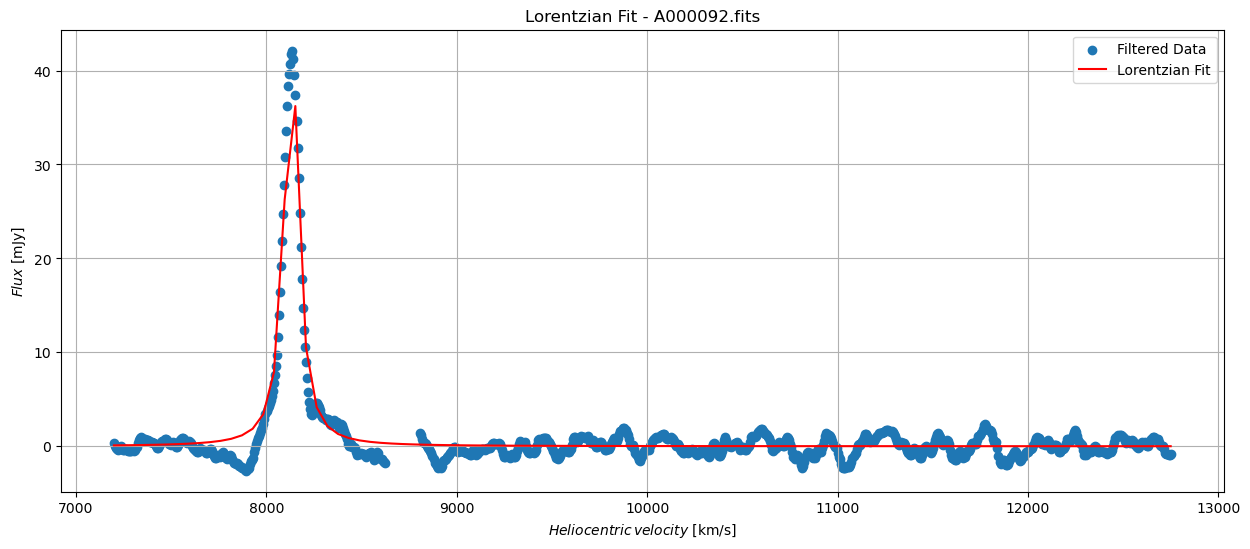

Fitted parameters:
Max peak amplitude (filtered data): 42.11017690011995 mJy
Max peak amplitude (Lorentzian fit): 36.21928500937677 mJy
Center: 8131.016887999997 km/s
Width: 84.90937520164468 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 9.14498446814159



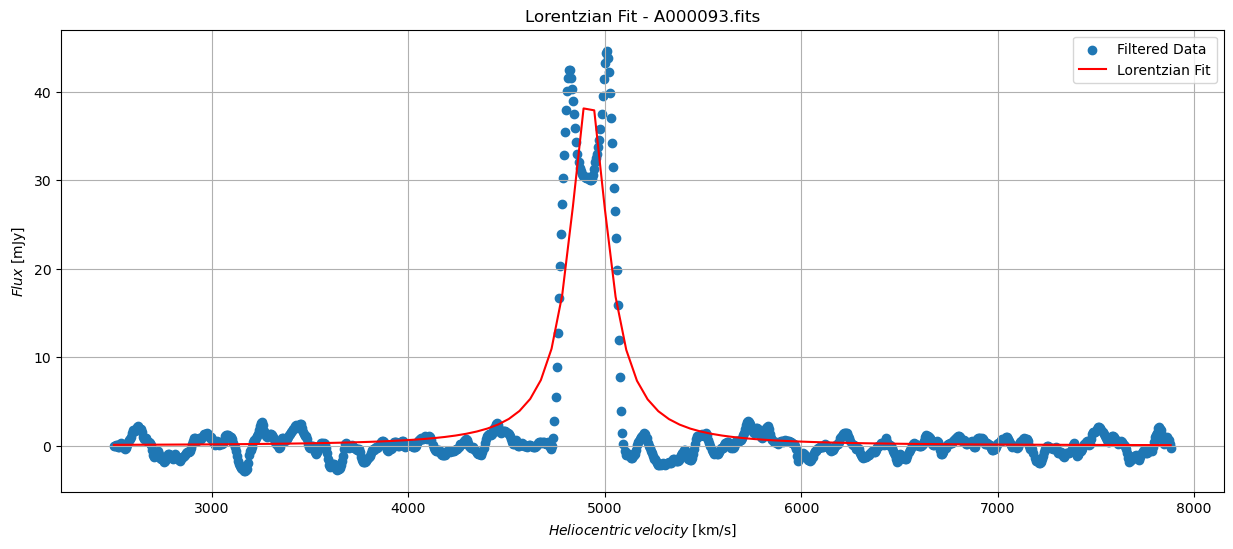

Fitted parameters:
Max peak amplitude (filtered data): 44.63544569206091 mJy
Max peak amplitude (Lorentzian fit): 38.11389126063913 mJy
Center: 4918.065394968266 km/s
Width: 232.2644195701633 km/s
Curve type: Emission
SNR (Filtered Data): 5.4295202853131785
SNR (Lorentzian Fit): 5.814382358848132



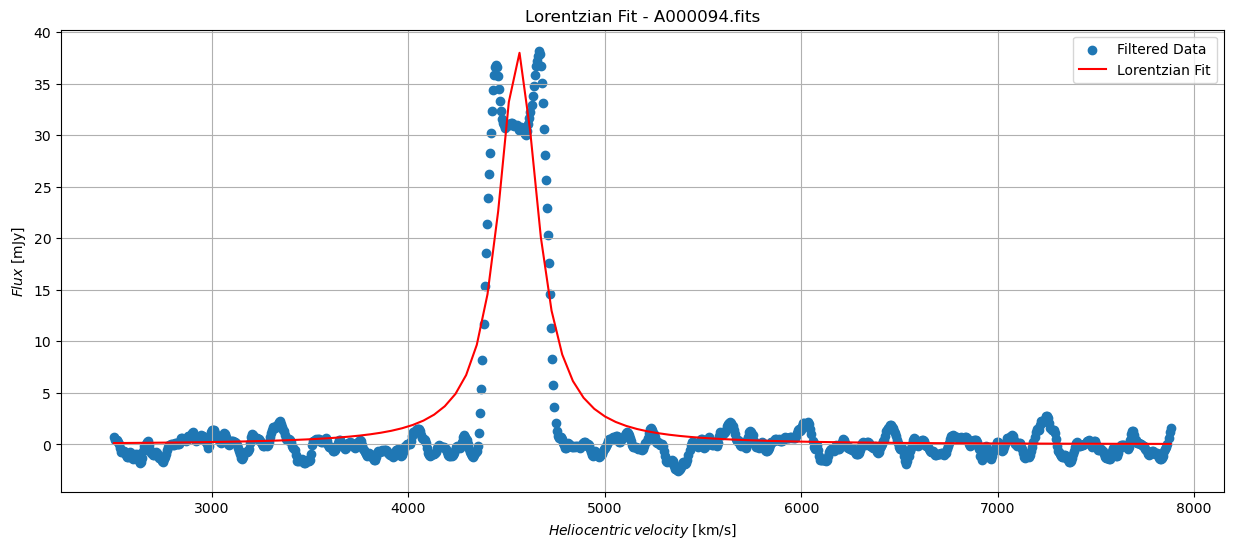

Fitted parameters:
Max peak amplitude (filtered data): 38.19542018930926 mJy
Max peak amplitude (Lorentzian fit): 37.99449363405771 mJy
Center: 4558.217476618268 km/s
Width: 244.82401383882438 km/s
Curve type: Emission
SNR (Filtered Data): 4.8817331433510684
SNR (Lorentzian Fit): 5.677898958904358



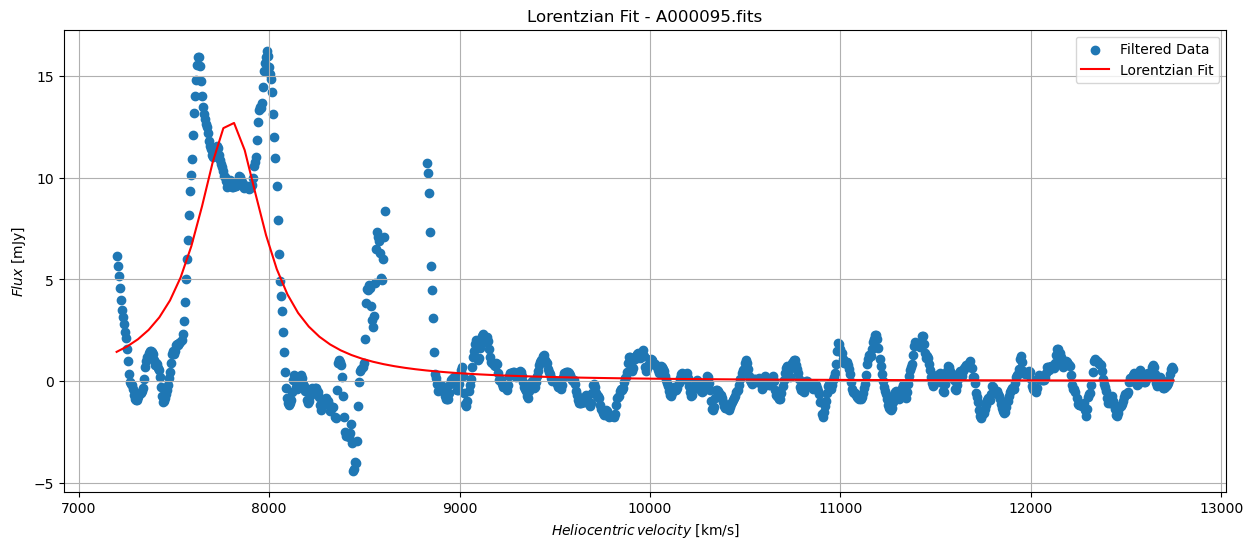

Fitted parameters:
Max peak amplitude (filtered data): 16.260016462167663 mJy
Max peak amplitude (Lorentzian fit): 12.704050059346434 mJy
Center: 7795.383294292098 km/s
Width: 424.1208434687933 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 4.438610238825056



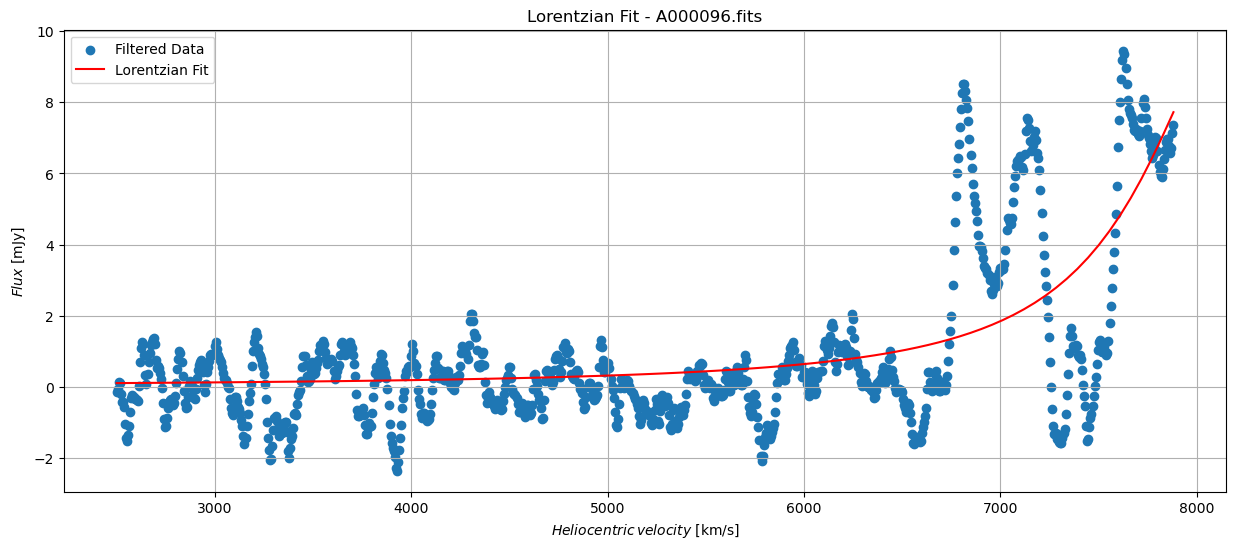

Fitted parameters:
Max peak amplitude (filtered data): 9.4514337726307 mJy
Max peak amplitude (Lorentzian fit): 7.723263507692307 mJy
Center: 8227.49789486934 km/s
Width: 1121.8965466587772 km/s
Curve type: Emission
SNR (Filtered Data): 3.8764916288675475
SNR (Lorentzian Fit): 5.06343668700562



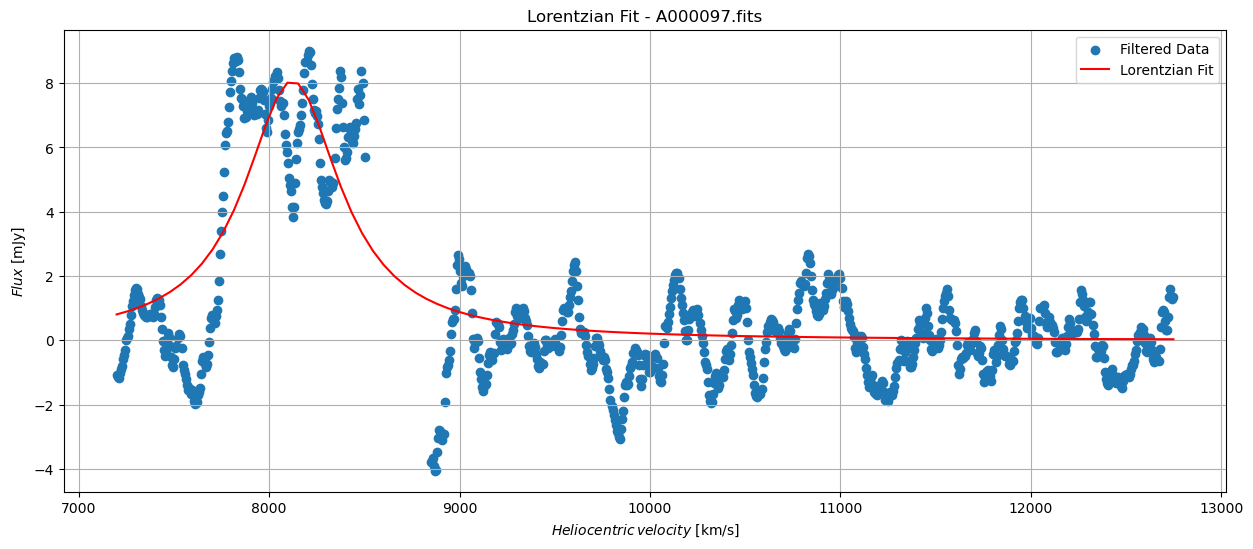

Fitted parameters:
Max peak amplitude (filtered data): 9.00977894937297 mJy
Max peak amplitude (Lorentzian fit): 8.015292528119586 mJy
Center: 8121.016100911264 km/s
Width: 615.0084826445947 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 3.865591886942568



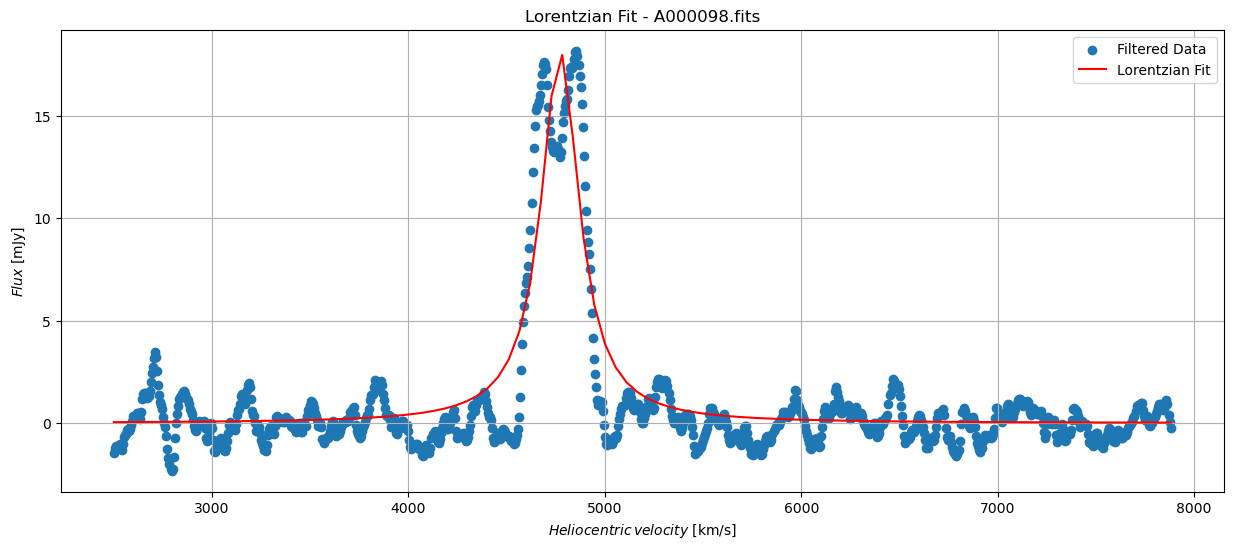

Fitted parameters:
Max peak amplitude (filtered data): 18.184743505157606 mJy
Max peak amplitude (Lorentzian fit): 17.979248496128815 mJy
Center: 4772.248062412623 km/s
Width: 237.94974146650006 km/s
Curve type: Emission
SNR (Filtered Data): 4.95966926833681
SNR (Lorentzian Fit): 5.750130842662696



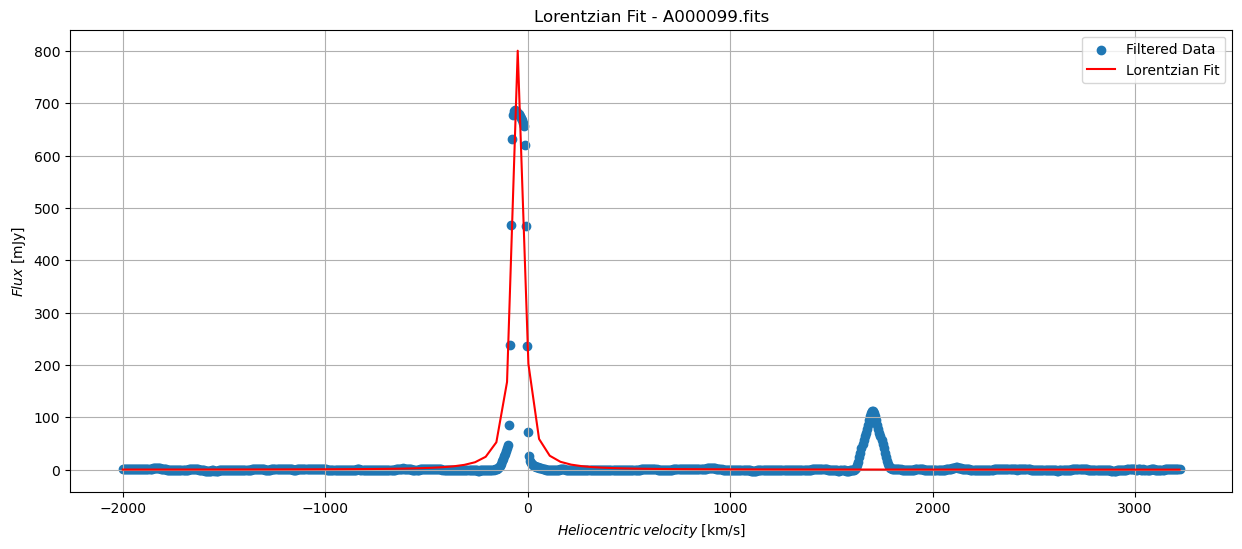

Fitted parameters:
Max peak amplitude (filtered data): 686.7721683107475 mJy
Max peak amplitude (Lorentzian fit): 800.5300521709896 mJy
Center: -46.07620375977254 km/s
Width: 57.116526193738785 km/s
Curve type: Emission
SNR (Filtered Data): 5.03207583537131
SNR (Lorentzian Fit): 10.947664563123428



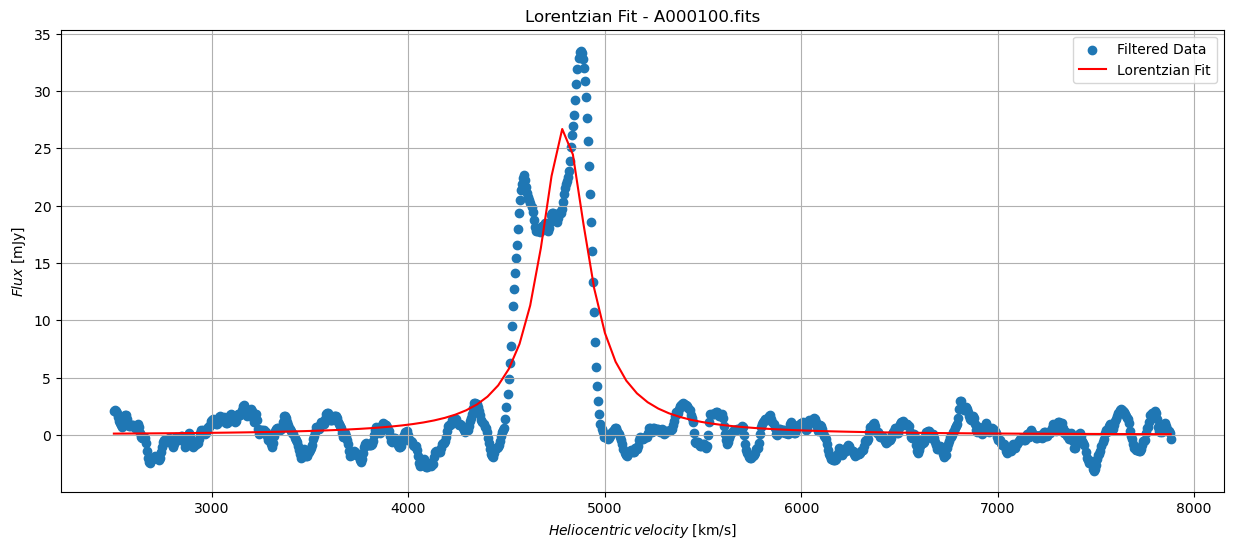

Fitted parameters:
Max peak amplitude (filtered data): 33.51180915659914 mJy
Max peak amplitude (Lorentzian fit): 26.682025981599086 mJy
Center: 4791.985333725719 km/s
Width: 293.72840436031555 km/s
Curve type: Emission
SNR (Filtered Data): 4.652275240873129
SNR (Lorentzian Fit): 5.2646522105295555



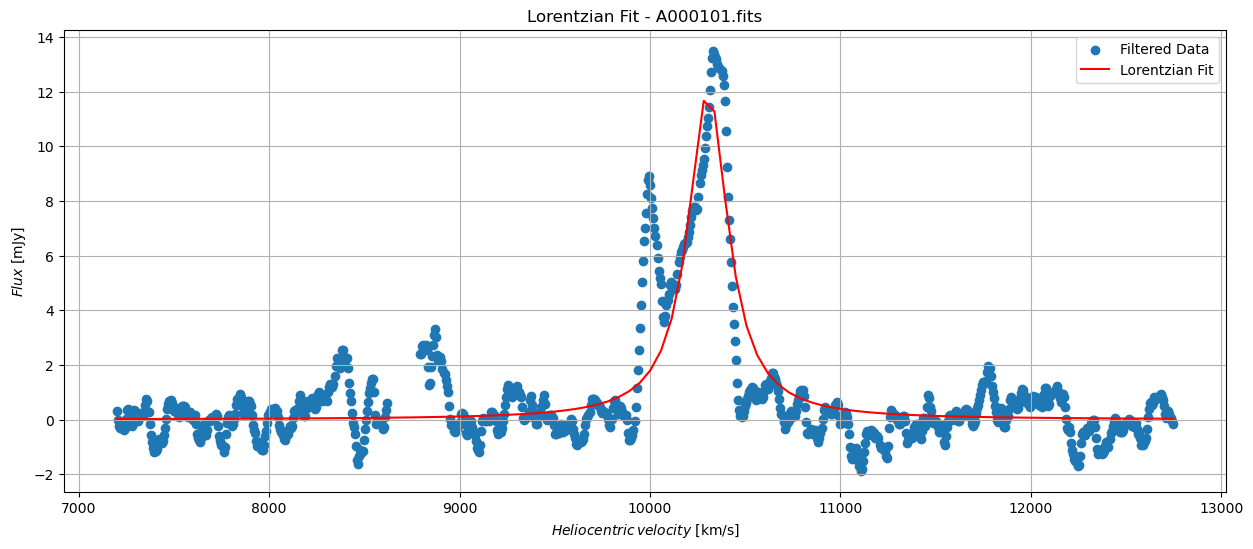

Fitted parameters:
Max peak amplitude (filtered data): 13.498226902181106 mJy
Max peak amplitude (Lorentzian fit): 11.664257116125636 mJy
Center: 10304.920658806488 km/s
Width: 254.57881653714003 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 5.601074180112395



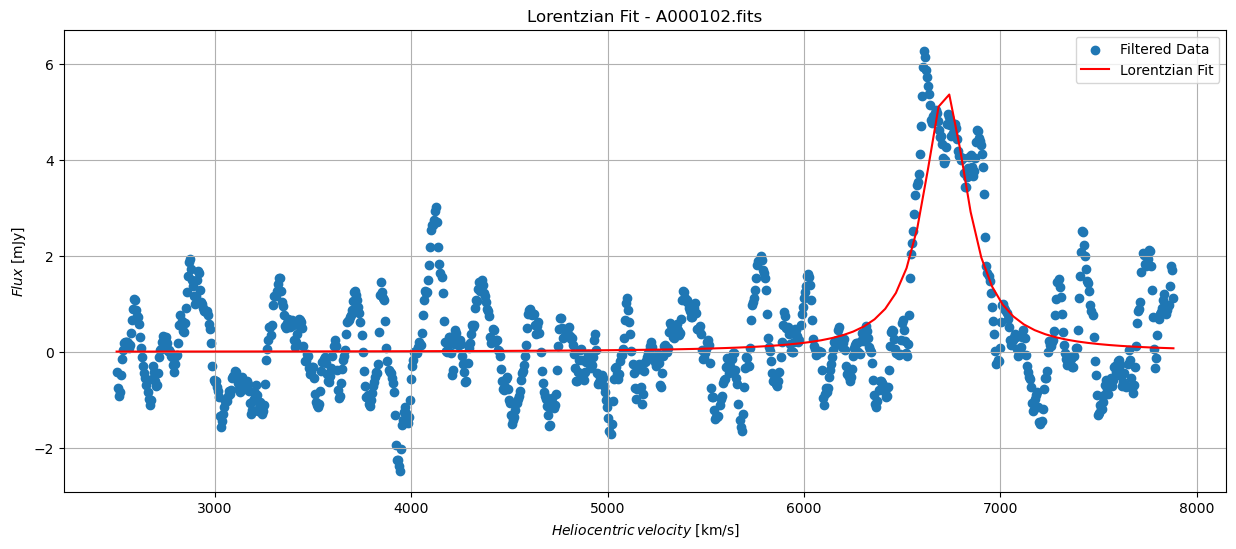

Fitted parameters:
Max peak amplitude (filtered data): 6.272284806487837 mJy
Max peak amplitude (Lorentzian fit): 5.359952333849057 mJy
Center: 6720.853754706176 km/s
Width: 272.4870948718526 km/s
Curve type: Emission
SNR (Filtered Data): 4.054178275592091
SNR (Lorentzian Fit): 5.445168212624639



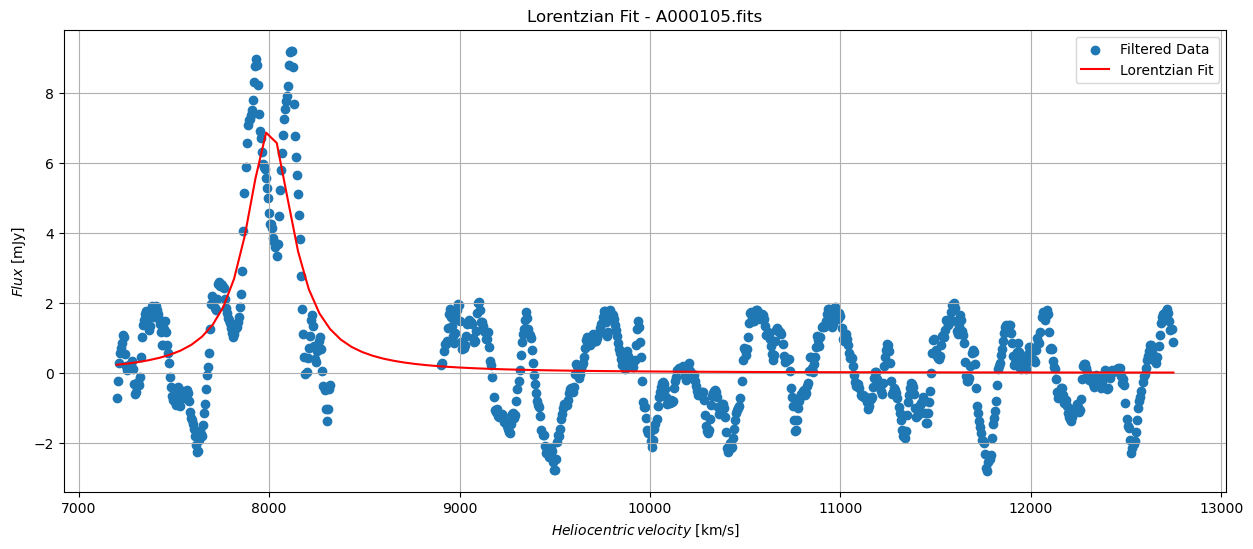

Fitted parameters:
Max peak amplitude (filtered data): 9.206745368100634 mJy
Max peak amplitude (Lorentzian fit): 6.863449246165989 mJy
Center: 8002.486603329687 km/s
Width: 296.21852849396885 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 4.989415513617722



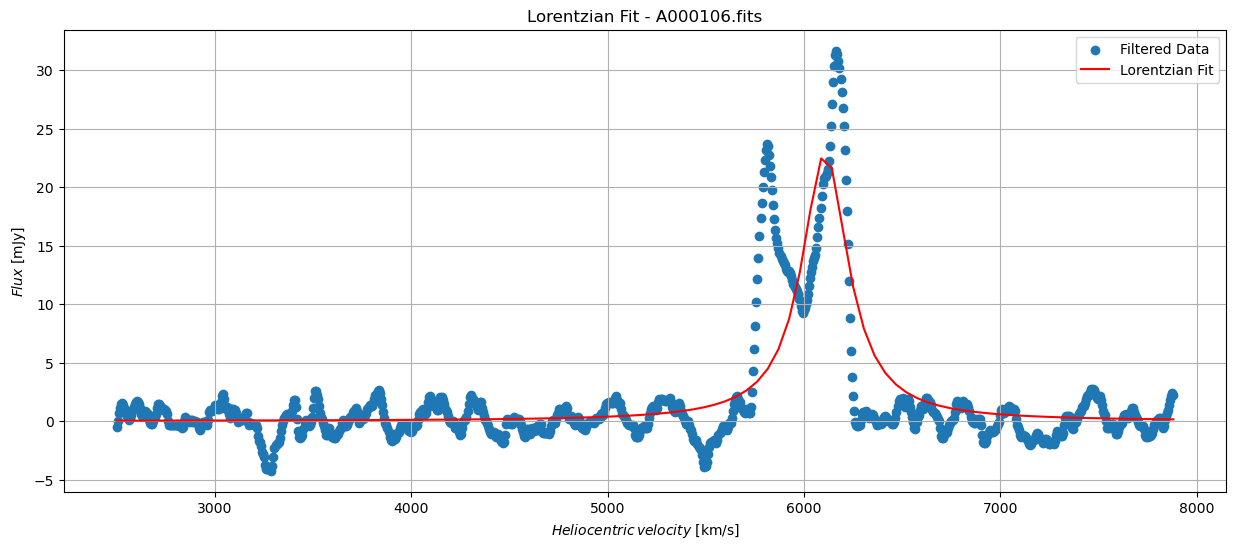

Fitted parameters:
Max peak amplitude (filtered data): 31.68210017996369 mJy
Max peak amplitude (Lorentzian fit): 22.47029527452925 mJy
Center: 6106.96819476105 km/s
Width: 287.3653501286366 km/s
Curve type: Emission
SNR (Filtered Data): 5.104417219419113
SNR (Lorentzian Fit): 5.327413395115192



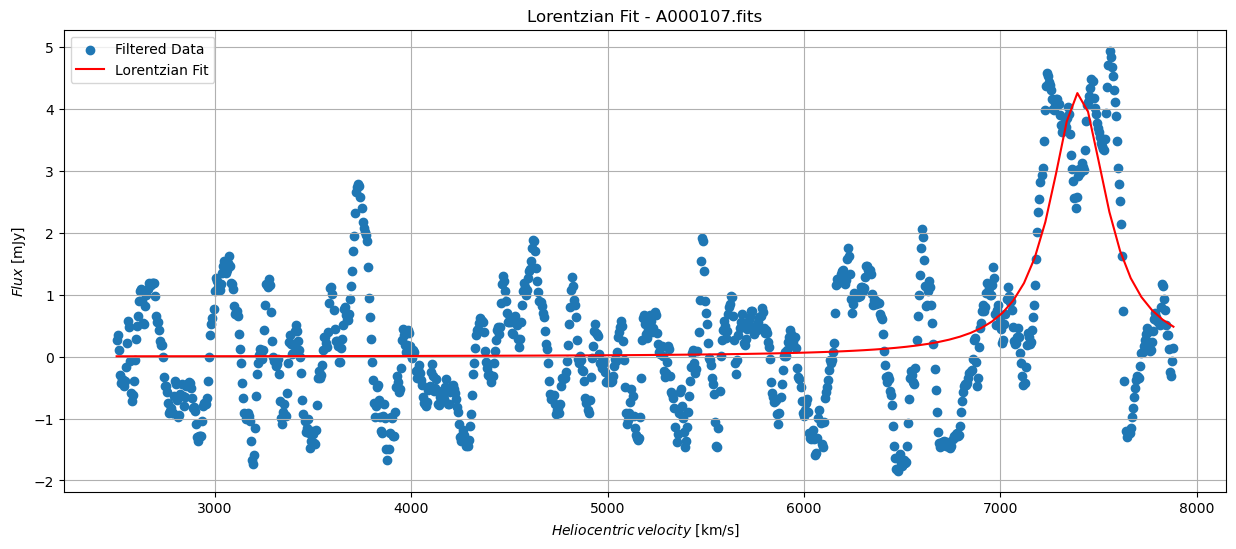

Fitted parameters:
Max peak amplitude (filtered data): 4.939869976374236 mJy
Max peak amplitude (Lorentzian fit): 4.255864286841466 mJy
Center: 7397.831138169424 km/s
Width: 345.44642250557473 km/s
Curve type: Emission
SNR (Filtered Data): 3.6535067700924144
SNR (Lorentzian Fit): 4.903357127404801



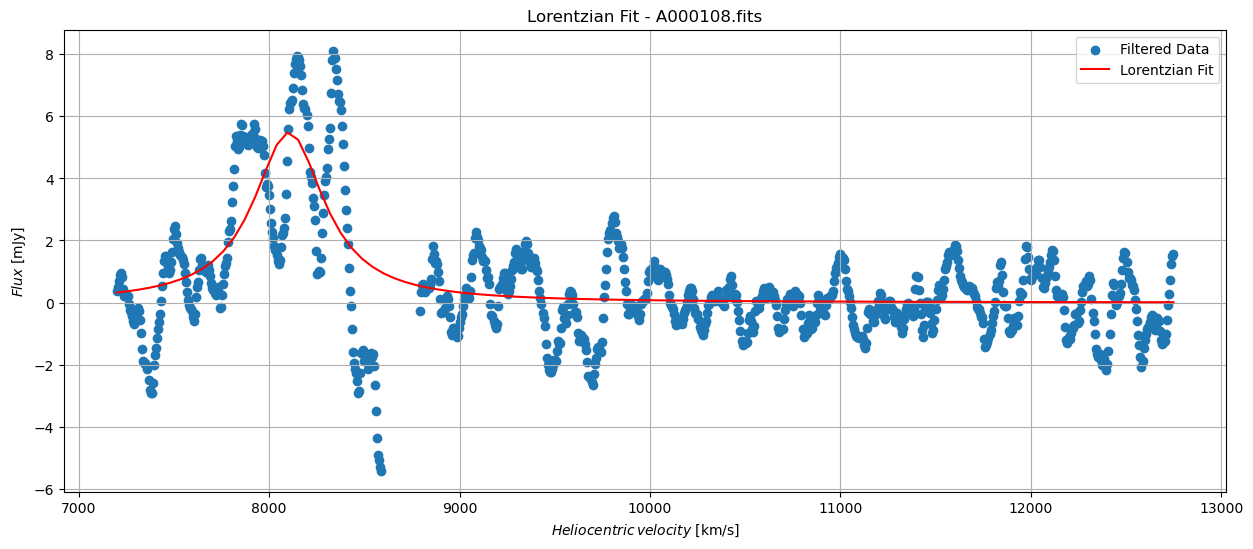

Fitted parameters:
Max peak amplitude (filtered data): 8.111239158786217 mJy
Max peak amplitude (Lorentzian fit): 5.477711070705268 mJy
Center: 8103.297452255764 km/s
Width: 452.7983227378278 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 4.358015181208079



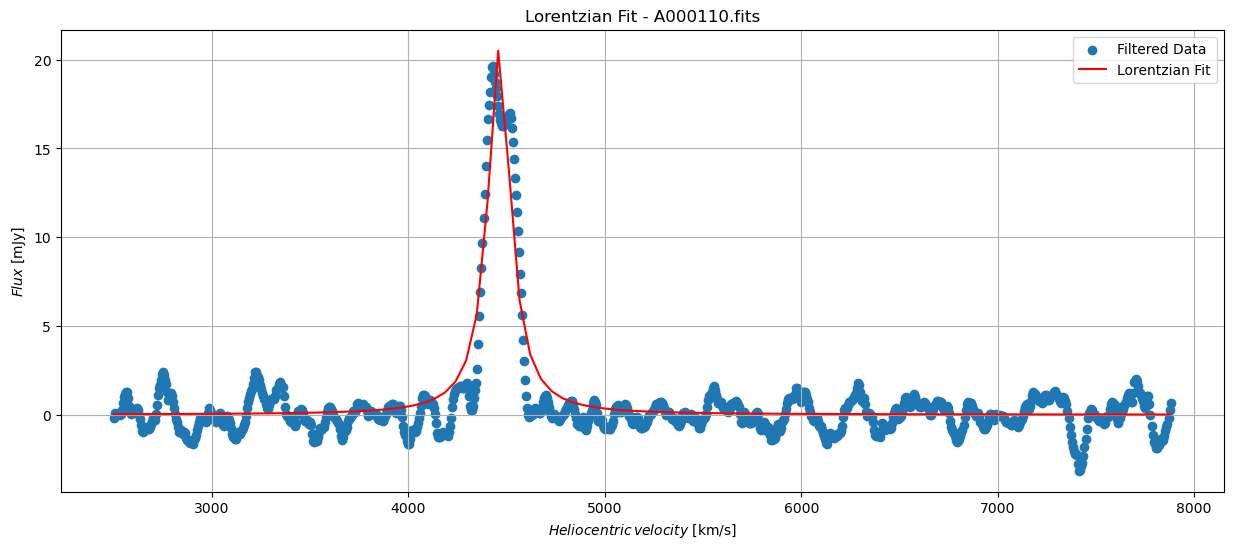

Fitted parameters:
Max peak amplitude (filtered data): 19.624078441984373 mJy
Max peak amplitude (Lorentzian fit): 20.503437154676927 mJy
Center: 4461.930594920908 km/s
Width: 140.04137310402106 km/s
Curve type: Emission
SNR (Filtered Data): 3.534068644120954
SNR (Lorentzian Fit): 7.275076658935012



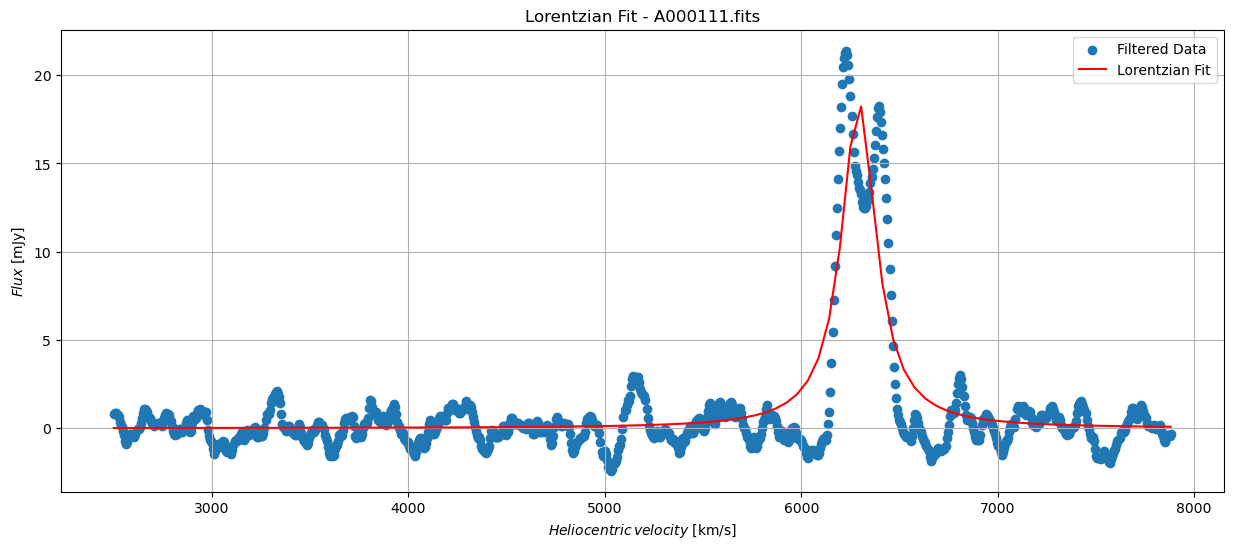

Fitted parameters:
Max peak amplitude (filtered data): 21.382560013056967 mJy
Max peak amplitude (Lorentzian fit): 18.232806650757226 mJy
Center: 6292.721517245449 km/s
Width: 214.74860609340547 km/s
Curve type: Emission
SNR (Filtered Data): 5.4460382123469
SNR (Lorentzian Fit): 6.035375445425996



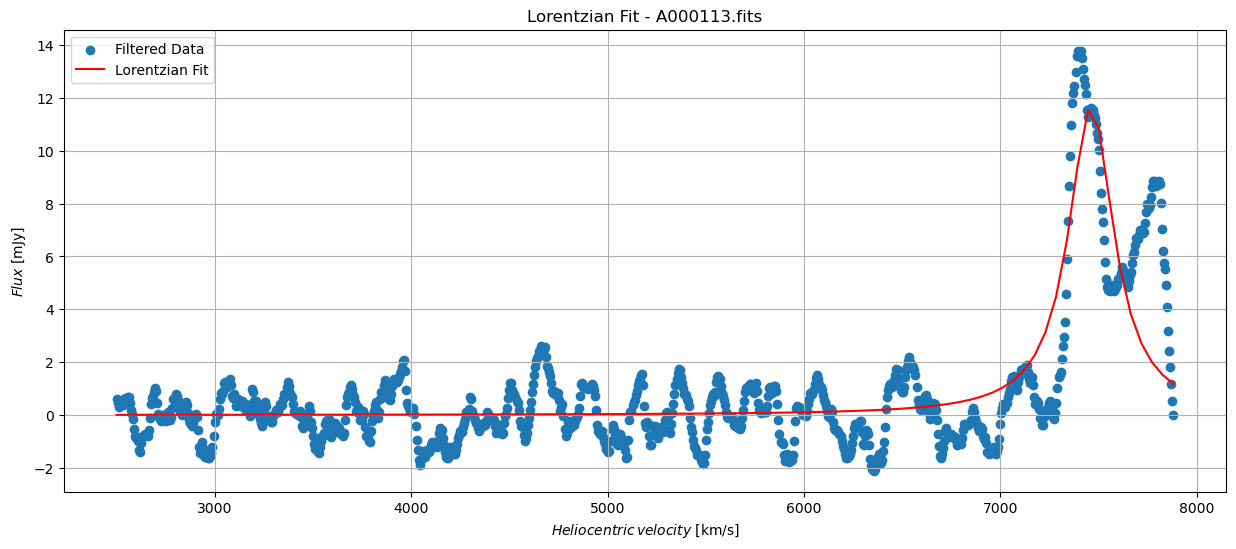

Fitted parameters:
Max peak amplitude (filtered data): 13.778902166975854 mJy
Max peak amplitude (Lorentzian fit): 11.53788165983064 mJy
Center: 7461.702981788568 km/s
Width: 281.53004602243226 km/s
Curve type: Emission
SNR (Filtered Data): 4.228348874391508
SNR (Lorentzian Fit): 5.344905178468165



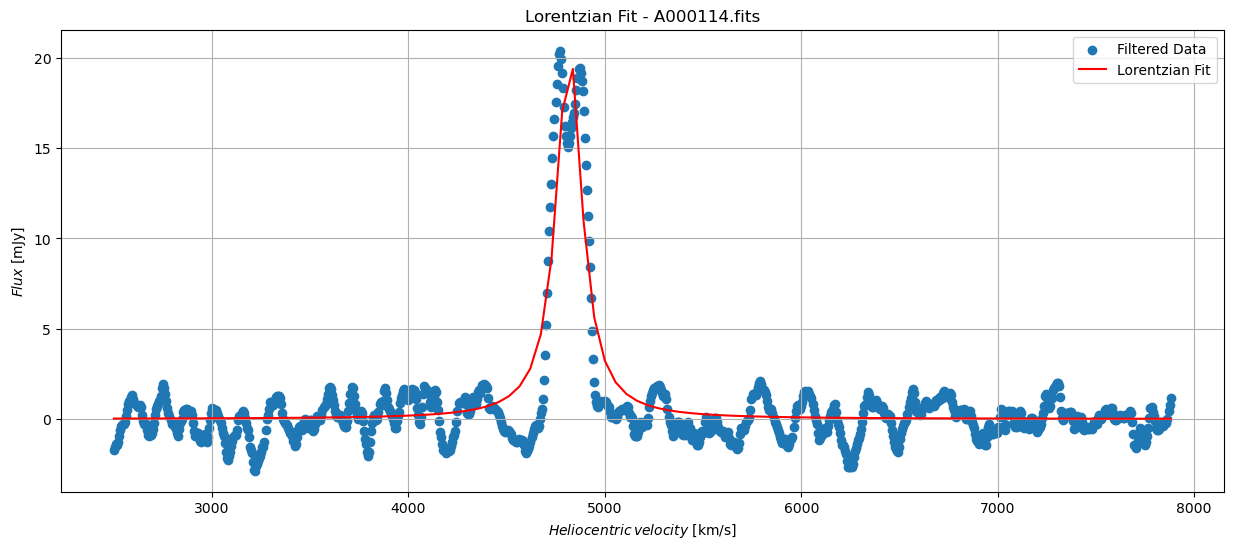

Fitted parameters:
Max peak amplitude (filtered data): 20.394593928843484 mJy
Max peak amplitude (Lorentzian fit): 19.385459470583374 mJy
Center: 4818.295838868396 km/s
Width: 156.95027161005137 km/s
Curve type: Emission
SNR (Filtered Data): 5.87895306441615
SNR (Lorentzian Fit): 6.914461037022446



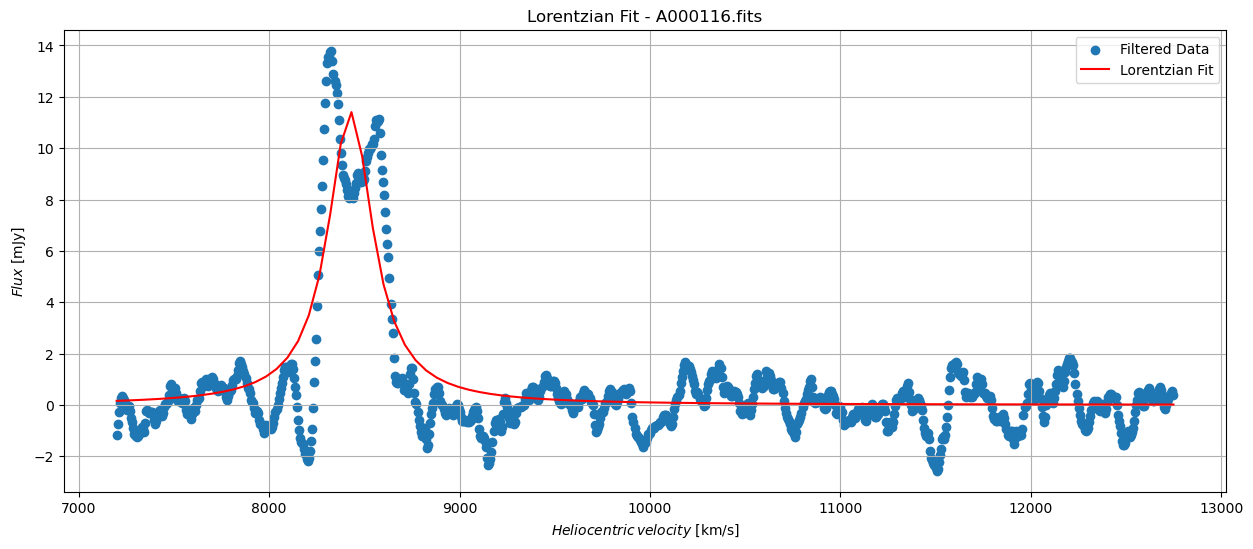

Fitted parameters:
Max peak amplitude (filtered data): 13.795772933681643 mJy
Max peak amplitude (Lorentzian fit): 11.405072883781846 mJy
Center: 8426.581162217899 km/s
Width: 290.1180813060538 km/s
Curve type: Emission
SNR (Filtered Data): 4.74615157744109
SNR (Lorentzian Fit): 5.32951721042487



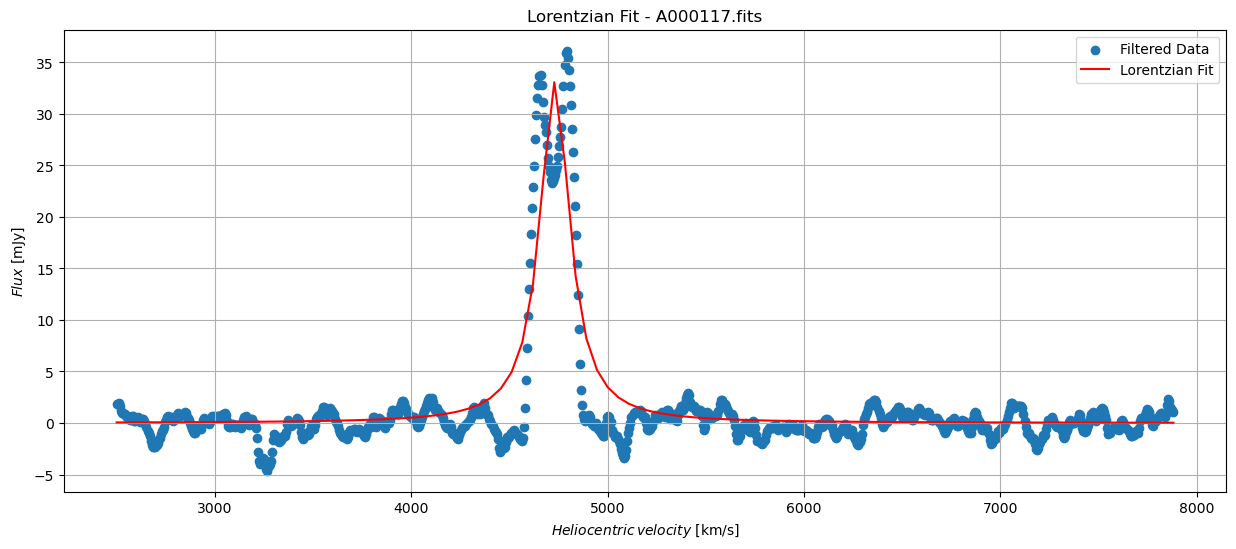

Fitted parameters:
Max peak amplitude (filtered data): 36.13401639038631 mJy
Max peak amplitude (Lorentzian fit): 33.07493238182122 mJy
Center: 4731.293058591167 km/s
Width: 184.25643445350775 km/s
Curve type: Emission
SNR (Filtered Data): 5.862356658852907
SNR (Lorentzian Fit): 6.42998552340623



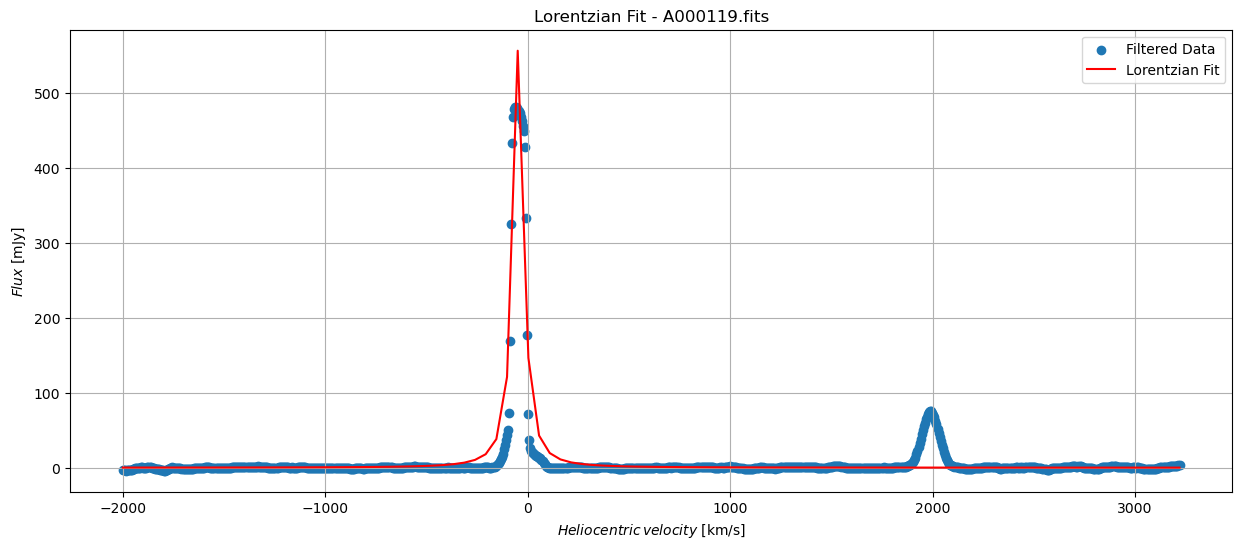

Fitted parameters:
Max peak amplitude (filtered data): 481.48843717781847 mJy
Max peak amplitude (Lorentzian fit): 556.8797316130637 mJy
Center: -46.002090463980785 km/s
Width: 58.61682899771109 km/s
Curve type: Emission
SNR (Filtered Data): 5.016705858493713
SNR (Lorentzian Fit): 10.813548792401596



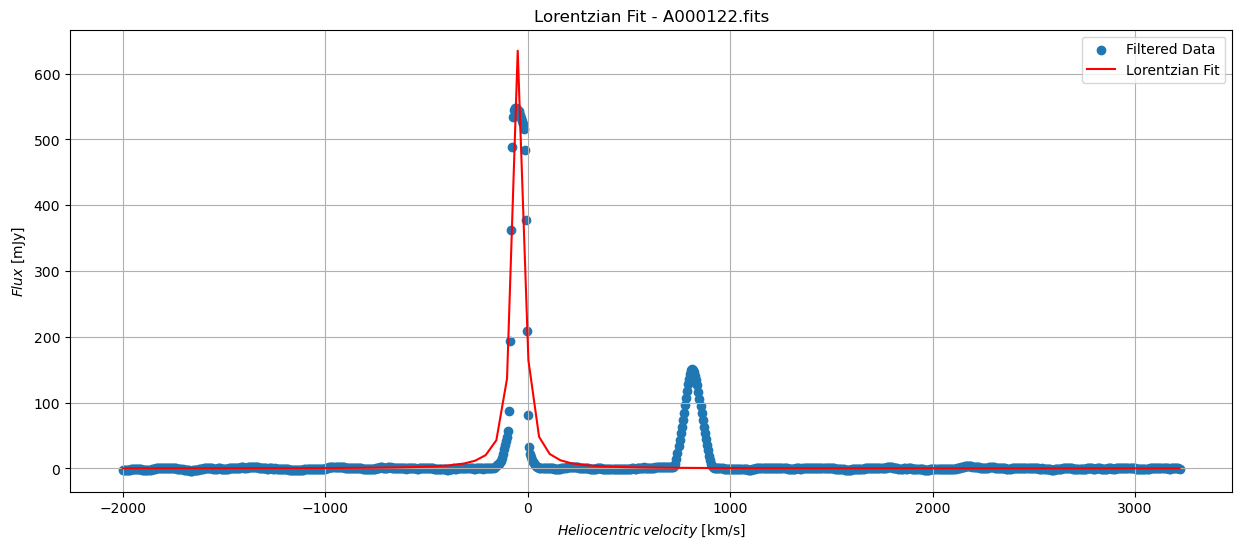

Fitted parameters:
Max peak amplitude (filtered data): 547.7838568410009 mJy
Max peak amplitude (Lorentzian fit): 634.9353691785591 mJy
Center: -46.0762720325731 km/s
Width: 58.09480855406472 km/s
Curve type: Emission
SNR (Filtered Data): 5.411631452769691
SNR (Lorentzian Fit): 10.858631616863864



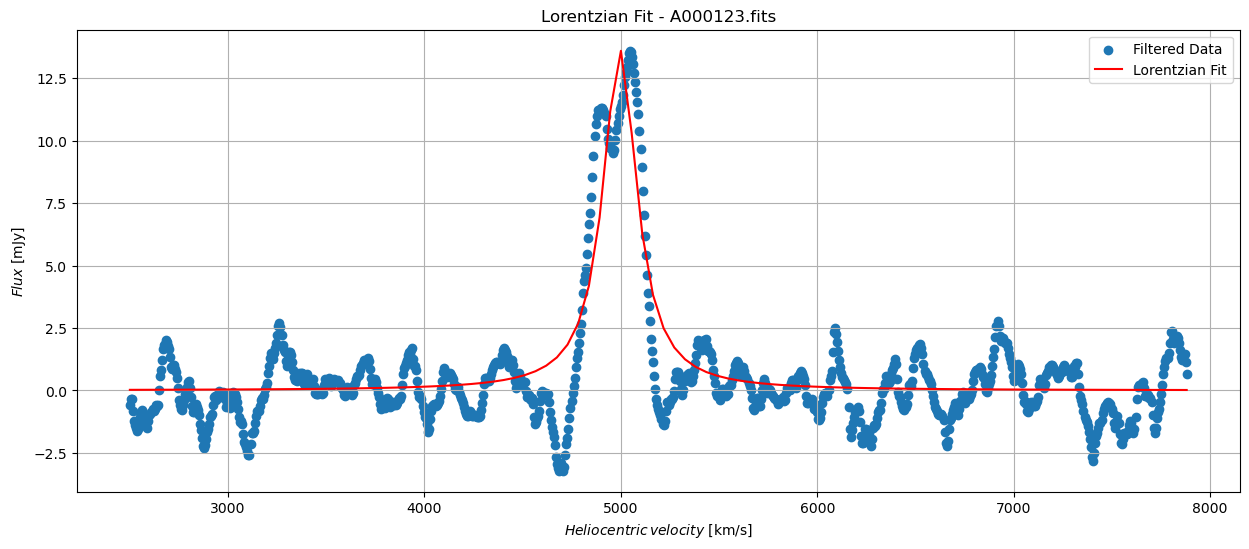

Fitted parameters:
Max peak amplitude (filtered data): 13.600381647518084 mJy
Max peak amplitude (Lorentzian fit): 13.595940582554684 mJy
Center: 4995.247967550333 km/s
Width: 210.3026933493299 km/s
Curve type: Emission
SNR (Filtered Data): 4.62295381553353
SNR (Lorentzian Fit): 6.070951520682174



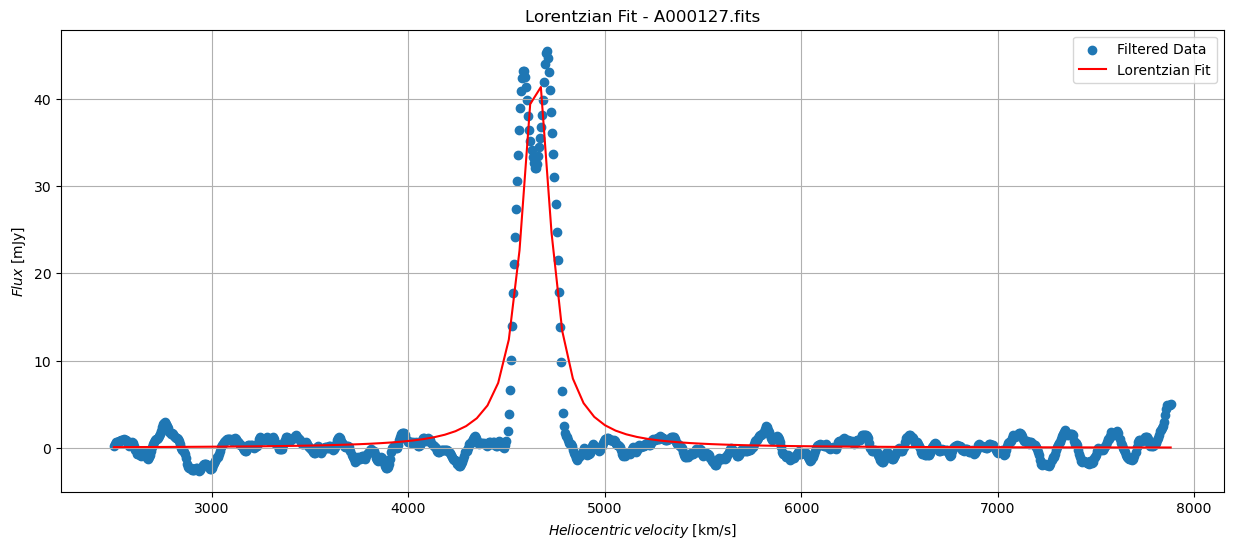

Fitted parameters:
Max peak amplitude (filtered data): 45.536946367524365 mJy
Max peak amplitude (Lorentzian fit): 41.36799819178152 mJy
Center: 4650.7696483836535 km/s
Width: 173.93868755513975 km/s
Curve type: Emission
SNR (Filtered Data): 5.9049445756355645
SNR (Lorentzian Fit): 6.592966140586639



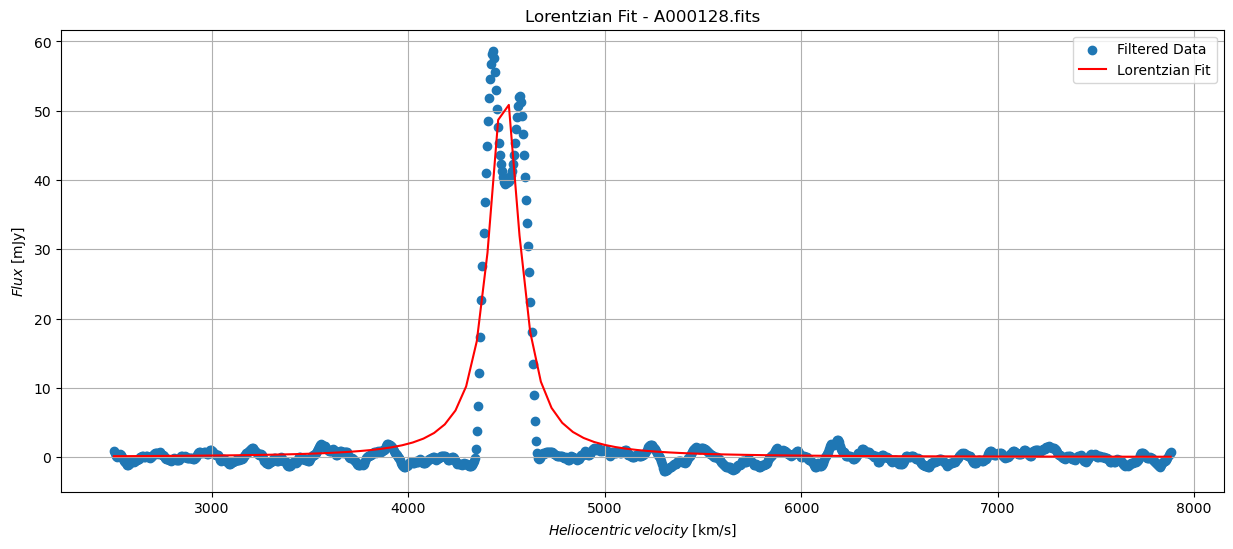

Fitted parameters:
Max peak amplitude (filtered data): 58.66691012698226 mJy
Max peak amplitude (Lorentzian fit): 50.84252829330943 mJy
Center: 4487.836289013751 km/s
Width: 187.2022739959681 km/s
Curve type: Emission
SNR (Filtered Data): 5.800011833140911
SNR (Lorentzian Fit): 6.381110168249932



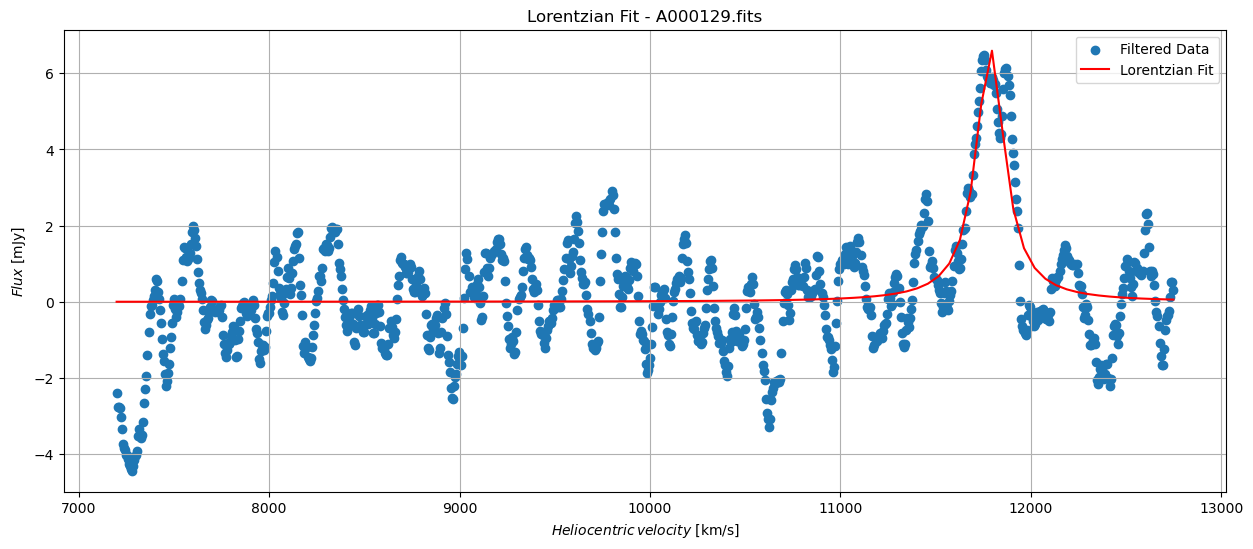

Fitted parameters:
Max peak amplitude (filtered data): 6.482539411602147 mJy
Max peak amplitude (Lorentzian fit): 6.590349796341196 mJy
Center: 11787.915367410535 km/s
Width: 182.75070177763573 km/s
Curve type: Emission
SNR (Filtered Data): 3.9199973305537155
SNR (Lorentzian Fit): 6.578481932691998



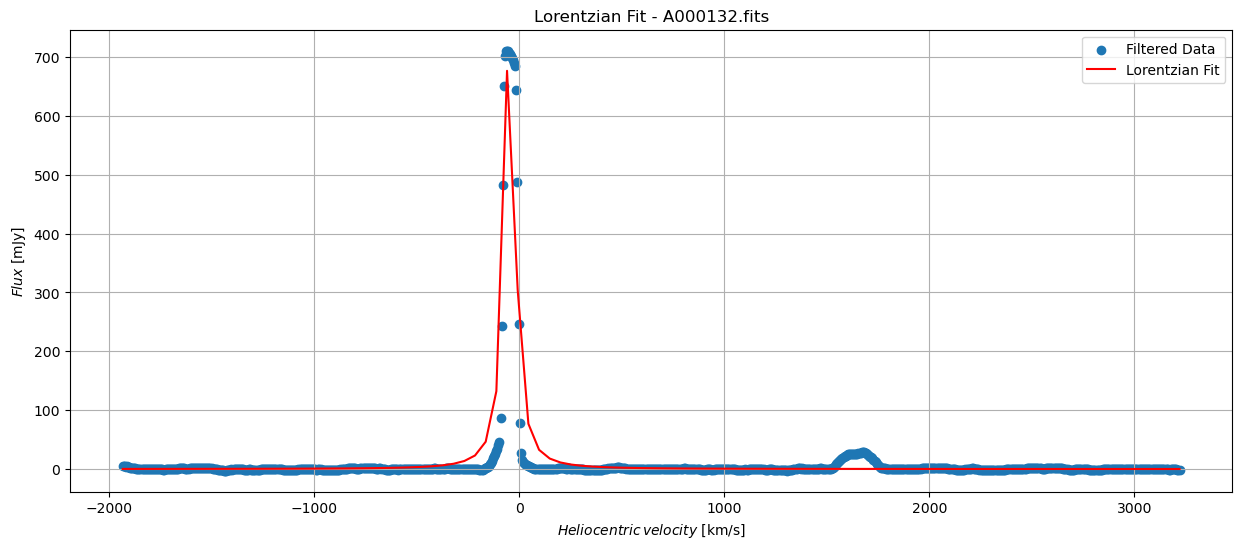

Fitted parameters:
Max peak amplitude (filtered data): 710.5455649544701 mJy
Max peak amplitude (Lorentzian fit): 676.4015375141361 mJy
Center: -45.87981246690075 km/s
Width: 57.15527009822974 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 10.879760264338433



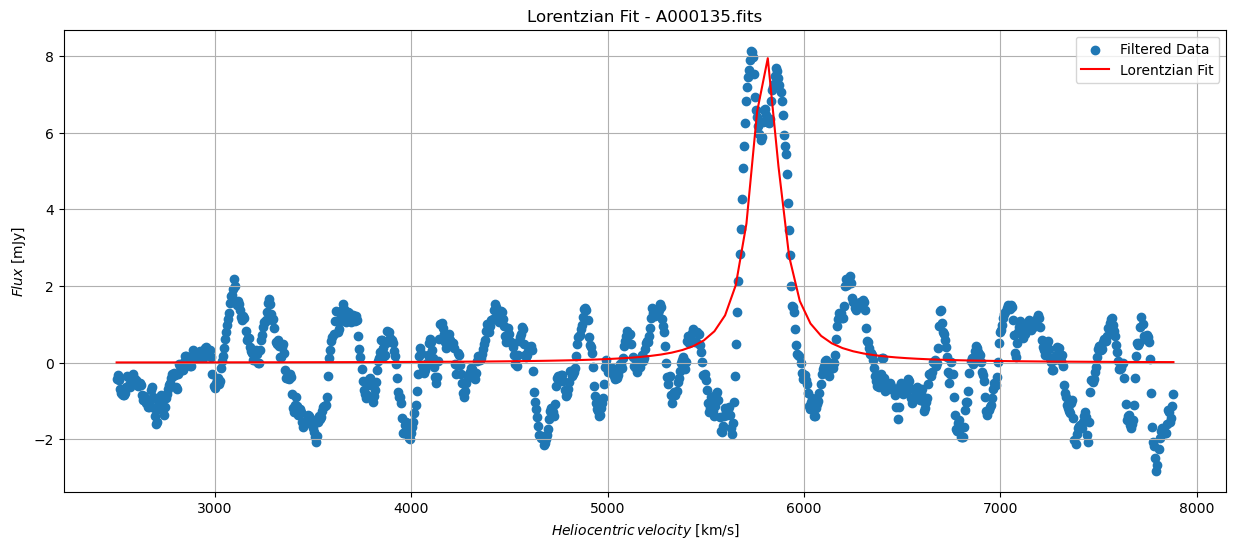

Fitted parameters:
Max peak amplitude (filtered data): 8.137425047967355 mJy
Max peak amplitude (Lorentzian fit): 7.942104903050435 mJy
Center: 5803.503456350419 km/s
Width: 174.23599184229488 km/s
Curve type: Emission
SNR (Filtered Data): 4.672605564310575
SNR (Lorentzian Fit): 6.612138605694644



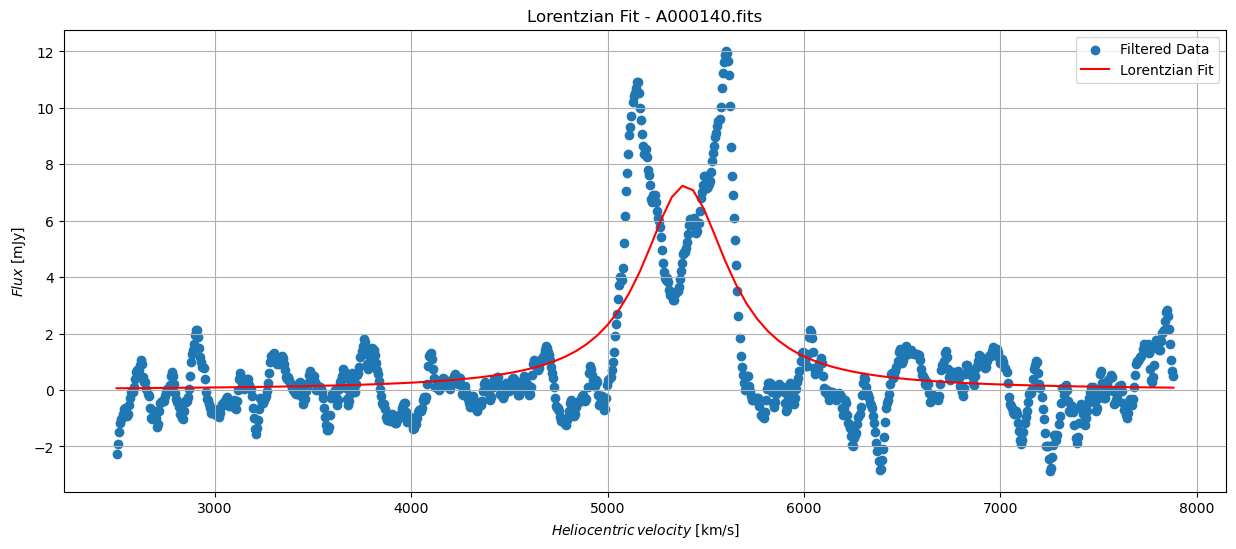

Fitted parameters:
Max peak amplitude (filtered data): 12.025719320025251 mJy
Max peak amplitude (Lorentzian fit): 7.238031832533644 mJy
Center: 5393.2424293602035 km/s
Width: 537.2700472179101 km/s
Curve type: Emission
SNR (Filtered Data): 4.620284018749698
SNR (Lorentzian Fit): 4.198340995032953



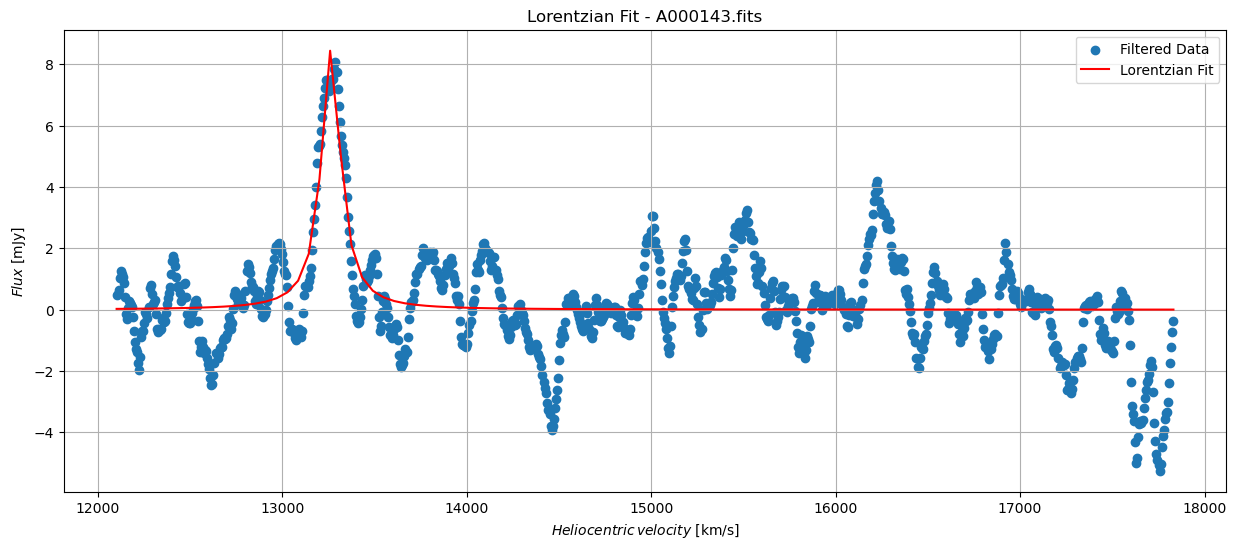

Fitted parameters:
Max peak amplitude (filtered data): 8.084200057598732 mJy
Max peak amplitude (Lorentzian fit): 8.445293393434232 mJy
Center: 13263.700157926194 km/s
Width: 126.4441622617569 km/s
Curve type: Emission
SNR (Filtered Data): 3.4735821658167194
SNR (Lorentzian Fit): 7.822915492136205



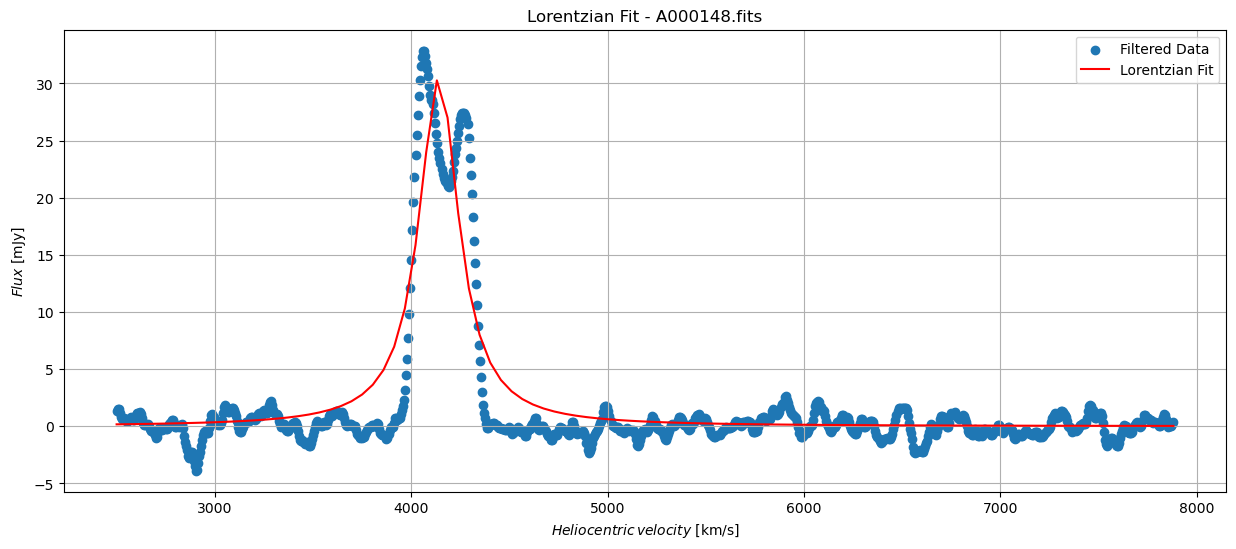

Fitted parameters:
Max peak amplitude (filtered data): 32.86291465891193 mJy
Max peak amplitude (Lorentzian fit): 30.267454643909954 mJy
Center: 4140.835802058278 km/s
Width: 247.56752612948947 km/s
Curve type: Emission
SNR (Filtered Data): 4.867304227734212
SNR (Lorentzian Fit): 5.639535280443019



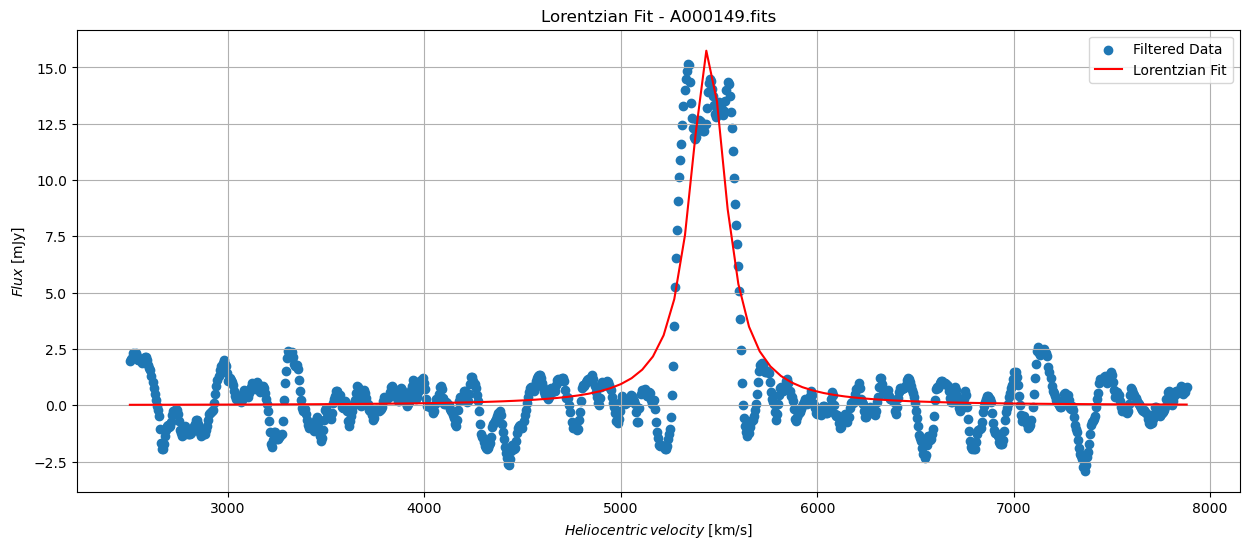

Fitted parameters:
Max peak amplitude (filtered data): 15.173070498899559 mJy
Max peak amplitude (Lorentzian fit): 15.742232211366552 mJy
Center: 5443.07701991862 km/s
Width: 222.8610811318654 km/s
Curve type: Emission
SNR (Filtered Data): 4.750327491641071
SNR (Lorentzian Fit): 5.927494101960821



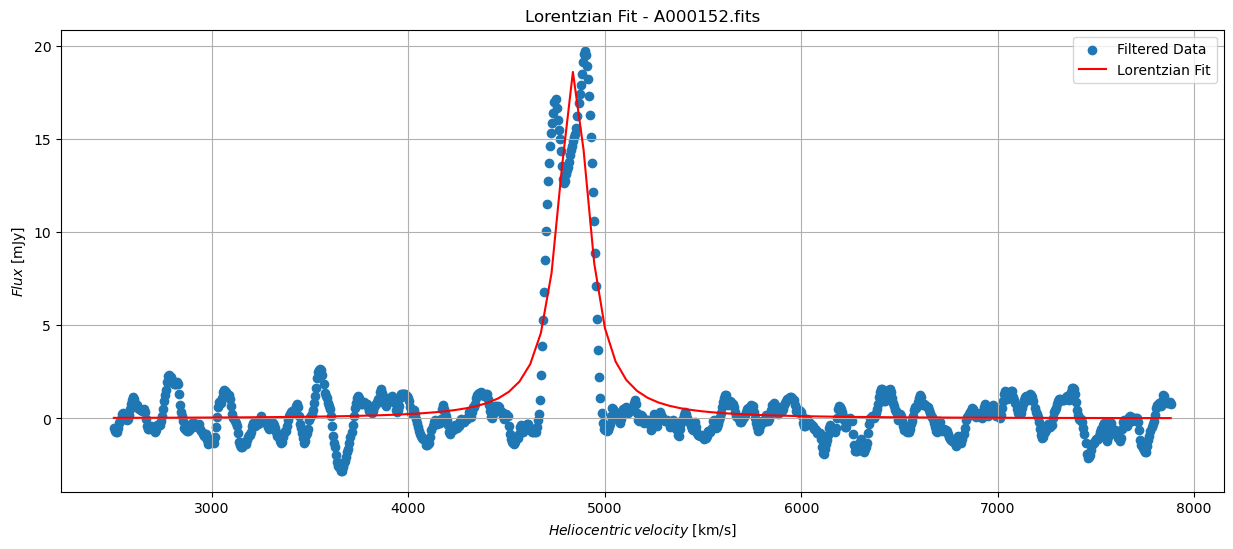

Fitted parameters:
Max peak amplitude (filtered data): 19.731264756430495 mJy
Max peak amplitude (Lorentzian fit): 18.591698324974292 mJy
Center: 4840.39885680223 km/s
Width: 189.8372788696081 km/s
Curve type: Emission
SNR (Filtered Data): 5.411655169911787
SNR (Lorentzian Fit): 6.34847409885851



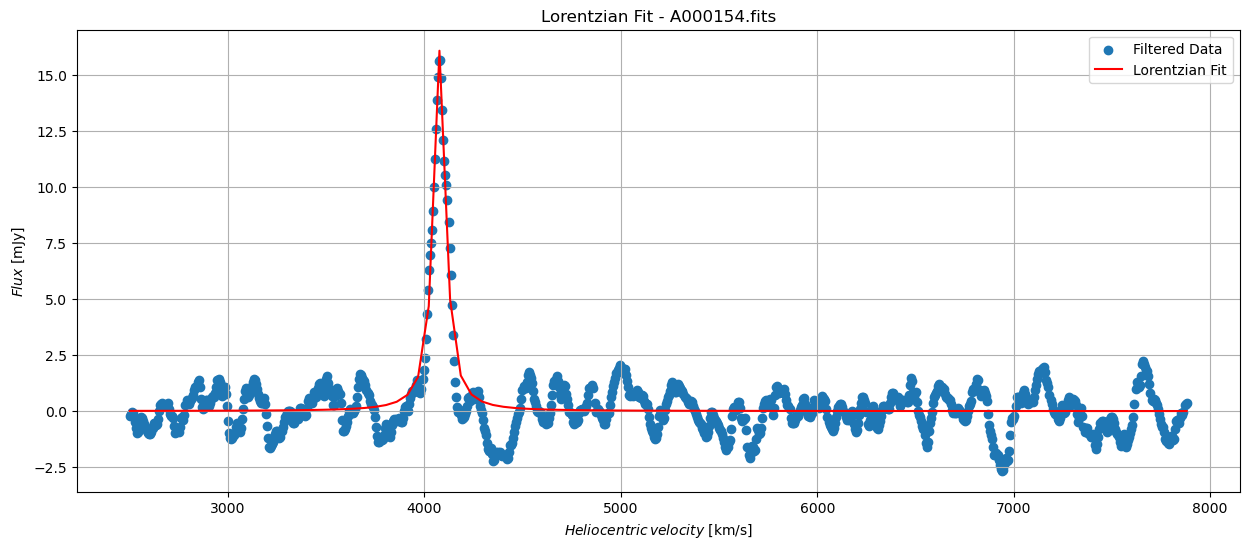

Fitted parameters:
Max peak amplitude (filtered data): 15.70139368714521 mJy
Max peak amplitude (Lorentzian fit): 16.099206406190525 mJy
Center: 4077.553654576221 km/s
Width: 71.0954676659089 km/s
Curve type: Emission
SNR (Filtered Data): 4.793536755382091
SNR (Lorentzian Fit): 9.941404025421953



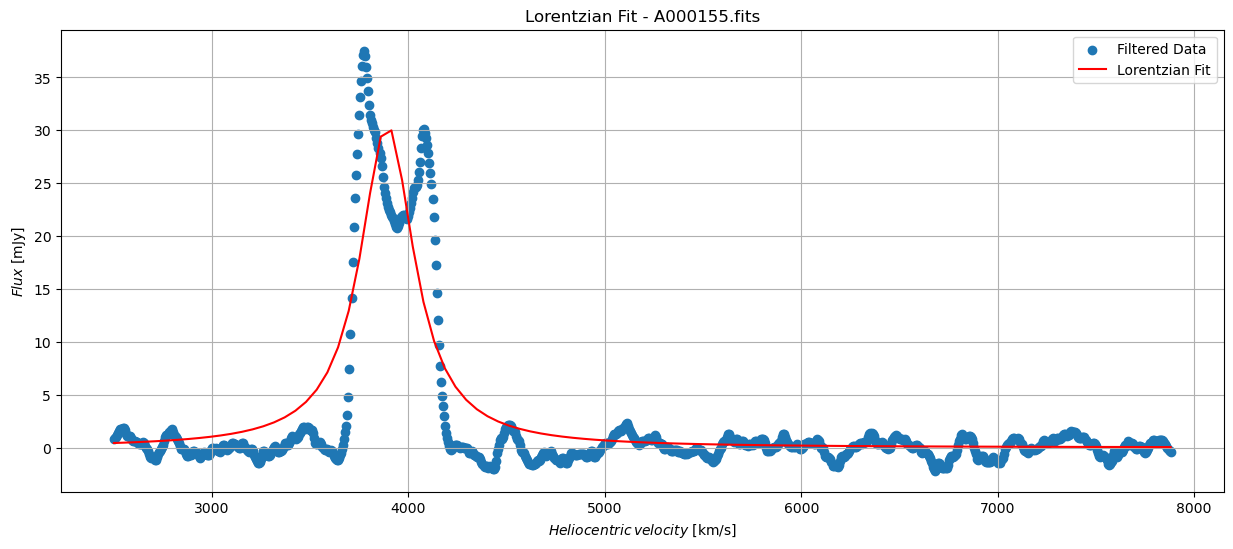

Fitted parameters:
Max peak amplitude (filtered data): 37.52619418222528 mJy
Max peak amplitude (Lorentzian fit): 29.995802691768898 mJy
Center: 3891.5674638691003 km/s
Width: 335.6642515361425 km/s
Curve type: Emission
SNR (Filtered Data): 4.617007807940635
SNR (Lorentzian Fit): 4.9633769321544765



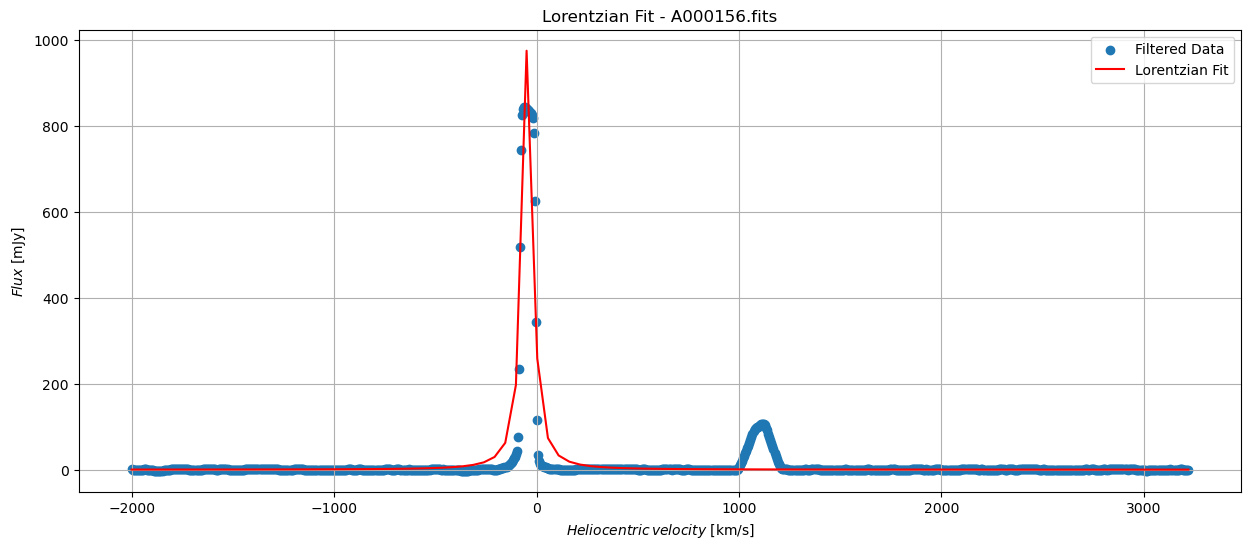

Fitted parameters:
Max peak amplitude (filtered data): 842.2922409080433 mJy
Max peak amplitude (Lorentzian fit): 974.0946827053349 mJy
Center: -44.66726141362864 km/s
Width: 56.78389499113522 km/s
Curve type: Emission
SNR (Filtered Data): 4.861459605220404
SNR (Lorentzian Fit): 10.983776456027723



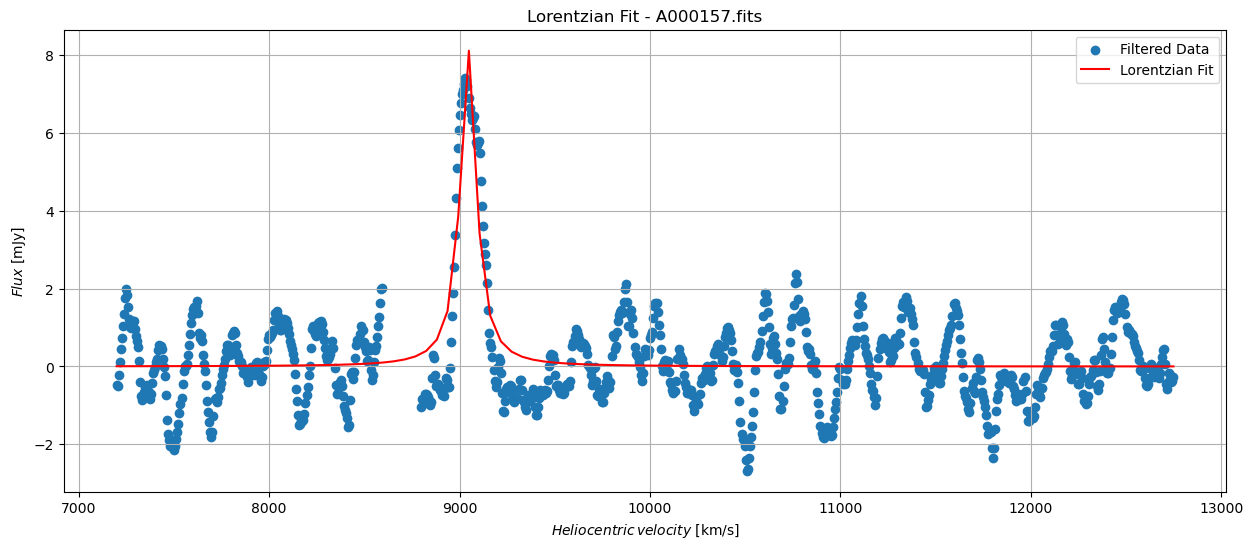

Fitted parameters:
Max peak amplitude (filtered data): 7.397552171690092 mJy
Max peak amplitude (Lorentzian fit): 8.106928534369684 mJy
Center: 9045.577033244368 km/s
Width: 100.50298133201618 km/s
Curve type: Emission
SNR (Filtered Data): nan
SNR (Lorentzian Fit): 8.450754967460936



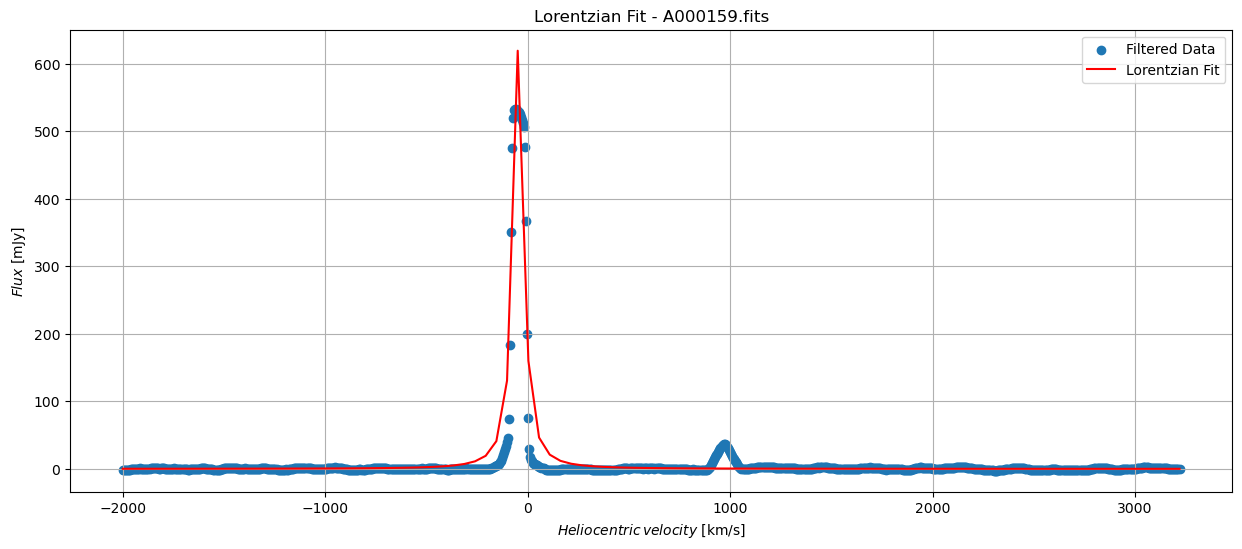

Fitted parameters:
Max peak amplitude (filtered data): 533.4321174611553 mJy
Max peak amplitude (Lorentzian fit): 618.9965994319753 mJy
Center: -45.83528724858747 km/s
Width: 57.58721572467757 km/s
Curve type: Emission
SNR (Filtered Data): 4.67402035087351
SNR (Lorentzian Fit): 10.909120127378221



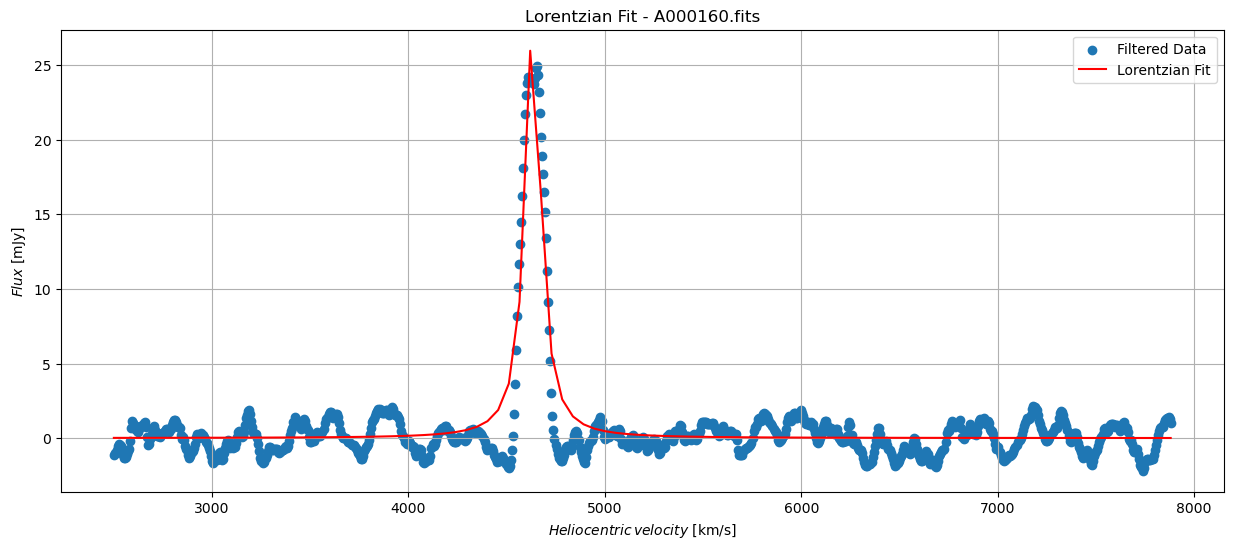

Fitted parameters:
Max peak amplitude (filtered data): 24.919824395644202 mJy
Max peak amplitude (Lorentzian fit): 25.970521103873136 mJy
Center: 4634.04994597457 km/s
Width: 94.61017019933685 km/s
Curve type: Emission
SNR (Filtered Data): 3.8162600215664586
SNR (Lorentzian Fit): 8.71978589375631



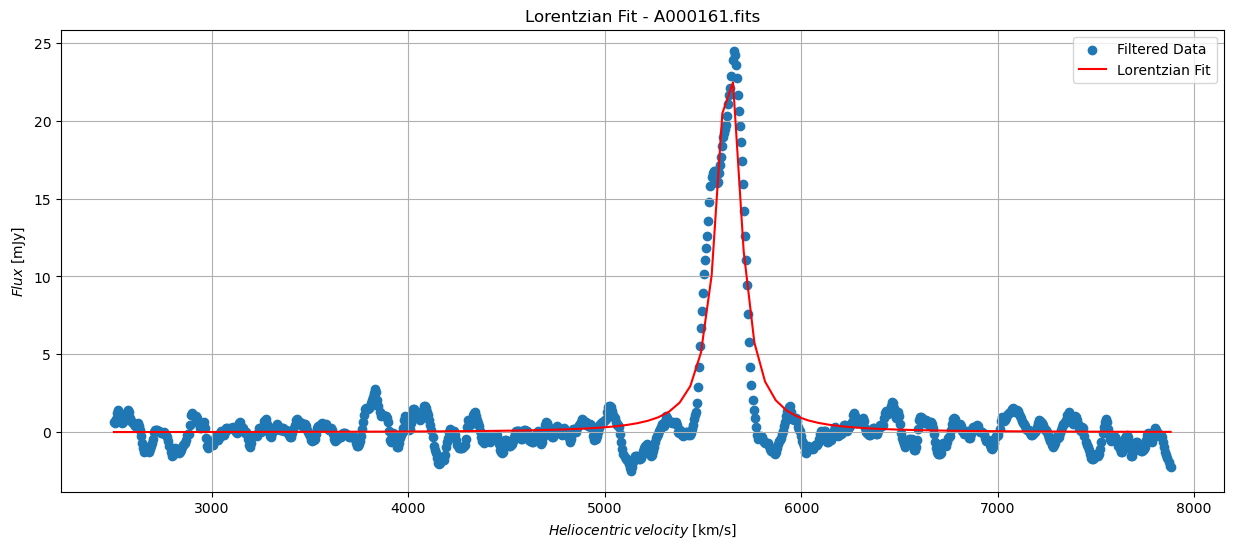

Fitted parameters:
Max peak amplitude (filtered data): 24.49152344907764 mJy
Max peak amplitude (Lorentzian fit): 22.46915134758254 mJy
Center: 5630.468614735095 km/s
Width: 144.71269397664767 km/s
Curve type: Emission
SNR (Filtered Data): 3.6460454561677476
SNR (Lorentzian Fit): 7.188191206336725



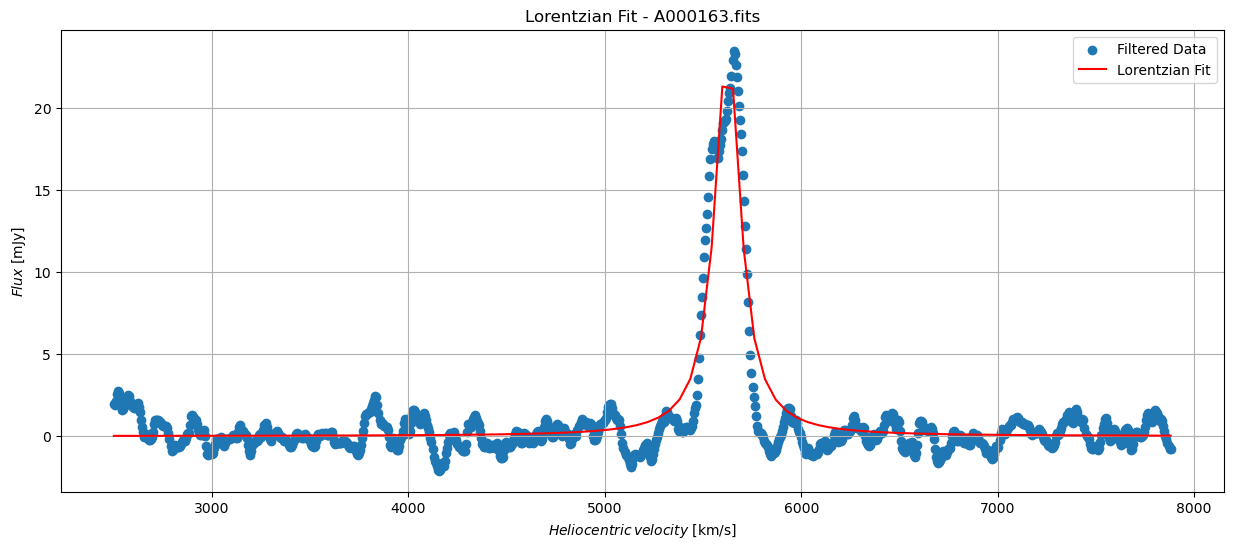

Fitted parameters:
Max peak amplitude (filtered data): 23.502104172342655 mJy
Max peak amplitude (Lorentzian fit): 21.321085081960643 mJy
Center: 5624.931929312446 km/s
Width: 157.40053488329465 km/s
Curve type: Emission
SNR (Filtered Data): 5.561712672225292
SNR (Lorentzian Fit): 6.919427562330008



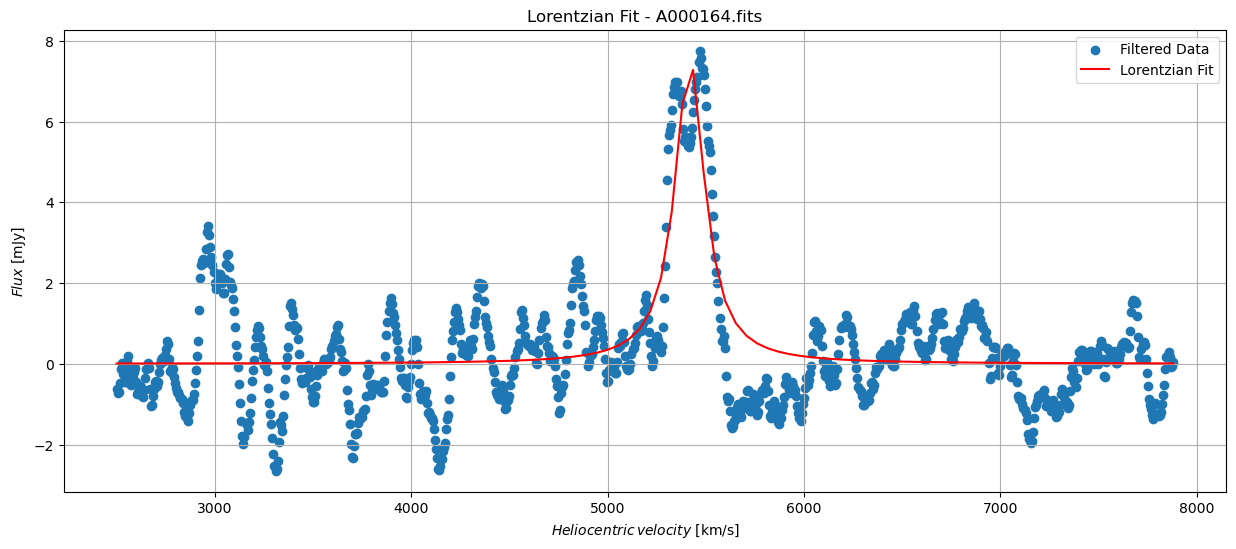

Fitted parameters:
Max peak amplitude (filtered data): 7.7572692144740625 mJy
Max peak amplitude (Lorentzian fit): 7.282478248710983 mJy
Center: 5418.50054630586 km/s
Width: 184.10216153309707 km/s
Curve type: Emission
SNR (Filtered Data): 4.563979372571929
SNR (Lorentzian Fit): 6.4451211222609075



KeyboardInterrupt: 

In [23]:
folder_path = "sp"
window_size = 15  # Define window size for filtering

def lorentzian(x, amplitude, center, width):   # A lorentz ploting curve function is defined
    return amplitude / ((x - center)**2 + (0.5 * width)**2)

fits_files = [f for f in os.listdir(folder_path) if f.endswith('.fits')] # List for all FITS files is createdin the folder

for fits_file in fits_files:
    file_path = os.path.join(folder_path, fits_file)
    data = fits.getdata(file_path)   # Read data for each file
    flux = data['FLUX']
    v_helio = data['VHELIO']
    flux_filtered = np.convolve(flux, np.ones(window_size) / window_size, mode='valid')  #Filtering is applied
    v_helio_filtered = v_helio[window_size - 1:]
    
    peaks, _ = find_peaks(flux_filtered, prominence=1)  # Peaks are found

    snr_filtered = np.mean(np.sort(flux_filtered[peaks])[-2:]) / np.std(flux_filtered) # SNR is calculated for the mean of two Max peaks
    
    initial_center_guess = v_helio_filtered[peaks[np.argmax(flux_filtered[peaks])]] #Initial guess
    initial_guess = [max(flux_filtered), initial_center_guess, 1]
    bounds = ([0, -np.inf, 0], [np.inf, np.inf, np.inf])
    
    try:
        valid_indices = np.isfinite(flux_filtered)     # Depuration of infinite and NaN values from flux data
        flux_filtered_valid = flux_filtered[valid_indices]
        v_helio_filtered_valid = v_helio_filtered[valid_indices]
        
        popt, _ = curve_fit(lorentzian, v_helio_filtered_valid, flux_filtered_valid, p0=initial_guess, bounds=bounds) # Perform Lorentzian fitting with valid data
        
        y_fit = lorentzian(v_helio_filtered_valid, *popt)
        snr_fit = max(y_fit) / np.std(y_fit)   # SNR is calculated for the Lorentzian fitting
    except RuntimeError:
        print(f"Fit failed for {fits_file}. Skipping...")
        continue
    
    amplitude_fit, center_fit, width_fit = popt
    
    x_fit = np.linspace(min(v_helio_filtered_valid), max(v_helio_filtered_valid), 100)   # Plot of the results
    y_fit = lorentzian(x_fit, amplitude_fit, center_fit, width_fit)
    plt.figure(figsize=(15, 6))
    plt.scatter(v_helio_filtered_valid, flux_filtered_valid, label='Filtered Data')
    plt.plot(x_fit, y_fit, label='Lorentzian Fit', color='red')
    plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
    plt.ylabel(r'$\mathit{Flux}$ [mJy]')
    plt.legend()
    plt.grid(True)
    plt.title(f'Lorentzian Fit - {fits_file}')
    plt.show()
    
    print("Fitted parameters:")    # Print of the results
    print("Max peak amplitude (filtered data):", max(flux_filtered[peaks]), "mJy")
    print("Max peak amplitude (Lorentzian fit):", max(y_fit), "mJy")
    print("Center:", center_fit, "km/s")
    print("Width:", width_fit, "km/s")
    curve_type = 'Emission' if amplitude_fit > 0 else 'Absorption'
    print("Curve type:", curve_type.capitalize())
    print("SNR (Filtered Data):", snr_filtered)
    print("SNR (Lorentzian Fit):", snr_fit)
    print()
# Utilizar subplot para dos columnas
# Se puede ver de AFINAR: definir aquellos espectros que no entran ni emision ni absorción (Ex: A000013), por rangos. 100% Emision, 90% EMISIÓN. (mEJORAR LA CLASIFICACION INICIAL DE MAX)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.io import fits
from scipy.signal import find_peaks
import os

folder_path = "sp"
window_size = 15  # Define window size for filtering
degree = 15  # Degree of the polynomial fit

fits_files = [f for f in os.listdir(folder_path) if f.endswith('.fits')] # List for all FITS files is createdin the folder

for fits_file in fits_files:
    file_path = os.path.join(folder_path, fits_file)
    data = fits.getdata(file_path)   # Read data for each file
    flux = data['FLUX']
    v_helio = data['VHELIO']
    flux_filtered = np.convolve(flux, np.ones(window_size) / window_size, mode='valid')  #Filtering is applied
    v_helio_filtered = v_helio[window_size - 1:]
    
    peaks, _ = find_peaks(flux_filtered, prominence=1)  # Peaks are found

    snr_filtered = np.mean(np.sort(flux_filtered[peaks])[-2:]) / np.std(flux_filtered) # SNR is calculated for the mean of two Max peaks
    
    initial_center_guess = v_helio_filtered[peaks[np.argmax(flux_filtered[peaks])]] #Initial guess
    
    try:
        valid_indices = np.isfinite(flux_filtered)     # Depuration of infinite and NaN values from flux data
        flux_filtered_valid = flux_filtered[valid_indices]
        v_helio_filtered_valid = v_helio_filtered[valid_indices]
        
        # Polynomial fit on the entire window
        coefficients = np.polyfit(v_helio_filtered_valid, flux_filtered_valid, degree)
        polynomial_function = np.poly1d(coefficients)
        flux_fit = polynomial_function(v_helio_filtered_valid)
        
        # Polynomial fit on the cropped window
        peak_max_index = np.argmax(flux_filtered) # Find Peak
        tolerance = 50
        peak_base = np.arange(peak_max_index - tolerance, peak_max_index + tolerance)
        v_helio_cropped = v_helio_filtered[peak_base]  # Crop for the defined peak
        flux_cropped = flux_filtered[peak_base]
        coefficients_cropped = np.polyfit(v_helio_cropped, flux_cropped, degree)
        polynomial_function_cropped = np.poly1d(coefficients_cropped)
        flux_fit_cropped = polynomial_function_cropped(v_helio_cropped)
    except RuntimeError:
        print(f"Fit failed for {fits_file}. Skipping...")
        continue
    
    x_fit = np.linspace(min(v_helio_filtered_valid), max(v_helio_filtered_valid), 100)   # Plot of the results
    y_fit = polynomial_function(x_fit)
    plt.figure(figsize=(15, 6))
    plt.scatter(v_helio_filtered_valid, flux_filtered_valid, label='Filtered Data')
    plt.plot(x_fit, y_fit, label='Polynomial Fit', color='red')
    plt.plot(v_helio_cropped, flux_fit_cropped, label='Cropped Polynomial Fit', color='blue', linestyle='--')
    plt.xlabel(r'$\mathit{Heliocentric\,velocity}$ [km/s]')
    plt.ylabel(r'$\mathit{Flux}$ [mJy]')
    plt.legend()
    plt.grid(True)
    plt.title(f'Polynomial Fit - {fits_file}')
    plt.show()
    
    print("Fitted parameters:")    # Print of the results
    print("SNR (Filtered Data):", snr_filtered)
    print()


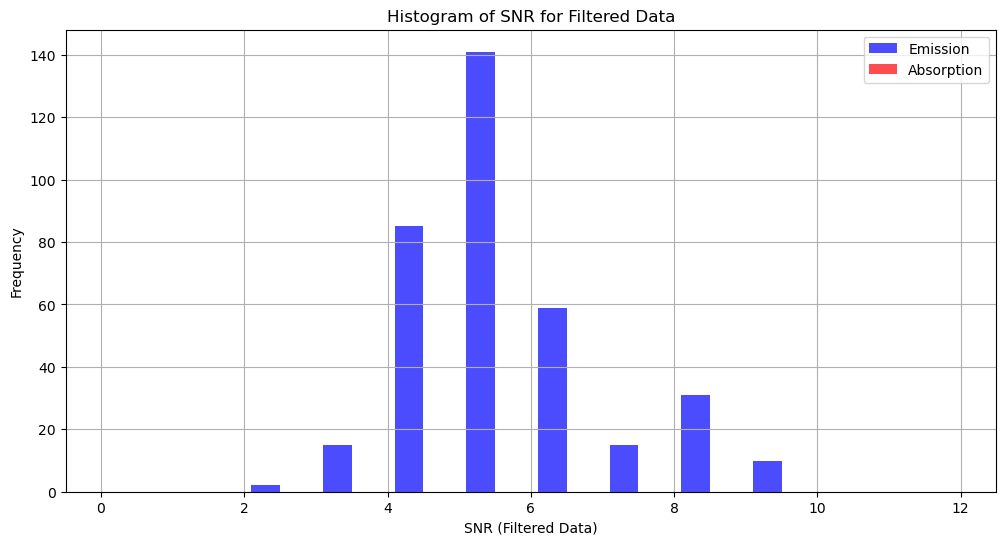

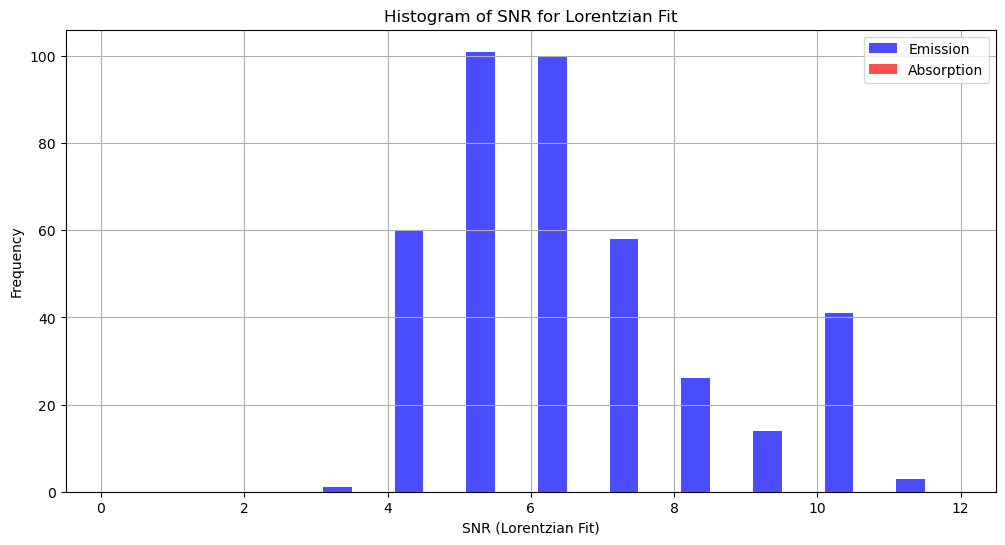

In [161]:
if snr_filtered_emission:
    max_snr_filtered_emission = max(snr_filtered_emission)
else:
    max_snr_filtered_emission = 0

if snr_filtered_absorption:
    max_snr_filtered_absorption = max(snr_filtered_absorption)
else:
    max_snr_filtered_absorption = 0

if snr_fit_emission:
    max_snr_fit_emission = max(snr_fit_emission)
else:
    max_snr_fit_emission = 0

if snr_fit_absorption:
    max_snr_fit_absorption = max(snr_fit_absorption)
else:
    max_snr_fit_absorption = 0
    
#-----------------------------


snr_ranges = np.arange(0, max(max_snr_filtered_emission, max_snr_filtered_absorption, max_snr_fit_emission, max_snr_fit_absorption) + 1) # Ranges of histograms

plt.figure(figsize=(12, 6))     # Plot of the results
plt.hist([snr_filtered_emission, snr_filtered_absorption], bins=snr_ranges, color=['blue', 'red'], alpha=0.7, label=['Emission', 'Absorption'])
plt.xlabel('SNR (Filtered Data)')
plt.ylabel('Frequency')
plt.title('Histogram of SNR for Filtered Data')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))   # Print of the results
plt.hist([snr_fit_emission, snr_fit_absorption], bins=snr_ranges, color=['blue', 'red'], alpha=0.7, label=['Emission', 'Absorption'])
plt.xlabel('SNR (Lorentzian Fit)')
plt.ylabel('Frequency')
plt.title('Histogram of SNR for Lorentzian Fit')
plt.legend()
plt.grid(True)
plt.show()
